In [1]:
import csv

import pandas as pd

import numpy as np

import torch

from torch import nn, optim

from torch.autograd import Variable

from torch.utils.data import Dataset

from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

import time

In [2]:
# 定义自己的类
class MyDataset(Dataset):
    
    # 初始化
    def __init__(self, file_name):
        # 读入数据
        self.data = pd.read_csv(file_name)
    
    # 返回df的长度
    def __len__(self):
        return len(self.data)
    
    # 获取第idx+1列的数据
    def __getitem__(self, idx):
        return self.data.values[idx,1:10]

# 通过实例化对象来访问该类
# 假设同目录下存在名为median_benchmark.csv的文件
ds = MyDataset('formatweather.csv')
ds=np.asarray(ds[:], dtype = np.float32)#####源文件float32 ,不知道为什么读取变为float64，这里再进行处理  最大最小化时变化
##dl = DataLoader(ds, batch_size=100, shuffle=False)

#####处理为torch，分为trainx，trainy
torchds=torch.from_numpy(ds[:])


In [3]:
train_dataset =torchds[:30700]  ##0.7*43823
test_dataset =torchds[30700:]
dl = DataLoader(train_dataset, batch_size=100, shuffle=True)

In [8]:
for i, data in enumerate(dl, 1):
    print(i,data)

1 tensor([[1.0060e-02, 6.7647e-01, 6.8852e-01, 4.0000e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [1.0362e-01, 6.0294e-01, 5.0820e-01, 4.9091e-01, 6.6667e-01, 1.7037e-01,
         0.0000e+00, 2.7778e-02, 9.4567e-02],
        [3.6217e-02, 8.8235e-01, 6.8852e-01, 2.1818e-01, 0.0000e+00, 1.0698e-02,
         0.0000e+00, 0.0000e+00, 2.8169e-02],
        [1.1066e-02, 2.7941e-01, 2.7869e-01, 6.0000e-01, 3.3333e-01, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [8.4507e-02, 9.2647e-01, 7.5410e-01, 3.6364e-01, 6.6667e-01, 4.8142e-02,
         0.0000e+00, 0.0000e+00, 7.9477e-02],
        [5.1308e-01, 5.8824e-01, 4.5902e-01, 2.1818e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 5.1911e-01],
        [7.3441e-02, 9.2647e-01, 7.8689e-01, 2.0000e-01, 6.6667e-01, 4.7355e-02,
         0.0000e+00, 0.0000e+00, 8.4507e-02],
        [1.4085e-02, 1.9118e-01, 1.9672e-01, 8.3636e-01, 3.3333e-01, 3.3615e-02,
         0.0000e+00, 0.0000e

         0.0000e+00, 0.0000e+00, 7.7465e-02]])
2 tensor([[1.5091e-02, 6.1765e-01, 3.6066e-01, 3.4545e-01, 3.3333e-01, 2.4372e-01,
         0.0000e+00, 6.6667e-01, 2.7163e-02],
        [2.2334e-01, 5.5882e-01, 3.6066e-01, 4.0000e-01, 3.3333e-01, 1.2988e-02,
         0.0000e+00, 0.0000e+00, 2.4748e-01],
        [8.2495e-02, 8.2353e-01, 6.2295e-01, 4.5455e-01, 3.3333e-01, 1.7568e-02,
         0.0000e+00, 2.7778e-02, 1.0060e-02],
        [1.7404e-01, 3.3824e-01, 9.8361e-02, 6.1818e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.5996e-01],
        [1.5694e-01, 8.6765e-01, 6.5574e-01, 3.2727e-01, 3.3333e-01, 2.4455e-02,
         0.0000e+00, 0.0000e+00, 1.4688e-01],
        [3.7223e-01, 4.7059e-01, 2.7869e-01, 6.3636e-01, 3.3333e-01, 4.1254e-02,
         0.0000e+00, 0.0000e+00, 3.4708e-01],
        [1.9115e-02, 3.3824e-01, 4.9180e-01, 6.5455e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [6.1368e-02, 4.7059e-01, 2.7869e-01, 6.9091e-01, 3.333

         0.0000e+00, 0.0000e+00, 8.2495e-02]])
3 tensor([[1.0161e-01, 8.9706e-01, 8.3607e-01, 2.3636e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 8.9537e-02],
        [1.1469e-01, 4.2647e-01, 3.1148e-01, 6.1818e-01, 1.0000e+00, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 1.2676e-01],
        [1.3078e-02, 3.3824e-01, 2.4590e-01, 7.0909e-01, 3.3333e-01, 2.2917e-01,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [1.0060e-02, 3.2353e-01, 1.4754e-01, 6.0000e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [4.2555e-01, 5.0000e-01, 2.4590e-01, 5.6364e-01, 3.3333e-01, 9.9120e-03,
         0.0000e+00, 0.0000e+00, 4.5976e-01],
        [1.2877e-01, 8.9706e-01, 7.2131e-01, 2.7273e-01, 6.6667e-01, 5.4994e-02,
         0.0000e+00, 0.0000e+00, 8.8531e-02],
        [1.6097e-02, 5.5882e-01, 7.2131e-01, 2.1818e-01, 3.3333e-01, 6.4172e-02,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [9.0543e-03, 3.9706e-01, 2.9508e-01, 6.1818e-01, 0.000

         0.0000e+00, 0.0000e+00, 8.0483e-03]])
4 tensor([[1.0060e-02, 4.1176e-01, 4.2623e-01, 5.8182e-01, 3.3333e-01, 1.9103e-01,
         0.0000e+00, 0.0000e+00, 6.0362e-03],
        [8.5513e-02, 6.9118e-01, 6.0656e-01, 3.2727e-01, 0.0000e+00, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 8.2495e-02],
        [8.0483e-03, 4.5588e-01, 3.4426e-01, 5.8182e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 7.0423e-03],
        [8.1489e-02, 4.1176e-01, 3.2787e-01, 6.9091e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 5.5332e-02],
        [4.9296e-02, 3.8235e-01, 4.2623e-01, 5.4545e-01, 3.3333e-01, 1.3824e-01,
         0.0000e+00, 0.0000e+00, 3.5211e-02],
        [8.6519e-02, 8.8235e-01, 7.0492e-01, 2.7273e-01, 3.3333e-01, 1.1467e-02,
         0.0000e+00, 0.0000e+00, 1.1167e-01],
        [5.4326e-02, 2.5000e-01, 2.2951e-01, 7.4545e-01, 6.6667e-01, 1.7568e-02,
         0.0000e+00, 0.0000e+00, 6.8410e-02],
        [1.8109e-02, 3.3824e-01, 3.6066e-01, 6.1818e-01, 3.333

         0.0000e+00, 0.0000e+00, 3.8229e-02]])
5 tensor([[1.0362e-01, 6.9118e-01, 4.9180e-01, 2.3636e-01, 6.6667e-01, 6.8752e-02,
         0.0000e+00, 0.0000e+00, 1.3883e-01],
        [1.0765e-01, 9.1176e-01, 7.2131e-01, 2.1818e-01, 3.3333e-01, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 3.8229e-02],
        [9.9208e-02, 8.9706e-01, 7.8689e-01, 2.5455e-01, 6.6667e-01, 5.2687e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [6.2374e-02, 5.7353e-01, 6.0656e-01, 3.6364e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 6.1368e-02],
        [2.0926e-01, 9.4118e-01, 7.5410e-01, 2.7273e-01, 6.6667e-01, 2.0627e-02,
         0.0000e+00, 0.0000e+00, 2.2636e-01],
        [7.0423e-03, 4.1176e-01, 3.1148e-01, 6.0000e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [4.0241e-02, 7.7941e-01, 5.9016e-01, 4.5455e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 4.7284e-02],
        [2.2334e-01, 5.2941e-01, 3.9344e-01, 5.2727e-01, 3.333

         0.0000e+00, 0.0000e+00, 2.9175e-02]])
6 tensor([[1.5091e-02, 2.9412e-01, 3.1148e-01, 7.2727e-01, 3.3333e-01, 1.4056e-01,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [5.8350e-02, 8.3824e-01, 6.0656e-01, 2.0000e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 5.7344e-02],
        [2.3239e-01, 5.4412e-01, 3.9344e-01, 4.0000e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 2.7778e-02, 2.2334e-01],
        [1.5392e-01, 9.1176e-01, 6.8852e-01, 1.8182e-01, 3.3333e-01, 6.1010e-03,
         0.0000e+00, 5.5556e-02, 3.1187e-02],
        [1.2173e-01, 5.2941e-01, 3.4426e-01, 5.2727e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.2173e-01],
        [3.1187e-02, 3.0882e-01, 2.2951e-01, 7.4545e-01, 3.3333e-01, 2.3686e-02,
         0.0000e+00, 0.0000e+00, 5.8350e-02],
        [5.9356e-02, 7.0588e-01, 4.5902e-01, 4.5455e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 3.1187e-02],
        [2.6157e-02, 4.7059e-01, 2.1311e-01, 6.1818e-01, 0.000

         0.0000e+00, 0.0000e+00, 3.7223e-02]])
7 tensor([[1.1569e-01, 4.5588e-01, 3.1148e-01, 7.2727e-01, 6.6667e-01, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 1.2877e-01],
        [1.1066e-02, 3.0882e-01, 3.7705e-01, 5.8182e-01, 0.0000e+00, 1.7568e-02,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [1.8913e-01, 9.4118e-01, 7.3770e-01, 3.4545e-01, 6.6667e-01, 8.3739e-03,
         0.0000e+00, 0.0000e+00, 1.9819e-01],
        [4.4266e-02, 4.4118e-01, 3.1148e-01, 6.7273e-01, 3.3333e-01, 8.2526e-02,
         0.0000e+00, 0.0000e+00, 4.5272e-02],
        [1.9014e-01, 9.4118e-01, 7.3770e-01, 2.0000e-01, 6.6667e-01, 1.2761e-01,
         0.0000e+00, 0.0000e+00, 1.9920e-01],
        [1.9115e-02, 3.9706e-01, 3.1148e-01, 6.9091e-01, 3.3333e-01, 4.3544e-02,
         0.0000e+00, 0.0000e+00, 2.0121e-02],
        [9.9208e-02, 7.9412e-01, 6.5574e-01, 4.1818e-01, 6.6667e-01, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.5091e-02, 3.2353e-01, 2.2951e-01, 8.0000e-01, 0.000

         0.0000e+00, 0.0000e+00, 6.1368e-02]])
8 tensor([[1.8109e-02, 4.8529e-01, 5.0820e-01, 3.6364e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 2.6157e-02],
        [1.3078e-02, 2.2059e-01, 1.9672e-01, 6.5455e-01, 3.3333e-01, 3.7124e-01,
         0.0000e+00, 0.0000e+00, 1.4085e-02],
        [7.8471e-02, 7.6471e-01, 5.2459e-01, 5.6364e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 7.7465e-02],
        [3.9235e-02, 3.2353e-01, 2.7869e-01, 5.0909e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 5.4326e-02],
        [1.9115e-02, 5.7353e-01, 7.3770e-01, 3.0909e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [7.4447e-02, 8.8235e-01, 7.5410e-01, 1.2727e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 6.4386e-02],
        [4.2254e-02, 5.1471e-01, 5.5738e-01, 2.5455e-01, 6.6667e-01, 5.4994e-02,
         0.0000e+00, 0.0000e+00, 4.3260e-02],
        [1.4286e-01, 8.8235e-01, 7.2131e-01, 2.0000e-01, 6.666

         0.0000e+00, 0.0000e+00, 5.4326e-02]])
9 tensor([[2.8169e-02, 6.7647e-01, 8.0328e-01, 2.7273e-01, 6.6667e-01, 1.6799e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [3.8229e-02, 4.7059e-01, 2.7869e-01, 6.5455e-01, 6.6667e-01, 6.7983e-02,
         0.0000e+00, 0.0000e+00, 3.5211e-02],
        [7.1429e-02, 4.5588e-01, 4.0984e-01, 7.4545e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 7.5453e-02],
        [2.4145e-02, 7.9412e-01, 5.5738e-01, 5.8182e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 3.8889e-01, 1.7103e-02],
        [8.4507e-02, 8.6765e-01, 7.8689e-01, 3.8182e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 7.6459e-02],
        [6.5392e-02, 9.1176e-01, 8.0328e-01, 4.3636e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 6.3380e-02],
        [4.2254e-02, 6.6176e-01, 7.5410e-01, 4.1818e-01, 6.6667e-01, 2.2917e-02,
         0.0000e+00, 0.0000e+00, 3.7223e-02],
        [1.0463e-01, 5.4412e-01, 6.2295e-01, 3.4545e-01, 6.666

         0.0000e+00, 0.0000e+00, 1.3380e-01]])
10 tensor([[9.9208e-02, 7.7941e-01, 5.5738e-01, 5.0909e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [9.9208e-02, 9.4118e-01, 7.8689e-01, 2.7273e-01, 6.6667e-01, 9.9291e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [9.9208e-02, 7.0588e-01, 6.7213e-01, 5.2727e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [3.9235e-02, 7.2059e-01, 6.8852e-01, 4.1818e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 4.3260e-02],
        [7.4447e-02, 6.7647e-01, 4.7541e-01, 6.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 8.7525e-02],
        [9.9208e-02, 4.1176e-01, 1.8033e-01, 6.3636e-01, 3.3333e-01, 1.7551e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [4.5272e-01, 4.8529e-01, 2.6230e-01, 6.3636e-01, 6.6667e-01, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 4.5875e-01],
        [1.8109e-01, 8.3824e-01, 6.3934e-01, 2.9091e-01, 6.66

         0.0000e+00, 0.0000e+00, 1.2072e-02]])
11 tensor([[8.7525e-02, 4.2647e-01, 1.9672e-01, 5.4545e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.0543e-02],
        [4.0543e-01, 5.1471e-01, 2.2951e-01, 4.9091e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.9738e-01],
        [3.7223e-02, 5.5882e-01, 7.5410e-01, 2.0000e-01, 6.6667e-01, 7.2545e-02,
         0.0000e+00, 0.0000e+00, 6.3380e-02],
        [1.9416e-01, 6.0294e-01, 4.4262e-01, 5.0909e-01, 6.6667e-01, 1.6808e-01,
         0.0000e+00, 0.0000e+00, 1.9517e-01],
        [9.0543e-02, 9.1176e-01, 7.0492e-01, 1.8182e-01, 6.6667e-01, 6.6445e-02,
         0.0000e+00, 0.0000e+00, 1.0463e-01],
        [6.0362e-02, 3.2353e-01, 3.1148e-01, 3.6364e-01, 6.6667e-01, 2.6728e-02,
         0.0000e+00, 0.0000e+00, 7.2435e-02],
        [2.3139e-01, 4.2647e-01, 1.9672e-01, 4.9091e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.5553e-01],
        [2.3139e-02, 4.4118e-01, 6.7213e-01, 4.1818e-01, 6.66

         0.0000e+00, 0.0000e+00, 2.3139e-02]])
12 tensor([[1.6901e-01, 8.9706e-01, 6.8852e-01, 1.8182e-01, 0.0000e+00, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.6197e-01],
        [9.0543e-02, 8.5294e-01, 6.8852e-01, 4.0000e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.0865e-01],
        [7.2435e-02, 5.2941e-01, 4.5902e-01, 4.3636e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 8.9537e-02],
        [9.3561e-02, 4.2647e-01, 2.9508e-01, 3.8182e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.0060e-01],
        [1.1167e-01, 9.1176e-01, 6.8852e-01, 3.2727e-01, 0.0000e+00, 1.3757e-02,
         0.0000e+00, 1.3889e-01, 1.0664e-01],
        [1.1066e-02, 3.5294e-01, 2.9508e-01, 6.7273e-01, 3.3333e-01, 5.1935e-02,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [2.6157e-02, 8.0882e-01, 8.6885e-01, 1.8182e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.3139e-02],
        [7.9477e-02, 3.9706e-01, 3.4426e-01, 6.9091e-01, 6.66

         0.0000e+00, 0.0000e+00, 8.7525e-02]])
13 tensor([[8.0483e-03, 3.8235e-01, 3.9344e-01, 6.1818e-01, 3.3333e-01, 2.5669e-01,
         0.0000e+00, 0.0000e+00, 7.0423e-03],
        [1.3380e-01, 7.7941e-01, 7.5410e-01, 3.0909e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.3078e-01],
        [9.3561e-02, 2.6471e-01, 4.9180e-02, 8.0000e-01, 3.3333e-01, 8.4081e-03,
         0.0000e+00, 0.0000e+00, 1.3179e-01],
        [4.6278e-02, 4.4118e-01, 4.7541e-01, 6.3636e-01, 3.3333e-01, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 3.0181e-02],
        [1.4386e-01, 9.1176e-01, 7.2131e-01, 1.6364e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.5091e-01],
        [2.0121e-02, 3.2353e-01, 2.4590e-01, 8.3636e-01, 3.3333e-01, 7.9433e-02,
         0.0000e+00, 0.0000e+00, 2.0121e-02],
        [3.5211e-02, 3.5294e-01, 2.6230e-01, 6.3636e-01, 6.6667e-01, 1.6047e-02,
         0.0000e+00, 0.0000e+00, 4.5272e-02],
        [3.4205e-02, 2.5000e-01, 1.3115e-01, 6.9091e-01, 3.33

         0.0000e+00, 0.0000e+00, 1.5091e-02]])
14 tensor([[1.7103e-02, 2.7941e-01, 4.5902e-01, 5.6364e-01, 3.3333e-01, 1.0541e-01,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [1.4588e-01, 7.5000e-01, 5.0820e-01, 6.0000e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.5191e-01],
        [3.0986e-01, 4.7059e-01, 3.6066e-01, 5.6364e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 2.8270e-01],
        [1.5795e-01, 7.6471e-01, 6.0656e-01, 5.4545e-01, 6.6667e-01, 9.9291e-03,
         0.0000e+00, 0.0000e+00, 1.7103e-01],
        [1.2072e-01, 5.0000e-01, 2.6230e-01, 7.2727e-01, 3.3333e-01, 3.6657e-02,
         0.0000e+00, 0.0000e+00, 1.2173e-01],
        [7.7465e-02, 8.9706e-01, 8.6885e-01, 3.2727e-01, 6.6667e-01, 3.2077e-02,
         0.0000e+00, 0.0000e+00, 6.0362e-02],
        [5.1610e-01, 4.7059e-01, 2.2951e-01, 4.1818e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 3.9940e-01],
        [9.2555e-02, 8.5294e-01, 6.3934e-01, 4.0000e-01, 1.00

         0.0000e+00, 0.0000e+00, 2.1730e-01]])
15 tensor([[9.7586e-02, 8.3824e-01, 6.8852e-01, 2.7273e-01, 6.6667e-01, 9.9291e-03,
         0.0000e+00, 0.0000e+00, 1.2475e-01],
        [2.2133e-01, 4.5588e-01, 3.7705e-01, 2.9091e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 2.3944e-01],
        [4.4266e-02, 8.2353e-01, 7.8689e-01, 4.5455e-01, 0.0000e+00, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 4.2254e-02],
        [9.2555e-02, 3.5294e-01, 1.1475e-01, 7.0909e-01, 6.6667e-01, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.3581e-01],
        [1.0060e-01, 8.0882e-01, 7.0492e-01, 4.5455e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.0563e-01],
        [1.3078e-01, 8.5294e-01, 8.1967e-01, 1.8182e-01, 6.6667e-01, 1.9858e-02,
         0.0000e+00, 0.0000e+00, 2.2736e-01],
        [1.0060e-02, 8.9706e-01, 7.0492e-01, 2.1818e-01, 0.0000e+00, 7.6391e-03,
         0.0000e+00, 2.7778e-02, 7.0423e-03],
        [1.3380e-01, 8.2353e-01, 7.3770e-01, 2.3636e-01, 6.66

         0.0000e+00, 0.0000e+00, 5.4326e-02]])
16 tensor([[1.4085e-02, 4.4118e-01, 2.9508e-01, 6.5455e-01, 0.0000e+00, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [8.3501e-02, 6.6176e-01, 8.1967e-01, 2.9091e-01, 1.0000e+00, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 7.3441e-02],
        [9.0543e-03, 3.5294e-01, 3.2787e-01, 6.7273e-01, 3.3333e-01, 1.3902e-01,
         0.0000e+00, 0.0000e+00, 8.0483e-03],
        [5.3320e-02, 3.6765e-01, 2.2951e-01, 7.6364e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 6.9417e-02],
        [4.7284e-02, 6.7647e-01, 4.9180e-01, 4.0000e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 5.3320e-02],
        [9.9208e-02, 5.5882e-01, 2.9508e-01, 5.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [3.8229e-02, 3.6765e-01, 2.4590e-01, 6.9091e-01, 6.6667e-01, 1.9858e-02,
         0.0000e+00, 0.0000e+00, 4.1247e-02],
        [1.6097e-02, 3.0882e-01, 2.2951e-01, 7.4545e-01, 3.33

         0.0000e+00, 0.0000e+00, 6.8410e-02]])
17 tensor([[9.9208e-02, 9.2647e-01, 7.0492e-01, 3.0909e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [3.5010e-01, 8.0882e-01, 5.7377e-01, 3.8182e-01, 3.3333e-01, 1.1450e-02,
         0.0000e+00, 5.5556e-02, 7.4447e-02],
        [1.4085e-02, 6.1765e-01, 3.6066e-01, 3.4545e-01, 3.3333e-01, 2.3837e-01,
         0.0000e+00, 6.3889e-01, 1.5091e-02],
        [1.3280e-01, 8.9706e-01, 7.3770e-01, 2.0000e-01, 6.6667e-01, 2.8266e-02,
         0.0000e+00, 0.0000e+00, 1.4990e-01],
        [1.6097e-02, 3.3824e-01, 3.9344e-01, 6.3636e-01, 3.3333e-01, 5.9966e-01,
         0.0000e+00, 0.0000e+00, 1.8109e-02],
        [1.2072e-02, 2.9412e-01, 2.1311e-01, 7.2727e-01, 3.3333e-01, 1.6799e-02,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [4.8290e-02, 8.0882e-01, 5.7377e-01, 2.9091e-01, 3.3333e-01, 4.6586e-02,
         0.0000e+00, 2.5000e-01, 3.7223e-02],
        [2.8672e-01, 5.4412e-01, 2.9508e-01, 6.7273e-01, 0.00

         0.0000e+00, 0.0000e+00, 2.5553e-01]])
18 tensor([[8.9537e-02, 7.7941e-01, 6.3934e-01, 2.9091e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [5.6338e-02, 6.9118e-01, 5.2459e-01, 5.8182e-01, 6.6667e-01, 2.4455e-02,
         0.0000e+00, 0.0000e+00, 4.2254e-02],
        [9.0543e-03, 3.8235e-01, 4.7541e-01, 6.1818e-01, 6.6667e-01, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 1.8109e-02],
        [1.0563e-01, 6.9118e-01, 5.4098e-01, 5.2727e-01, 1.0000e+00, 1.0722e-01,
         0.0000e+00, 0.0000e+00, 1.0966e-01],
        [3.3300e-01, 7.5000e-01, 5.2459e-01, 4.7273e-01, 1.0000e+00, 1.5210e-03,
         0.0000e+00, 0.0000e+00, 3.4004e-01],
        [2.0121e-02, 8.0882e-01, 8.6885e-01, 7.2727e-02, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 2.4145e-02],
        [1.1368e-01, 5.7353e-01, 5.7377e-01, 3.6364e-01, 6.6667e-01, 4.7355e-02,
         0.0000e+00, 0.0000e+00, 1.6097e-01],
        [2.8471e-01, 4.1176e-01, 2.1311e-01, 7.0909e-01, 1.00

         0.0000e+00, 0.0000e+00, 1.7103e-02]])
19 tensor([[6.3380e-02, 5.0000e-01, 6.8852e-01, 2.1818e-01, 3.3333e-01, 5.9574e-02,
         0.0000e+00, 0.0000e+00, 6.2374e-02],
        [1.7103e-02, 2.3529e-01, 3.4426e-01, 5.8182e-01, 3.3333e-01, 9.6232e-02,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [2.4145e-02, 2.3529e-01, 1.6393e-01, 8.9091e-01, 0.0000e+00, 2.5959e-02,
         0.0000e+00, 0.0000e+00, 2.4145e-02],
        [1.7103e-02, 3.0882e-01, 1.4754e-01, 8.5455e-01, 3.3333e-01, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [1.0865e-01, 3.3824e-01, 2.1311e-01, 7.0909e-01, 3.3333e-01, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 1.3984e-01],
        [1.6097e-02, 2.5000e-01, 1.9672e-01, 8.1818e-01, 3.3333e-01, 1.7874e-01,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [1.5091e-02, 2.0588e-01, 3.1148e-01, 7.4545e-01, 1.0000e+00, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [8.6519e-02, 7.0588e-01, 5.5738e-01, 4.3636e-01, 1.00

         0.0000e+00, 0.0000e+00, 1.2777e-01]])
20 tensor([[3.2193e-02, 8.0882e-01, 5.9016e-01, 4.9091e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 3.4205e-02],
        [1.1268e-01, 8.6765e-01, 6.5574e-01, 3.4545e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.0563e-01],
        [3.6217e-02, 5.4412e-01, 4.9180e-01, 5.0909e-01, 6.6667e-01, 3.2846e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.1771e-01, 8.9706e-01, 7.2131e-01, 3.6364e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.1268e-01],
        [9.9208e-02, 6.9118e-01, 6.0656e-01, 2.1818e-01, 6.6667e-01, 3.6674e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.9115e-02, 4.2647e-01, 4.5902e-01, 4.3636e-01, 3.3333e-01, 1.0849e-01,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [1.7404e-01, 8.8235e-01, 6.5574e-01, 2.0000e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.8209e-01],
        [6.1368e-02, 8.3824e-01, 6.7213e-01, 2.5455e-01, 3.33

         0.0000e+00, 0.0000e+00, 4.2254e-02]])
21 tensor([[2.0121e-01, 4.8529e-01, 2.4590e-01, 4.7273e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.2133e-01],
        [7.7465e-02, 4.1176e-01, 2.7869e-01, 6.7273e-01, 6.6667e-01, 4.2775e-02,
         0.0000e+00, 0.0000e+00, 8.3501e-02],
        [4.3260e-02, 3.2353e-01, 1.8033e-01, 7.2727e-01, 3.3333e-01, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 2.3139e-02],
        [1.3078e-01, 9.2647e-01, 8.1967e-01, 2.0000e-01, 6.6667e-01, 8.0219e-02,
         0.0000e+00, 0.0000e+00, 1.2676e-01],
        [3.5211e-02, 4.2647e-01, 4.0984e-01, 4.7273e-01, 3.3333e-01, 1.2219e-01,
         0.0000e+00, 0.0000e+00, 8.0483e-03],
        [2.7163e-02, 6.7647e-01, 8.5246e-01, 2.0000e-01, 6.6667e-01, 3.3632e-02,
         0.0000e+00, 0.0000e+00, 3.9235e-02],
        [6.5392e-02, 7.5000e-01, 5.0820e-01, 4.7273e-01, 6.6667e-01, 7.3315e-02,
         0.0000e+00, 2.7778e-02, 8.9537e-02],
        [8.7525e-02, 3.3824e-01, 1.6393e-01, 7.2727e-01, 0.00

         0.0000e+00, 0.0000e+00, 2.0121e-01]])
22 tensor([[9.9208e-02, 6.4706e-01, 3.7705e-01, 5.8182e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.7907e-01, 9.1176e-01, 7.0492e-01, 2.0000e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 2.7778e-02, 1.5594e-01],
        [6.9417e-02, 8.2353e-01, 5.9016e-01, 4.3636e-01, 1.0000e+00, 8.3739e-03,
         0.0000e+00, 0.0000e+00, 8.1489e-02],
        [1.8612e-01, 9.1176e-01, 7.2131e-01, 2.9091e-01, 6.6667e-01, 8.7089e-02,
         0.0000e+00, 0.0000e+00, 2.0724e-01],
        [2.0020e-01, 5.7353e-01, 3.2787e-01, 5.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.0825e-01],
        [4.4266e-02, 8.5294e-01, 8.1967e-01, 1.8182e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 4.6278e-02],
        [2.6157e-02, 2.0588e-01, 1.3115e-01, 8.9091e-01, 3.3333e-01, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 2.7163e-02],
        [1.0563e-01, 8.6765e-01, 7.7049e-01, 1.8182e-01, 6.66

         0.0000e+00, 0.0000e+00, 1.2072e-02]])
23 tensor([[1.2575e-01, 8.0882e-01, 5.7377e-01, 4.0000e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.8592e-02],
        [9.1549e-02, 8.6765e-01, 6.3934e-01, 3.8182e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.0362e-01],
        [1.0362e-01, 8.3824e-01, 6.8852e-01, 2.0000e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.0765e-01],
        [6.0362e-02, 2.5000e-01, 1.1475e-01, 6.3636e-01, 3.3333e-01, 4.0485e-02,
         0.0000e+00, 0.0000e+00, 5.2314e-02],
        [1.9517e-01, 7.6471e-01, 5.2459e-01, 1.4545e-01, 6.6667e-01, 1.9106e-02,
         0.0000e+00, 0.0000e+00, 1.9618e-01],
        [4.0241e-03, 3.9706e-01, 3.7705e-01, 5.8182e-01, 3.3333e-01, 4.4296e-02,
         0.0000e+00, 0.0000e+00, 5.0302e-03],
        [1.3078e-02, 5.4412e-01, 6.2295e-01, 3.4545e-01, 3.3333e-01, 2.5059e-01,
         0.0000e+00, 0.0000e+00, 1.4085e-02],
        [1.1268e-01, 8.8235e-01, 7.3770e-01, 3.2727e-01, 6.66

         0.0000e+00, 0.0000e+00, 2.4145e-02]])
24 tensor([[1.5191e-01, 9.5588e-01, 7.8689e-01, 9.0909e-02, 6.6667e-01, 6.5693e-02,
         0.0000e+00, 0.0000e+00, 1.4990e-01],
        [9.9208e-02, 7.6471e-01, 5.9016e-01, 4.0000e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [9.2555e-02, 4.7059e-01, 6.2295e-01, 3.4545e-01, 3.3333e-01, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 4.4266e-02],
        [1.2072e-02, 5.4412e-01, 6.3934e-01, 2.7273e-01, 3.3333e-01, 3.2077e-02,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [2.0523e-01, 6.0294e-01, 5.0820e-01, 4.7273e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 2.1328e-01],
        [5.0302e-02, 5.0000e-01, 3.2787e-01, 7.6364e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 4.9296e-02],
        [2.6157e-02, 4.2647e-01, 3.1148e-01, 7.5152e-01, 3.3333e-01, 2.8041e-01,
         0.0000e+00, 0.0000e+00, 3.1187e-02],
        [1.3078e-02, 2.5000e-01, 2.4590e-01, 8.0000e-01, 0.00

         0.0000e+00, 0.0000e+00, 3.4507e-01]])
25 tensor([[1.3783e-01, 8.6765e-01, 6.3934e-01, 3.2727e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.3984e-01],
        [9.9208e-02, 9.2647e-01, 7.7049e-01, 2.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [7.9477e-02, 6.4706e-01, 5.7377e-01, 4.0000e-01, 6.6667e-01, 5.5763e-02,
         0.0000e+00, 0.0000e+00, 6.5392e-02],
        [1.5191e-01, 8.8235e-01, 6.8852e-01, 3.4545e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.4688e-01],
        [4.2254e-02, 8.5294e-01, 6.5574e-01, 4.3636e-01, 6.6667e-01, 4.7355e-02,
         0.0000e+00, 0.0000e+00, 4.9296e-02],
        [1.5091e-02, 4.4118e-01, 2.7869e-01, 6.3636e-01, 3.3333e-01, 1.2988e-02,
         0.0000e+00, 0.0000e+00, 2.0121e-02],
        [5.7344e-02, 8.6765e-01, 6.5574e-01, 2.1818e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 6.3380e-02],
        [1.4085e-01, 7.7941e-01, 5.5738e-01, 2.9091e-01, 6.66

         0.0000e+00, 0.0000e+00, 1.5091e-02]])
26 tensor([[1.2475e-01, 8.9706e-01, 7.7049e-01, 3.8182e-01, 6.6667e-01, 1.0698e-02,
         0.0000e+00, 0.0000e+00, 1.1670e-01],
        [6.9417e-02, 8.0882e-01, 6.0656e-01, 4.1818e-01, 6.6667e-01, 1.7568e-02,
         0.0000e+00, 0.0000e+00, 5.9356e-02],
        [7.3441e-02, 5.2941e-01, 5.4098e-01, 2.5455e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 7.3441e-02],
        [7.1429e-02, 6.6176e-01, 4.4262e-01, 4.0000e-01, 3.3333e-01, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 1.1167e-01],
        [1.6600e-01, 9.4118e-01, 7.2131e-01, 2.1818e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 8.3333e-02, 1.6097e-01],
        [9.0543e-02, 5.1471e-01, 3.1148e-01, 5.8182e-01, 6.6667e-01, 2.6728e-02,
         0.0000e+00, 0.0000e+00, 7.4447e-02],
        [2.2133e-02, 3.3824e-01, 4.7541e-01, 5.2727e-01, 6.6667e-01, 1.6030e-02,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [1.5493e-01, 4.7059e-01, 2.2951e-01, 7.4545e-01, 6.66

         0.0000e+00, 0.0000e+00, 1.6398e-01]])
27 tensor([[9.7586e-02, 7.7941e-01, 6.8852e-01, 3.2727e-01, 3.3333e-01, 9.1600e-03,
         0.0000e+00, 0.0000e+00, 3.0181e-02],
        [1.2575e-01, 9.2647e-01, 7.5410e-01, 2.9091e-01, 6.6667e-01, 1.1467e-02,
         0.0000e+00, 0.0000e+00, 1.3179e-01],
        [1.1469e-01, 4.2647e-01, 1.9672e-01, 7.2727e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.2475e-01],
        [4.2656e-01, 4.8529e-01, 2.2951e-01, 5.2727e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 4.1952e-01],
        [1.0060e-02, 3.2353e-01, 3.7705e-01, 5.8182e-01, 3.3333e-01, 2.3683e-01,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [5.5332e-02, 6.7647e-01, 4.9180e-01, 4.1818e-01, 1.0000e+00, 7.0717e-02,
         0.0000e+00, 0.0000e+00, 4.5272e-02],
        [2.9175e-02, 8.5294e-01, 7.2131e-01, 1.8182e-01, 6.6667e-01, 4.8107e-02,
         0.0000e+00, 0.0000e+00, 3.3199e-02],
        [1.4286e-01, 6.0294e-01, 5.7377e-01, 3.6364e-01, 6.66

         0.0000e+00, 0.0000e+00, 1.2072e-01]])
28 tensor([[1.5895e-01, 8.5294e-01, 7.3770e-01, 3.6364e-01, 6.6667e-01, 8.4081e-03,
         0.0000e+00, 0.0000e+00, 1.6097e-01],
        [5.1308e-02, 7.5000e-01, 5.2459e-01, 3.6364e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 5.5332e-02],
        [1.4386e-01, 4.1176e-01, 3.1148e-01, 6.0000e-01, 0.0000e+00, 1.6799e-02,
         0.0000e+00, 0.0000e+00, 3.8229e-02],
        [5.8350e-02, 4.2647e-01, 2.6230e-01, 8.7273e-01, 6.6667e-01, 4.5851e-02,
         0.0000e+00, 0.0000e+00, 5.4326e-02],
        [1.2274e-01, 6.0294e-01, 4.5902e-01, 3.2727e-01, 3.3333e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 8.2495e-02],
        [2.5151e-02, 5.1471e-01, 2.4590e-01, 6.3636e-01, 6.6667e-01, 4.2023e-02,
         7.4074e-02, 0.0000e+00, 2.3139e-02],
        [2.1127e-02, 4.1176e-01, 2.4590e-01, 7.6364e-01, 3.3333e-01, 3.6657e-02,
         0.0000e+00, 0.0000e+00, 2.0121e-02],
        [1.1066e-01, 8.8235e-01, 7.8689e-01, 1.6364e-01, 6.66

         0.0000e+00, 0.0000e+00, 1.3078e-02]])
29 tensor([[9.9208e-02, 5.7353e-01, 5.7377e-01, 5.2727e-01, 0.0000e+00, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [5.6338e-02, 6.0294e-01, 3.4426e-01, 4.3636e-01, 6.6667e-01, 1.1305e-01,
         0.0000e+00, 0.0000e+00, 6.7404e-02],
        [2.3139e-02, 2.2059e-01, 9.8361e-02, 8.1818e-01, 0.0000e+00, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 2.4145e-02],
        [1.5493e-01, 4.8529e-01, 2.2951e-01, 6.7273e-01, 6.6667e-01, 7.7912e-02,
         0.0000e+00, 0.0000e+00, 1.6499e-01],
        [1.1871e-01, 3.6765e-01, 2.2951e-01, 6.1818e-01, 3.3333e-01, 1.4509e-02,
         0.0000e+00, 0.0000e+00, 7.9477e-02],
        [9.3561e-02, 5.7353e-01, 3.2787e-01, 6.1818e-01, 6.6667e-01, 1.1467e-02,
         0.0000e+00, 0.0000e+00, 1.2173e-01],
        [4.0241e-02, 8.3824e-01, 6.3934e-01, 2.7273e-01, 6.6667e-01, 9.0148e-02,
         0.0000e+00, 0.0000e+00, 4.8290e-02],
        [6.6398e-02, 7.7941e-01, 6.7213e-01, 2.1818e-01, 6.66

         0.0000e+00, 2.7778e-02, 5.6338e-02]])
30 tensor([[8.2495e-02, 8.2353e-01, 6.2295e-01, 4.7273e-01, 6.6667e-01, 3.7426e-02,
         0.0000e+00, 0.0000e+00, 8.9537e-02],
        [2.1127e-02, 2.7941e-01, 2.4590e-01, 6.9091e-01, 0.0000e+00, 1.4509e-02,
         0.0000e+00, 0.0000e+00, 2.0121e-02],
        [4.4064e-01, 5.0000e-01, 2.2951e-01, 6.3636e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 4.2757e-01],
        [2.9879e-01, 9.1176e-01, 7.5410e-01, 1.8182e-01, 6.6667e-01, 5.8053e-02,
         0.0000e+00, 0.0000e+00, 3.7123e-01],
        [8.0483e-03, 7.7941e-01, 5.4098e-01, 4.3636e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 6.9444e-01, 6.0362e-03],
        [6.0362e-03, 6.9118e-01, 8.0328e-01, 9.0909e-02, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 7.0423e-03],
        [9.0543e-02, 5.2941e-01, 4.7541e-01, 5.8182e-01, 6.6667e-01, 2.6728e-02,
         0.0000e+00, 0.0000e+00, 7.9477e-02],
        [1.3783e-01, 3.5294e-01, 3.1148e-01, 3.4545e-01, 3.33

         0.0000e+00, 0.0000e+00, 5.7344e-02]])
31 tensor([[1.6197e-01, 5.0000e-01, 2.9508e-01, 4.0000e-01, 1.0000e+00, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 1.8410e-01],
        [8.0483e-02, 8.6765e-01, 7.2131e-01, 2.5455e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 6.1368e-02],
        [1.6097e-02, 3.3824e-01, 4.7541e-01, 5.2727e-01, 3.3333e-01, 1.3827e-01,
         0.0000e+00, 0.0000e+00, 2.2133e-02],
        [7.7465e-02, 9.1176e-01, 7.3770e-01, 2.0000e-01, 6.6667e-01, 5.8036e-02,
         0.0000e+00, 0.0000e+00, 7.7465e-02],
        [1.0262e-01, 8.2353e-01, 6.5574e-01, 2.9091e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.1368e-01],
        [4.3260e-02, 6.7647e-01, 7.5410e-01, 4.1818e-01, 6.6667e-01, 3.9733e-02,
         0.0000e+00, 0.0000e+00, 5.1308e-02],
        [2.0624e-01, 7.6471e-01, 6.2295e-01, 4.1818e-01, 6.6667e-01, 1.2988e-02,
         0.0000e+00, 0.0000e+00, 2.4748e-01],
        [5.8350e-02, 7.9412e-01, 5.5738e-01, 4.1818e-01, 0.00

         0.0000e+00, 0.0000e+00, 3.4809e-01]])
32 tensor([[1.7103e-02, 8.8235e-01, 7.5410e-01, 2.5455e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [1.7203e-01, 6.0294e-01, 6.8852e-01, 3.8182e-01, 6.6667e-01, 2.1396e-02,
         0.0000e+00, 0.0000e+00, 1.6097e-01],
        [3.1388e-01, 9.2647e-01, 7.3770e-01, 3.4545e-01, 6.6667e-01, 1.5358e-01,
         0.0000e+00, 0.0000e+00, 3.1288e-01],
        [1.4386e-01, 5.2941e-01, 4.9180e-01, 5.8182e-01, 6.6667e-01, 1.4509e-02,
         0.0000e+00, 0.0000e+00, 1.0463e-01],
        [5.0302e-03, 6.1765e-01, 5.7377e-01, 5.0909e-01, 0.0000e+00, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 8.0483e-03],
        [3.8229e-01, 6.9118e-01, 4.7541e-01, 6.5455e-01, 1.0000e+00, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 3.3803e-01],
        [9.0543e-03, 6.4706e-01, 5.9016e-01, 4.7273e-01, 3.3333e-01, 3.7426e-02,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [1.3078e-02, 7.6471e-01, 7.8689e-01, 3.2727e-01, 0.00

         0.0000e+00, 0.0000e+00, 9.9208e-02]])
33 tensor([[1.0161e-01, 9.1176e-01, 7.0492e-01, 7.2727e-02, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.6579e-02],
        [1.0060e-02, 6.3235e-01, 6.3934e-01, 2.9091e-01, 3.3333e-01, 1.5201e-01,
         0.0000e+00, 0.0000e+00, 1.4085e-02],
        [1.1167e-01, 9.4118e-01, 7.2131e-01, 2.3636e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.0362e-01],
        [3.5211e-02, 9.4118e-01, 8.0328e-01, 9.0909e-02, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 3.6217e-02],
        [1.5091e-02, 9.2647e-01, 8.1967e-01, 3.0909e-01, 6.6667e-01, 1.5278e-02,
         0.0000e+00, 0.0000e+00, 2.4145e-02],
        [9.0543e-03, 2.7941e-01, 3.1148e-01, 6.7273e-01, 3.3333e-01, 2.5361e-01,
         0.0000e+00, 0.0000e+00, 7.0423e-03],
        [1.2072e-02, 4.2647e-01, 3.6066e-01, 4.7273e-01, 3.3333e-01, 1.5733e-01,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [3.6217e-02, 2.6471e-01, 1.6393e-01, 7.6364e-01, 3.33

         0.0000e+00, 0.0000e+00, 1.5694e-01]])
34 tensor([[8.6519e-02, 8.2353e-01, 7.2131e-01, 2.9091e-01, 6.6667e-01, 5.5763e-02,
         0.0000e+00, 0.0000e+00, 8.1489e-02],
        [1.3984e-01, 7.3529e-01, 6.2295e-01, 4.9091e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.1771e-01],
        [5.7344e-02, 6.7647e-01, 4.7541e-01, 4.5455e-01, 3.3333e-01, 1.9106e-02,
         0.0000e+00, 0.0000e+00, 5.8350e-02],
        [3.6217e-02, 2.6471e-01, 3.4426e-01, 7.4545e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.3139e-02],
        [3.2193e-02, 3.2353e-01, 2.7869e-01, 7.4545e-01, 3.3333e-01, 2.3755e-01,
         0.0000e+00, 0.0000e+00, 3.7223e-02],
        [9.9208e-02, 7.9412e-01, 7.0492e-01, 4.5455e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 7.4447e-02],
        [2.0121e-02, 3.6765e-01, 4.9180e-01, 6.7273e-01, 0.0000e+00, 1.6579e-01,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [2.1932e-01, 5.2941e-01, 6.0656e-01, 6.0000e-01, 6.66

         0.0000e+00, 2.7778e-01, 3.9235e-02]])
35 tensor([[3.4205e-02, 5.0000e-01, 4.4262e-01, 6.9091e-01, 6.6667e-01, 1.4588e-01,
         0.0000e+00, 0.0000e+00, 4.4266e-02],
        [7.0423e-03, 6.4706e-01, 4.4262e-01, 4.7273e-01, 3.3333e-01, 2.4455e-02,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [1.0060e-02, 3.8235e-01, 3.6066e-01, 6.5455e-01, 3.3333e-01, 2.6971e-01,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [2.7163e-02, 2.6471e-01, 3.6066e-01, 6.5455e-01, 6.6667e-01, 2.2917e-02,
         0.0000e+00, 0.0000e+00, 3.6217e-02],
        [1.0262e-01, 8.5294e-01, 6.5574e-01, 3.6364e-01, 6.6667e-01, 4.9680e-02,
         0.0000e+00, 0.0000e+00, 1.2877e-01],
        [1.5091e-02, 3.3824e-01, 2.4590e-01, 7.0909e-01, 3.3333e-01, 2.3223e-01,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [1.5392e-01, 5.5882e-01, 4.5902e-01, 3.4545e-01, 3.3333e-01, 2.5959e-02,
         0.0000e+00, 0.0000e+00, 2.7163e-02],
        [9.1549e-02, 6.4706e-01, 5.9016e-01, 3.4545e-01, 1.00

         0.0000e+00, 0.0000e+00, 1.7103e-02]])
36 tensor([[1.7103e-01, 5.8824e-01, 3.1148e-01, 5.8182e-01, 1.0000e+00, 3.0420e-03,
         0.0000e+00, 0.0000e+00, 1.7203e-01],
        [1.0060e-02, 5.2941e-01, 6.0656e-01, 2.5455e-01, 6.6667e-01, 9.9291e-03,
         0.0000e+00, 0.0000e+00, 1.9115e-02],
        [2.4145e-02, 2.7941e-01, 2.4590e-01, 6.5455e-01, 3.3333e-01, 2.5207e-02,
         0.0000e+00, 0.0000e+00, 2.5151e-02],
        [5.2314e-02, 5.0000e-01, 2.2951e-01, 6.7273e-01, 6.6667e-01, 1.1612e-01,
         3.7037e-01, 0.0000e+00, 6.6398e-02],
        [2.3139e-01, 3.8235e-01, 2.2951e-01, 6.5455e-01, 3.3333e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.8310e-01],
        [2.1127e-02, 2.9412e-01, 3.1148e-01, 7.4545e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 2.0121e-02],
        [2.2938e-01, 4.5588e-01, 3.2787e-01, 5.4545e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.5553e-01],
        [5.2314e-02, 8.3824e-01, 7.2131e-01, 2.7273e-01, 6.66

         0.0000e+00, 0.0000e+00, 8.9537e-02]])
37 tensor([[1.6298e-01, 7.2059e-01, 6.5574e-01, 4.7273e-01, 6.6667e-01, 2.8249e-02,
         0.0000e+00, 0.0000e+00, 1.3984e-01],
        [1.7203e-01, 7.7941e-01, 5.5738e-01, 1.2727e-01, 6.6667e-01, 4.7372e-02,
         0.0000e+00, 2.7778e-02, 1.7304e-01],
        [1.8109e-02, 3.0882e-01, 4.5902e-01, 5.4545e-01, 3.3333e-01, 1.3521e-01,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [1.1368e-01, 9.4118e-01, 8.6885e-01, 3.2727e-01, 6.6667e-01, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 1.0664e-01],
        [7.0423e-03, 7.5000e-01, 6.3934e-01, 3.8182e-01, 3.3333e-01, 4.0468e-02,
         0.0000e+00, 0.0000e+00, 5.0302e-03],
        [9.9208e-02, 8.9706e-01, 6.7213e-01, 3.2727e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 2.2222e-01, 9.9208e-02],
        [4.5272e-02, 6.7647e-01, 4.2623e-01, 6.5455e-01, 3.3333e-01, 6.8735e-02,
         0.0000e+00, 0.0000e+00, 3.4205e-02],
        [1.1972e-01, 8.2353e-01, 7.5410e-01, 2.5455e-01, 6.66

         0.0000e+00, 0.0000e+00, 1.0966e-01]])
38 tensor([[1.9215e-01, 5.0000e-01, 2.2951e-01, 8.0000e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.7002e-01],
        [9.9598e-02, 6.0294e-01, 4.5902e-01, 2.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 7.3441e-02],
        [2.5151e-01, 9.1176e-01, 7.0492e-01, 3.6364e-01, 0.0000e+00, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 2.7968e-01],
        [1.6097e-02, 2.2059e-01, 1.8033e-01, 9.0909e-01, 3.3333e-01, 8.9362e-02,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [1.4085e-01, 8.8235e-01, 7.2131e-01, 3.4545e-01, 6.6667e-01, 6.4172e-02,
         0.0000e+00, 0.0000e+00, 1.3481e-01],
        [3.1187e-02, 8.5294e-01, 7.3770e-01, 3.4545e-01, 6.6667e-01, 2.0627e-02,
         0.0000e+00, 0.0000e+00, 3.6217e-02],
        [1.6097e-02, 7.6471e-01, 5.4098e-01, 4.0000e-01, 3.3333e-01, 1.2988e-02,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [3.3702e-01, 7.6471e-01, 5.4098e-01, 3.8182e-01, 1.00

         0.0000e+00, 0.0000e+00, 1.9215e-01]])
39 tensor([[9.9208e-02, 6.9118e-01, 4.7541e-01, 4.3636e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [9.9208e-02, 7.0588e-01, 4.5902e-01, 5.0909e-01, 1.0000e+00, 1.5210e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [3.9940e-01, 5.4412e-01, 4.5902e-01, 3.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.8934e-01],
        [1.9115e-02, 3.2353e-01, 5.7377e-01, 4.5455e-01, 3.3333e-01, 2.1396e-02,
         0.0000e+00, 0.0000e+00, 2.5151e-02],
        [1.5594e-01, 8.8235e-01, 6.8852e-01, 2.5455e-01, 6.6667e-01, 7.8715e-02,
         0.0000e+00, 0.0000e+00, 1.8209e-01],
        [1.0060e-02, 2.3529e-01, 1.4754e-01, 8.7273e-01, 3.3333e-01, 2.0015e-01,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [2.1026e-01, 4.7059e-01, 1.9672e-01, 6.5455e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.0926e-01],
        [5.0302e-02, 5.4412e-01, 3.7705e-01, 7.2727e-01, 1.00

         0.0000e+00, 0.0000e+00, 4.1549e-01]])
40 tensor([[4.3260e-01, 5.0000e-01, 3.6066e-01, 4.0000e-01, 1.0000e+00, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 4.4366e-01],
        [1.3078e-01, 8.5294e-01, 7.3770e-01, 2.0000e-01, 6.6667e-01, 6.1882e-02,
         0.0000e+00, 0.0000e+00, 1.3883e-01],
        [9.4567e-02, 3.8235e-01, 2.6230e-01, 6.3636e-01, 3.3333e-01, 9.1600e-03,
         0.0000e+00, 0.0000e+00, 6.9417e-02],
        [1.5091e-02, 3.3824e-01, 5.0820e-01, 6.1818e-01, 3.3333e-01, 2.5669e-01,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [1.3682e-01, 7.2059e-01, 5.5738e-01, 4.5455e-01, 6.6667e-01, 1.0999e-01,
         0.0000e+00, 0.0000e+00, 1.4588e-01],
        [2.9779e-01, 5.4412e-01, 2.7869e-01, 5.8182e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.0785e-01],
        [8.0483e-03, 3.9706e-01, 3.2787e-01, 6.1818e-01, 3.3333e-01, 6.5693e-02,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [1.3380e-01, 4.7059e-01, 3.1148e-01, 6.5455e-01, 6.66

         0.0000e+00, 0.0000e+00, 9.9208e-02]])
41 tensor([[2.6157e-02, 3.8235e-01, 4.2623e-01, 6.0000e-01, 0.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 1.9115e-02],
        [1.7103e-02, 8.6765e-01, 8.0328e-01, 2.1818e-01, 6.6667e-01, 1.6047e-02,
         0.0000e+00, 0.0000e+00, 2.4145e-02],
        [1.9115e-02, 2.7941e-01, 2.1311e-01, 7.4545e-01, 3.3333e-01, 2.7957e-01,
         0.0000e+00, 0.0000e+00, 2.1127e-02],
        [9.9208e-02, 6.4706e-01, 5.4098e-01, 4.1818e-01, 6.6667e-01, 9.1669e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [9.9208e-02, 5.4412e-01, 6.2295e-01, 4.1818e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [6.8410e-02, 4.4118e-01, 4.2623e-01, 5.2727e-01, 6.6667e-01, 2.9787e-02,
         0.0000e+00, 0.0000e+00, 9.1549e-02],
        [3.3199e-02, 3.0882e-01, 4.5902e-01, 4.9091e-01, 6.6667e-01, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 3.7223e-02],
        [1.4085e-02, 3.3824e-01, 3.7705e-01, 7.6364e-01, 3.33

         0.0000e+00, 0.0000e+00, 2.6056e-01]])
42 tensor([[4.7284e-02, 6.1765e-01, 5.0820e-01, 5.8182e-01, 3.3333e-01, 6.1010e-03,
         0.0000e+00, 2.7778e-02, 5.0302e-02],
        [1.8612e-01, 9.1176e-01, 6.8852e-01, 1.0909e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.6700e-01],
        [9.9208e-02, 2.6471e-01, 2.6230e-01, 8.1818e-01, 3.3333e-01, 5.3397e-01,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [2.7163e-02, 7.0588e-01, 6.2295e-01, 2.9091e-01, 6.6667e-01, 8.5551e-02,
         0.0000e+00, 0.0000e+00, 2.7163e-02],
        [1.2877e-01, 9.4118e-01, 7.2131e-01, 1.8182e-01, 6.6667e-01, 1.9106e-02,
         0.0000e+00, 8.3333e-02, 1.2676e-01],
        [2.9175e-02, 5.0000e-01, 2.4590e-01, 9.0909e-01, 6.6667e-01, 4.1271e-02,
         3.3333e-01, 0.0000e+00, 2.8169e-02],
        [9.0543e-02, 8.8235e-01, 8.1967e-01, 2.7273e-01, 1.0000e+00, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 7.9477e-02],
        [1.5493e-01, 8.5294e-01, 6.5574e-01, 2.3636e-01, 3.33

         0.0000e+00, 0.0000e+00, 7.3441e-02]])
43 tensor([[2.6157e-02, 3.9706e-01, 4.2623e-01, 4.9091e-01, 3.3333e-01, 3.5446e-01,
         0.0000e+00, 0.0000e+00, 2.1127e-02],
        [9.9208e-02, 4.1176e-01, 1.8033e-01, 5.4545e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.1670e-01, 9.1176e-01, 6.8852e-01, 2.7273e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.1871e-01],
        [6.5392e-02, 3.5294e-01, 3.2787e-01, 4.3636e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.0161e-01],
        [1.0664e-01, 5.4412e-01, 5.0820e-01, 5.2727e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.0664e-01],
        [7.0423e-03, 5.2941e-01, 4.4262e-01, 6.3636e-01, 0.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 8.0483e-03],
        [4.4266e-02, 8.0882e-01, 7.3770e-01, 1.8182e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 4.8290e-02],
        [1.8813e-01, 4.2647e-01, 2.7869e-01, 5.0909e-01, 1.00

         0.0000e+00, 0.0000e+00, 7.4447e-02]])
44 tensor([[1.6097e-01, 9.4118e-01, 7.7049e-01, 2.9091e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.7606e-01],
        [8.2495e-02, 7.9412e-01, 7.8689e-01, 3.0909e-01, 6.6667e-01, 3.2060e-02,
         0.0000e+00, 0.0000e+00, 7.3441e-02],
        [7.5453e-02, 2.6471e-01, 8.1967e-02, 7.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.0563e-01],
        [1.3984e-01, 8.8235e-01, 7.2131e-01, 1.8182e-01, 6.6667e-01, 5.1952e-02,
         0.0000e+00, 5.5556e-02, 1.1771e-01],
        [3.0785e-01, 8.5294e-01, 7.8689e-01, 1.8182e-01, 6.6667e-01, 3.2077e-02,
         0.0000e+00, 0.0000e+00, 1.6499e-01],
        [1.1066e-02, 8.3824e-01, 7.7049e-01, 3.8182e-01, 6.6667e-01, 2.2148e-02,
         0.0000e+00, 0.0000e+00, 2.4145e-02],
        [1.8209e-01, 4.8529e-01, 2.2951e-01, 5.6364e-01, 6.6667e-01, 8.3910e-03,
         3.7037e-02, 0.0000e+00, 1.3883e-01],
        [1.0161e-01, 7.0588e-01, 4.5902e-01, 6.0000e-01, 3.33

         0.0000e+00, 0.0000e+00, 1.3078e-01]])
45 tensor([[5.2314e-02, 8.6765e-01, 8.1967e-01, 3.0909e-01, 6.6667e-01, 2.7497e-02,
         0.0000e+00, 0.0000e+00, 6.9417e-02],
        [5.3320e-02, 8.6765e-01, 7.3770e-01, 3.4545e-01, 6.6667e-01, 5.8805e-02,
         0.0000e+00, 0.0000e+00, 7.3441e-02],
        [1.3581e-01, 7.5000e-01, 7.7049e-01, 1.8182e-01, 3.3333e-01, 2.1396e-02,
         0.0000e+00, 0.0000e+00, 1.1569e-01],
        [6.7404e-02, 3.2353e-01, 1.3115e-01, 6.9091e-01, 3.3333e-01, 1.9858e-02,
         0.0000e+00, 0.0000e+00, 8.8531e-02],
        [1.1368e-01, 5.1471e-01, 4.7541e-01, 3.4545e-01, 6.6667e-01, 4.3527e-02,
         0.0000e+00, 0.0000e+00, 1.2173e-01],
        [1.7203e-01, 5.0000e-01, 2.4590e-01, 8.0000e-01, 1.0000e+00, 3.0420e-03,
         0.0000e+00, 0.0000e+00, 1.8511e-01],
        [4.2254e-02, 3.0882e-01, 3.2787e-01, 6.5455e-01, 6.6667e-01, 3.9733e-02,
         0.0000e+00, 0.0000e+00, 4.5272e-02],
        [1.0765e-01, 6.9118e-01, 4.5902e-01, 4.7273e-01, 3.33

         0.0000e+00, 0.0000e+00, 1.4085e-02]])
46 tensor([[1.8008e-01, 7.5000e-01, 5.0820e-01, 5.2727e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.8913e-01],
        [1.2475e-01, 4.1176e-01, 1.8033e-01, 7.0909e-01, 6.6667e-01, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.3883e-01],
        [1.9014e-01, 9.4118e-01, 7.5410e-01, 3.0909e-01, 6.6667e-01, 5.1970e-02,
         0.0000e+00, 0.0000e+00, 2.0825e-01],
        [6.3380e-02, 5.5882e-01, 4.2623e-01, 6.1818e-01, 6.6667e-01, 3.1325e-02,
         0.0000e+00, 0.0000e+00, 6.5392e-02],
        [2.5654e-01, 7.9412e-01, 6.3934e-01, 1.0909e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 2.0724e-01],
        [8.1489e-02, 8.6765e-01, 7.3770e-01, 4.3636e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 7.7465e-02],
        [7.8471e-02, 7.0588e-01, 4.9180e-01, 5.8182e-01, 3.3333e-01, 5.3320e-03,
         0.0000e+00, 0.0000e+00, 7.6459e-02],
        [1.3984e-01, 8.8235e-01, 6.8852e-01, 1.6364e-01, 3.33

         0.0000e+00, 0.0000e+00, 2.9175e-02]])
47 tensor([[7.4447e-02, 5.0000e-01, 4.7541e-01, 4.5455e-01, 6.6667e-01, 6.2634e-02,
         0.0000e+00, 0.0000e+00, 8.2495e-02],
        [1.2777e-01, 7.6471e-01, 8.0328e-01, 2.5455e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 8.9537e-02],
        [1.9115e-02, 7.9412e-01, 7.2131e-01, 1.2727e-01, 6.6667e-01, 1.9089e-02,
         0.0000e+00, 0.0000e+00, 2.3139e-02],
        [2.4346e-01, 8.8235e-01, 6.7213e-01, 2.1818e-01, 1.0000e+00, 3.0420e-03,
         0.0000e+00, 0.0000e+00, 2.4547e-01],
        [8.8531e-02, 6.9118e-01, 5.2459e-01, 4.7273e-01, 6.6667e-01, 7.7912e-02,
         0.0000e+00, 0.0000e+00, 9.8592e-02],
        [1.3179e-01, 7.2059e-01, 6.0656e-01, 4.9091e-01, 6.6667e-01, 8.4081e-03,
         0.0000e+00, 0.0000e+00, 1.3984e-01],
        [1.8109e-02, 8.0882e-01, 8.6885e-01, 9.0909e-02, 0.0000e+00, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.8109e-02],
        [8.0483e-03, 4.5588e-01, 4.5902e-01, 6.9091e-01, 3.33

         0.0000e+00, 0.0000e+00, 1.2978e-01]])
48 tensor([[1.9215e-01, 3.6765e-01, 1.9672e-01, 7.4545e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.8913e-01],
        [8.6519e-02, 5.1471e-01, 2.7869e-01, 6.1818e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 8.3501e-02],
        [3.0785e-01, 5.7353e-01, 2.9508e-01, 7.4545e-01, 1.0000e+00, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 2.8773e-01],
        [2.2233e-01, 7.7941e-01, 5.4098e-01, 5.0909e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.0624e-01],
        [6.3380e-02, 9.1176e-01, 6.8852e-01, 2.1818e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 8.0483e-02],
        [2.9175e-02, 2.9412e-01, 2.7869e-01, 7.6364e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.9115e-02],
        [1.2978e-01, 5.8824e-01, 3.1148e-01, 6.1818e-01, 6.6667e-01, 2.2729e-03,
         7.4074e-02, 0.0000e+00, 1.2676e-01],
        [9.6579e-02, 8.6765e-01, 6.5574e-01, 3.2727e-01, 6.66

         0.0000e+00, 0.0000e+00, 1.3883e-01]])
49 tensor([[4.5272e-02, 2.7941e-01, 1.8033e-01, 6.9091e-01, 3.3333e-01, 1.0698e-02,
         0.0000e+00, 0.0000e+00, 3.6217e-02],
        [3.8229e-02, 7.2059e-01, 8.0328e-01, 2.7273e-01, 3.3333e-01, 7.3349e-02,
         0.0000e+00, 0.0000e+00, 3.9235e-02],
        [2.3139e-02, 3.6765e-01, 4.0984e-01, 6.7273e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 3.7223e-02],
        [3.3099e-01, 5.1471e-01, 2.6230e-01, 6.1818e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.0785e-01],
        [2.2837e-01, 4.4118e-01, 1.6393e-01, 6.7273e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.7807e-01],
        [6.4386e-02, 7.2059e-01, 6.2295e-01, 2.9091e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 7.1429e-02],
        [1.3179e-01, 2.7941e-01, 4.9180e-02, 8.0000e-01, 3.3333e-01, 1.1467e-02,
         0.0000e+00, 0.0000e+00, 1.2777e-01],
        [2.4950e-01, 5.7353e-01, 3.2787e-01, 4.5455e-01, 1.00

         0.0000e+00, 0.0000e+00, 3.2193e-02]])
50 tensor([[9.0543e-02, 8.2353e-01, 6.5574e-01, 2.0000e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 8.1489e-02],
        [8.1489e-02, 5.1471e-01, 2.9508e-01, 4.5455e-01, 3.3333e-01, 2.5816e-01,
         0.0000e+00, 0.0000e+00, 9.2555e-02],
        [1.3078e-01, 7.5000e-01, 6.8852e-01, 4.5455e-01, 6.6667e-01, 4.8124e-02,
         0.0000e+00, 0.0000e+00, 1.1268e-01],
        [1.8913e-01, 8.8235e-01, 7.7049e-01, 3.2727e-01, 6.6667e-01, 9.9291e-03,
         0.0000e+00, 0.0000e+00, 1.9517e-01],
        [2.0121e-02, 4.8529e-01, 7.0492e-01, 3.8182e-01, 3.3333e-01, 4.1254e-01,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [1.0865e-01, 6.3235e-01, 4.0984e-01, 4.3636e-01, 3.3333e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.1670e-01],
        [9.4567e-02, 4.5588e-01, 2.1311e-01, 5.2727e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.3561e-02],
        [4.7284e-02, 4.5588e-01, 3.9344e-01, 6.9091e-01, 6.66

         0.0000e+00, 0.0000e+00, 2.1127e-02]])
51 tensor([[6.0362e-03, 6.7647e-01, 6.0656e-01, 3.0909e-01, 3.3333e-01, 1.1378e-01,
         0.0000e+00, 0.0000e+00, 7.0423e-03],
        [2.3139e-02, 3.0882e-01, 2.7869e-01, 6.9091e-01, 3.3333e-01, 8.8627e-02,
         0.0000e+00, 0.0000e+00, 2.9175e-02],
        [1.5493e-01, 8.5294e-01, 6.7213e-01, 2.1818e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.2173e-01],
        [1.5694e-01, 7.2059e-01, 5.7377e-01, 3.6364e-01, 0.0000e+00, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.5895e-01],
        [2.4547e-01, 8.6765e-01, 6.5574e-01, 2.9091e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.3843e-01],
        [4.0241e-02, 2.9412e-01, 1.6393e-01, 6.0000e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.3984e-01],
        [9.1549e-02, 4.8529e-01, 3.4426e-01, 7.0909e-01, 6.6667e-01, 5.4994e-02,
         0.0000e+00, 0.0000e+00, 9.8592e-02],
        [8.3501e-02, 6.3235e-01, 6.3934e-01, 3.4545e-01, 6.66

         0.0000e+00, 0.0000e+00, 1.6801e-01]])
52 tensor([[3.2193e-02, 6.1765e-01, 4.9180e-01, 6.1818e-01, 6.6667e-01, 1.0004e-01,
         0.0000e+00, 0.0000e+00, 2.3139e-02],
        [9.0543e-03, 2.3529e-01, 3.4426e-01, 6.3636e-01, 0.0000e+00, 1.1611e-01,
         0.0000e+00, 0.0000e+00, 1.4085e-02],
        [3.5614e-01, 5.4412e-01, 2.9508e-01, 5.4545e-01, 3.3333e-01, 1.0698e-02,
         0.0000e+00, 0.0000e+00, 3.5211e-01],
        [2.1429e-01, 4.7059e-01, 4.2623e-01, 5.0909e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.1529e-01],
        [4.8290e-02, 6.1765e-01, 6.5574e-01, 2.1818e-01, 6.6667e-01, 4.5065e-02,
         0.0000e+00, 0.0000e+00, 5.0302e-02],
        [2.3139e-02, 5.2941e-01, 5.9016e-01, 2.9091e-01, 3.3333e-01, 3.1308e-02,
         0.0000e+00, 0.0000e+00, 2.0121e-02],
        [6.9417e-02, 7.9412e-01, 8.6885e-01, 2.3636e-01, 6.6667e-01, 9.9291e-03,
         0.0000e+00, 0.0000e+00, 6.5392e-02],
        [1.0161e-01, 3.6765e-01, 2.4590e-01, 7.6364e-01, 1.00

         0.0000e+00, 0.0000e+00, 3.7223e-02]])
53 tensor([[1.7103e-02, 8.0882e-01, 8.8525e-01, 1.4545e-01, 1.0000e+00, 9.9291e-03,
         0.0000e+00, 0.0000e+00, 1.4085e-02],
        [1.3078e-02, 1.7647e-01, 2.4590e-01, 6.9091e-01, 3.3333e-01, 2.6125e-01,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [1.0765e-01, 8.6765e-01, 7.3770e-01, 4.1818e-01, 6.6667e-01, 1.2988e-02,
         0.0000e+00, 0.0000e+00, 8.9537e-02],
        [4.8290e-02, 7.2059e-01, 6.5574e-01, 2.7273e-01, 6.6667e-01, 1.8337e-02,
         0.0000e+00, 0.0000e+00, 5.3320e-02],
        [9.4567e-02, 8.8235e-01, 6.7213e-01, 4.1818e-01, 3.3333e-01, 6.8529e-03,
         0.0000e+00, 0.0000e+00, 1.0161e-01],
        [1.1167e-01, 6.6176e-01, 4.0984e-01, 4.5455e-01, 3.3333e-01, 7.1794e-02,
         0.0000e+00, 1.9444e-01, 1.1871e-01],
        [9.9208e-02, 7.6471e-01, 5.5738e-01, 5.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.1388e-01],
        [3.0382e-01, 6.4706e-01, 3.9344e-01, 5.2727e-01, 0.00

         0.0000e+00, 0.0000e+00, 1.1871e-01]])
54 tensor([[1.0865e-01, 7.5000e-01, 5.0820e-01, 3.4545e-01, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.1167e-01],
        [7.8471e-02, 8.0882e-01, 6.3934e-01, 4.0000e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 7.1429e-02],
        [3.5211e-02, 9.1176e-01, 7.7049e-01, 2.0000e-01, 3.3333e-01, 2.6728e-02,
         0.0000e+00, 0.0000e+00, 1.8109e-02],
        [1.4185e-01, 8.2353e-01, 5.7377e-01, 3.6364e-01, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.4588e-01],
        [1.9718e-01, 4.8529e-01, 4.9180e-01, 4.7273e-01, 6.6667e-01, 1.6030e-02,
         0.0000e+00, 0.0000e+00, 2.1429e-01],
        [4.2254e-02, 8.2353e-01, 6.3934e-01, 2.7273e-01, 6.6667e-01, 8.7089e-02,
         0.0000e+00, 0.0000e+00, 4.0241e-02],
        [8.7525e-02, 8.2353e-01, 8.1967e-01, 1.2727e-01, 6.6667e-01, 2.1379e-02,
         0.0000e+00, 0.0000e+00, 9.1549e-02],
        [1.4085e-01, 8.3824e-01, 7.0492e-01, 3.4545e-01, 1.00

         0.0000e+00, 0.0000e+00, 1.8109e-02]])
55 tensor([[2.2837e-01, 5.8824e-01, 3.7705e-01, 4.5455e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 2.3642e-01],
        [9.9208e-02, 5.0000e-01, 4.4262e-01, 4.3636e-01, 6.6667e-01, 7.6408e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [3.2193e-02, 5.8824e-01, 5.5738e-01, 6.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.5211e-02],
        [4.8290e-02, 3.2353e-01, 1.6393e-01, 6.1818e-01, 3.3333e-01, 9.9291e-03,
         0.0000e+00, 0.0000e+00, 4.0241e-02],
        [1.5091e-02, 2.5000e-01, 2.4590e-01, 8.3636e-01, 3.3333e-01, 5.6304e-01,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [1.4085e-02, 2.7941e-01, 4.0984e-01, 6.7273e-01, 3.3333e-01, 2.1236e-01,
         0.0000e+00, 0.0000e+00, 2.0121e-02],
        [5.2314e-02, 2.9412e-01, 4.2623e-01, 5.6364e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 3.8229e-02],
        [3.2193e-02, 8.8235e-01, 6.5574e-01, 7.2727e-02, 3.33

         0.0000e+00, 0.0000e+00, 1.6197e-01]])
56 tensor([[2.6157e-02, 4.4118e-01, 2.9508e-01, 5.4545e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 3.0181e-02],
        [1.3280e-01, 8.0882e-01, 7.0492e-01, 3.2727e-01, 6.6667e-01, 1.0158e-01,
         0.0000e+00, 0.0000e+00, 1.0765e-01],
        [9.9208e-02, 9.2647e-01, 7.0492e-01, 2.7273e-01, 6.6667e-01, 8.4816e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [2.5151e-02, 2.3529e-01, 2.1311e-01, 6.5455e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.7223e-02],
        [1.7404e-01, 8.3824e-01, 5.9016e-01, 3.4545e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.8410e-01],
        [3.7223e-02, 7.6471e-01, 5.4098e-01, 4.7273e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.0181e-02],
        [2.1127e-02, 4.2647e-01, 3.9344e-01, 6.3636e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 4.2254e-02],
        [5.7344e-02, 4.5588e-01, 3.6066e-01, 6.9091e-01, 6.66

         0.0000e+00, 0.0000e+00, 6.3380e-02]])
57 tensor([[1.6097e-01, 8.6765e-01, 7.2131e-01, 2.1818e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.7606e-01],
        [1.6298e-01, 7.7941e-01, 7.5410e-01, 3.8182e-01, 1.0000e+00, 7.6220e-03,
         0.0000e+00, 0.0000e+00, 1.8612e-01],
        [6.9417e-02, 5.8824e-01, 3.9344e-01, 4.0000e-01, 0.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 7.2435e-02],
        [2.6559e-01, 8.0882e-01, 6.7213e-01, 3.8182e-01, 6.6667e-01, 2.1396e-02,
         0.0000e+00, 0.0000e+00, 3.2193e-01],
        [9.9598e-02, 6.9118e-01, 5.4098e-01, 5.2727e-01, 1.0000e+00, 1.1787e-01,
         0.0000e+00, 0.0000e+00, 9.8592e-02],
        [9.1549e-02, 5.1471e-01, 4.0984e-01, 3.6364e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.0543e-02],
        [1.2072e-02, 2.2059e-01, 2.4590e-01, 6.7273e-01, 3.3333e-01, 1.2069e-01,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [1.2072e-01, 7.7941e-01, 7.5410e-01, 3.0909e-01, 6.66

         0.0000e+00, 0.0000e+00, 1.2173e-01]])
58 tensor([[5.0302e-03, 5.4412e-01, 6.2295e-01, 3.6364e-01, 3.3333e-01, 7.5639e-02,
         0.0000e+00, 0.0000e+00, 7.0423e-03],
        [2.1529e-01, 6.4706e-01, 3.7705e-01, 3.8182e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.0221e-01],
        [1.3078e-01, 6.1765e-01, 5.4098e-01, 3.8182e-01, 6.6667e-01, 4.4313e-02,
         0.0000e+00, 0.0000e+00, 1.3280e-01],
        [1.6298e-01, 9.4118e-01, 7.3770e-01, 1.8182e-01, 3.3333e-01, 9.1600e-03,
         0.0000e+00, 0.0000e+00, 1.4487e-01],
        [4.6278e-02, 7.3529e-01, 6.3934e-01, 4.1818e-01, 6.6667e-01, 2.8418e-01,
         0.0000e+00, 0.0000e+00, 4.5272e-02],
        [8.2495e-02, 6.9118e-01, 5.4098e-01, 5.2727e-01, 1.0000e+00, 1.2091e-01,
         0.0000e+00, 0.0000e+00, 7.9477e-02],
        [4.7284e-02, 3.8235e-01, 3.4426e-01, 5.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 4.0241e-02],
        [1.0966e-01, 4.1176e-01, 3.6066e-01, 4.3636e-01, 0.00

         0.0000e+00, 0.0000e+00, 1.4386e-01]])
59 tensor([[2.7163e-02, 7.3529e-01, 6.2295e-01, 3.6364e-01, 3.3333e-01, 3.9716e-02,
         0.0000e+00, 0.0000e+00, 2.8169e-02],
        [2.6157e-02, 3.5294e-01, 4.5902e-01, 4.5455e-01, 3.3333e-01, 3.0539e-02,
         0.0000e+00, 0.0000e+00, 2.4145e-02],
        [2.7968e-01, 8.2353e-01, 5.9016e-01, 4.3636e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.7465e-01],
        [6.3380e-02, 8.9706e-01, 6.7213e-01, 2.3636e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 6.7404e-02],
        [7.4447e-02, 7.7941e-01, 5.5738e-01, 3.4545e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 5.9356e-02],
        [7.0423e-03, 2.6471e-01, 2.7869e-01, 7.8182e-01, 3.3333e-01, 2.6125e-01,
         0.0000e+00, 0.0000e+00, 5.0302e-03],
        [8.1489e-02, 3.6765e-01, 2.1311e-01, 7.4545e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 8.0483e-02],
        [2.1630e-01, 4.8529e-01, 3.7705e-01, 3.2727e-01, 6.66

         0.0000e+00, 0.0000e+00, 7.5453e-02]])
60 tensor([[2.0624e-01, 7.5000e-01, 5.2459e-01, 4.7273e-01, 6.6667e-01, 4.2758e-02,
         0.0000e+00, 0.0000e+00, 1.7807e-01],
        [3.3199e-02, 2.5000e-01, 9.8361e-02, 6.5455e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 4.5272e-02],
        [1.2072e-01, 5.0000e-01, 2.7869e-01, 5.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [6.0362e-02, 6.6176e-01, 8.5246e-01, 1.6364e-01, 6.6667e-01, 4.6586e-02,
         0.0000e+00, 0.0000e+00, 1.0060e-01],
        [8.1489e-02, 8.8235e-01, 6.5574e-01, 3.6364e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 5.3320e-02],
        [1.4889e-01, 8.3824e-01, 7.5410e-01, 4.3636e-01, 0.0000e+00, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 5.6338e-02],
        [1.6097e-02, 8.2353e-01, 7.8689e-01, 1.8182e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [2.7163e-02, 4.8529e-01, 3.4426e-01, 6.5455e-01, 3.33

         0.0000e+00, 0.0000e+00, 2.3139e-02]])
61 tensor([[4.3260e-02, 4.7059e-01, 5.0820e-01, 4.1818e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 4.4266e-02],
        [1.2072e-02, 2.5000e-01, 3.6066e-01, 6.7273e-01, 0.0000e+00, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 1.9115e-02],
        [2.5553e-01, 4.7059e-01, 2.7869e-01, 5.4545e-01, 6.6667e-01, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 2.8974e-01],
        [1.0060e-02, 6.3235e-01, 7.2131e-01, 1.8182e-01, 1.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [1.2274e-01, 8.8235e-01, 6.7213e-01, 2.3636e-01, 3.3333e-01, 6.1010e-03,
         0.0000e+00, 2.7778e-02, 3.2193e-02],
        [1.6801e-01, 7.0588e-01, 4.5902e-01, 5.2727e-01, 6.6667e-01, 3.5153e-02,
         0.0000e+00, 0.0000e+00, 1.9416e-01],
        [1.3581e-01, 4.5588e-01, 4.4262e-01, 4.9091e-01, 6.6667e-01, 2.5207e-02,
         0.0000e+00, 0.0000e+00, 1.5091e-01],
        [6.3380e-02, 8.6765e-01, 6.7213e-01, 2.9091e-01, 6.66

         0.0000e+00, 0.0000e+00, 1.3682e-01]])
62 tensor([[8.1489e-02, 6.1765e-01, 3.6066e-01, 4.1818e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 7.9477e-02],
        [6.0362e-02, 8.8235e-01, 8.6885e-01, 3.2727e-01, 6.6667e-01, 4.0485e-02,
         0.0000e+00, 0.0000e+00, 6.4386e-02],
        [8.7525e-02, 5.5882e-01, 2.9508e-01, 5.0909e-01, 3.3333e-01, 2.2917e-02,
         0.0000e+00, 0.0000e+00, 1.0362e-01],
        [9.8592e-02, 8.8235e-01, 6.3934e-01, 3.2727e-01, 1.0000e+00, 1.5210e-03,
         0.0000e+00, 0.0000e+00, 1.1469e-01],
        [1.9618e-01, 8.9706e-01, 7.7049e-01, 1.8182e-01, 6.6667e-01, 1.1467e-02,
         0.0000e+00, 0.0000e+00, 1.7706e-01],
        [2.3139e-02, 5.8824e-01, 7.3770e-01, 3.2727e-01, 6.6667e-01, 2.0627e-02,
         0.0000e+00, 0.0000e+00, 3.4205e-02],
        [7.4447e-02, 5.8824e-01, 6.2295e-01, 2.9091e-01, 6.6667e-01, 6.0344e-02,
         0.0000e+00, 0.0000e+00, 5.2314e-02],
        [2.4145e-02, 5.2941e-01, 8.1967e-01, 3.0909e-01, 6.66

         0.0000e+00, 0.0000e+00, 9.9208e-02]])
63 tensor([[3.3199e-02, 3.3824e-01, 2.6230e-01, 8.7273e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 4.7284e-02],
        [1.3078e-02, 1.9118e-01, 2.2951e-01, 6.7273e-01, 0.0000e+00, 1.0389e-01,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [1.9920e-01, 8.8235e-01, 6.8852e-01, 2.3636e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.0221e-01],
        [3.6117e-01, 4.7059e-01, 2.9508e-01, 6.0000e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 3.8431e-01],
        [1.1066e-02, 3.3824e-01, 4.7541e-01, 6.5455e-01, 3.3333e-01, 4.6603e-02,
         0.0000e+00, 0.0000e+00, 2.0121e-02],
        [3.4205e-02, 5.1471e-01, 7.3770e-01, 3.6364e-01, 3.3333e-01, 1.2453e-01,
         0.0000e+00, 0.0000e+00, 4.3260e-02],
        [5.4326e-02, 9.4118e-01, 7.2131e-01, 2.3636e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 6.8410e-02],
        [1.0966e-01, 4.8529e-01, 2.1311e-01, 5.6364e-01, 6.66

         0.0000e+00, 0.0000e+00, 4.4064e-01]])
64 tensor([[2.0221e-01, 5.7353e-01, 3.4426e-01, 4.0000e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.2837e-01],
        [1.3581e-01, 4.2647e-01, 1.6393e-01, 6.9091e-01, 3.3333e-01, 3.8964e-02,
         0.0000e+00, 0.0000e+00, 1.5795e-01],
        [1.3380e-01, 5.2941e-01, 3.2787e-01, 5.6364e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [8.6519e-02, 3.3824e-01, 1.8033e-01, 7.4545e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 8.7525e-02],
        [9.7586e-02, 3.9706e-01, 5.4098e-01, 4.5455e-01, 3.3333e-01, 2.7955e-01,
         0.0000e+00, 0.0000e+00, 1.4085e-02],
        [1.0060e-02, 3.0882e-01, 1.6393e-01, 7.0909e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.5151e-02],
        [1.4386e-01, 7.7941e-01, 5.7377e-01, 3.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 1.1111e-01, 1.3984e-01],
        [9.6579e-02, 4.2647e-01, 1.6393e-01, 6.7273e-01, 1.00

         0.0000e+00, 2.7778e-02, 2.0121e-02]])
65 tensor([[2.0322e-01, 6.1765e-01, 3.9344e-01, 6.3636e-01, 3.3333e-01, 9.9291e-03,
         0.0000e+00, 0.0000e+00, 1.8511e-01],
        [1.7907e-01, 8.9706e-01, 7.2131e-01, 2.0000e-01, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 2.0423e-01],
        [1.8109e-01, 7.5000e-01, 7.5410e-01, 2.0000e-01, 6.6667e-01, 4.4296e-02,
         0.0000e+00, 0.0000e+00, 1.4185e-01],
        [7.6459e-02, 9.2647e-01, 7.8689e-01, 5.4545e-02, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 8.0483e-02],
        [1.5091e-01, 6.4706e-01, 4.0984e-01, 4.0000e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.5292e-01],
        [6.6398e-02, 5.0000e-01, 4.2623e-01, 4.9091e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 7.8471e-02],
        [3.3400e-01, 5.4412e-01, 2.9508e-01, 6.1818e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.4507e-01],
        [1.9115e-02, 5.7353e-01, 5.7377e-01, 3.0909e-01, 3.33

         0.0000e+00, 0.0000e+00, 2.6761e-01]])
66 tensor([[2.5755e-01, 8.9706e-01, 6.7213e-01, 2.7273e-01, 6.6667e-01, 9.6300e-02,
         0.0000e+00, 0.0000e+00, 2.6559e-01],
        [8.0483e-03, 4.8529e-01, 5.2459e-01, 6.9091e-01, 3.3333e-01, 3.7443e-02,
         0.0000e+00, 0.0000e+00, 6.0362e-03],
        [2.2133e-01, 6.0294e-01, 4.0984e-01, 5.0909e-01, 0.0000e+00, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 2.3843e-01],
        [2.4145e-02, 5.7353e-01, 6.8852e-01, 2.7273e-01, 6.6667e-01, 1.0925e-01,
         0.0000e+00, 0.0000e+00, 3.4205e-02],
        [2.3139e-01, 3.8235e-01, 3.9344e-01, 3.4545e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.4748e-01],
        [2.2133e-02, 3.3824e-01, 2.4590e-01, 8.1818e-01, 3.3333e-01, 2.1085e-01,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [3.7223e-02, 2.7941e-01, 3.9344e-01, 4.9091e-01, 3.3333e-01, 1.0920e-01,
         0.0000e+00, 0.0000e+00, 4.5272e-02],
        [9.1549e-02, 9.1176e-01, 7.3770e-01, 4.3636e-01, 6.66

         0.0000e+00, 0.0000e+00, 6.7404e-02]])
67 tensor([[9.0543e-02, 7.5000e-01, 8.6885e-01, 2.3636e-01, 6.6667e-01, 4.4296e-02,
         0.0000e+00, 0.0000e+00, 8.3501e-02],
        [3.9235e-02, 3.8235e-01, 2.4590e-01, 5.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.4205e-02],
        [5.0302e-03, 7.5000e-01, 6.0656e-01, 3.8182e-01, 0.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 6.0362e-03],
        [1.5694e-01, 8.6765e-01, 7.3770e-01, 3.2727e-01, 6.6667e-01, 1.1154e-01,
         0.0000e+00, 0.0000e+00, 1.7203e-01],
        [1.7203e-01, 5.1471e-01, 2.6230e-01, 7.2727e-01, 6.6667e-01, 3.1342e-02,
         0.0000e+00, 0.0000e+00, 1.8712e-01],
        [2.1127e-02, 2.7941e-01, 1.9672e-01, 7.4545e-01, 3.3333e-01, 2.6429e-01,
         0.0000e+00, 0.0000e+00, 1.9115e-02],
        [4.7284e-02, 3.2353e-01, 1.4754e-01, 6.3636e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 4.6278e-02],
        [4.0241e-02, 3.9706e-01, 4.0984e-01, 5.8182e-01, 3.33

         0.0000e+00, 0.0000e+00, 7.6459e-02]])
68 tensor([[1.0161e-01, 9.2647e-01, 7.0492e-01, 2.0000e-01, 6.6667e-01, 5.8071e-02,
         0.0000e+00, 1.3889e-01, 9.5573e-02],
        [4.4266e-02, 8.0882e-01, 6.7213e-01, 1.8182e-01, 0.0000e+00, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 7.4447e-02],
        [4.9296e-02, 4.4118e-01, 3.9344e-01, 5.8182e-01, 3.3333e-01, 2.8266e-02,
         0.0000e+00, 0.0000e+00, 5.3320e-02],
        [2.8270e-01, 4.7059e-01, 3.9344e-01, 5.4545e-01, 6.6667e-01, 8.4081e-03,
         0.0000e+00, 0.0000e+00, 1.9316e-01],
        [4.0241e-03, 7.0588e-01, 7.7049e-01, 9.0909e-02, 1.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 3.0181e-03],
        [1.5594e-01, 9.2647e-01, 7.2131e-01, 2.0000e-01, 1.0000e+00, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 1.4487e-01],
        [1.2374e-01, 8.5294e-01, 6.8852e-01, 2.5455e-01, 6.6667e-01, 2.3686e-02,
         0.0000e+00, 0.0000e+00, 1.3984e-01],
        [1.8813e-01, 5.2941e-01, 2.7869e-01, 6.5455e-01, 1.00

         0.0000e+00, 0.0000e+00, 9.0543e-03]])
69 tensor([[8.0483e-03, 6.3235e-01, 5.5738e-01, 5.0909e-01, 0.0000e+00, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [1.0161e-01, 4.2647e-01, 3.4426e-01, 4.5455e-01, 3.3333e-01, 5.3456e-02,
         0.0000e+00, 0.0000e+00, 1.0463e-01],
        [7.3441e-02, 3.8235e-01, 4.0984e-01, 6.0000e-01, 6.6667e-01, 2.8266e-02,
         0.0000e+00, 0.0000e+00, 7.7465e-02],
        [1.5091e-02, 2.3529e-01, 2.7869e-01, 6.0000e-01, 3.3333e-01, 1.4591e-01,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [1.6700e-01, 7.6471e-01, 5.2459e-01, 3.4545e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 3.1388e-01],
        [2.1127e-02, 5.0000e-01, 5.2459e-01, 7.2727e-01, 1.0000e+00, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 2.7163e-02],
        [6.0362e-02, 6.0294e-01, 3.4426e-01, 4.7273e-01, 0.0000e+00, 3.2060e-02,
         0.0000e+00, 8.3333e-02, 6.9417e-02],
        [1.2274e-01, 9.4118e-01, 7.5410e-01, 2.0000e-01, 6.66

         0.0000e+00, 0.0000e+00, 1.2072e-02]])
70 tensor([[4.7284e-02, 8.9706e-01, 7.7049e-01, 3.2727e-01, 6.6667e-01, 8.4081e-03,
         0.0000e+00, 0.0000e+00, 4.8290e-02],
        [1.7304e-01, 3.9706e-01, 1.3115e-01, 6.3636e-01, 0.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.9316e-01],
        [2.8169e-02, 3.5294e-01, 4.9180e-01, 6.0000e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.3139e-02],
        [4.6278e-02, 6.0294e-01, 5.0820e-01, 5.6364e-01, 6.6667e-01, 3.2846e-02,
         0.0000e+00, 0.0000e+00, 3.8229e-02],
        [1.5996e-01, 8.5294e-01, 7.8689e-01, 3.2727e-01, 6.6667e-01, 2.7497e-02,
         0.0000e+00, 0.0000e+00, 1.4688e-01],
        [1.1066e-02, 2.6471e-01, 2.1311e-01, 7.4545e-01, 0.0000e+00, 1.9858e-02,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [4.1650e-01, 5.0000e-01, 2.9508e-01, 6.9091e-01, 6.6667e-01, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 4.2153e-01],
        [1.6097e-02, 3.0882e-01, 4.2623e-01, 5.2727e-01, 3.33

         0.0000e+00, 0.0000e+00, 4.9296e-02]])
71 tensor([[1.9618e-01, 6.9118e-01, 5.9016e-01, 3.0909e-01, 0.0000e+00, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.7606e-01],
        [8.2495e-02, 5.0000e-01, 3.6066e-01, 5.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 8.1489e-02],
        [2.8672e-01, 6.7647e-01, 4.2623e-01, 4.5455e-01, 3.3333e-01, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 2.4648e-01],
        [2.6962e-01, 6.4706e-01, 3.7705e-01, 3.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.1529e-01],
        [9.2555e-02, 6.7647e-01, 5.2459e-01, 3.0909e-01, 1.0000e+00, 7.6903e-04,
         0.0000e+00, 0.0000e+00, 1.0161e-01],
        [2.4648e-01, 5.8824e-01, 3.4426e-01, 4.9091e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.4447e-01],
        [8.8531e-02, 8.6765e-01, 7.0492e-01, 2.9091e-01, 6.6667e-01, 5.4243e-02,
         0.0000e+00, 0.0000e+00, 9.5573e-02],
        [9.7586e-02, 8.2353e-01, 6.2295e-01, 3.2727e-01, 6.66

         0.0000e+00, 0.0000e+00, 1.1066e-02]])
72 tensor([[9.5573e-02, 7.2059e-01, 4.7541e-01, 6.1818e-01, 3.3333e-01, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 7.7465e-02],
        [9.9208e-02, 7.2059e-01, 7.3770e-01, 2.1818e-01, 3.3333e-01, 3.3598e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [9.9208e-02, 7.6471e-01, 7.0492e-01, 4.1818e-01, 6.6667e-01, 5.1201e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.5493e-01, 9.1176e-01, 7.0492e-01, 4.1818e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.5292e-01],
        [2.2133e-02, 7.9412e-01, 8.3607e-01, 3.2727e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [1.4588e-01, 4.2647e-01, 2.6230e-01, 6.1818e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.1368e-01],
        [7.3441e-02, 4.5588e-01, 2.2951e-01, 5.4545e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 6.9417e-02],
        [3.5211e-02, 7.9412e-01, 7.8689e-01, 4.0000e-01, 0.00

         0.0000e+00, 0.0000e+00, 9.9598e-02]])
73 tensor([[1.3883e-01, 9.2647e-01, 7.7049e-01, 2.5455e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.3280e-01],
        [1.3179e-01, 3.8235e-01, 2.1311e-01, 4.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.1368e-01],
        [8.0483e-03, 4.1176e-01, 3.4426e-01, 6.5455e-01, 3.3333e-01, 1.3369e-01,
         0.0000e+00, 0.0000e+00, 7.0423e-03],
        [1.6097e-02, 3.3824e-01, 1.8033e-01, 7.8182e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [2.8672e-01, 6.4706e-01, 3.7705e-01, 5.6364e-01, 3.3333e-01, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 2.1932e-01],
        [3.2193e-02, 9.4118e-01, 7.0492e-01, 1.6364e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 3.1187e-02],
        [3.5211e-02, 3.6765e-01, 2.7869e-01, 7.2727e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 3.7223e-02],
        [5.1308e-02, 3.0882e-01, 2.9508e-01, 5.6364e-01, 1.00

         0.0000e+00, 0.0000e+00, 1.7706e-01]])
74 tensor([[3.0181e-02, 7.6471e-01, 8.0328e-01, 3.2727e-01, 6.6667e-01, 1.9841e-02,
         0.0000e+00, 0.0000e+00, 2.6157e-02],
        [1.6398e-01, 7.7941e-01, 5.9016e-01, 4.3636e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.7706e-01],
        [1.0060e-02, 7.3529e-01, 8.8525e-01, 2.7273e-01, 1.0000e+00, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 4.9296e-02],
        [1.0563e-01, 5.2941e-01, 3.6066e-01, 2.0000e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.1469e-01],
        [3.6217e-02, 5.7353e-01, 5.9016e-01, 2.0000e-01, 3.3333e-01, 3.2539e-01,
         0.0000e+00, 0.0000e+00, 4.4266e-02],
        [1.0664e-01, 4.4118e-01, 3.2787e-01, 6.0000e-01, 6.6667e-01, 1.1079e-01,
         0.0000e+00, 0.0000e+00, 1.0362e-01],
        [4.5272e-02, 2.6471e-01, 3.7705e-01, 6.7273e-01, 3.3333e-01, 5.1166e-02,
         0.0000e+00, 0.0000e+00, 4.0241e-02],
        [1.8109e-02, 2.2059e-01, 3.4426e-01, 6.9091e-01, 0.00

         0.0000e+00, 0.0000e+00, 1.2877e-01]])
75 tensor([[4.4266e-02, 6.6176e-01, 5.9016e-01, 2.1818e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 5.8350e-02],
        [4.8290e-02, 7.9412e-01, 6.7213e-01, 2.9091e-01, 3.3333e-01, 6.1010e-03,
         0.0000e+00, 2.7778e-02, 2.0121e-02],
        [1.6197e-01, 9.1176e-01, 7.3770e-01, 2.7273e-01, 6.6667e-01, 6.2651e-02,
         0.0000e+00, 0.0000e+00, 1.4889e-01],
        [8.6519e-02, 8.0882e-01, 6.8852e-01, 2.5455e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.1549e-02],
        [3.6318e-01, 9.8529e-01, 7.7049e-01, 2.0000e-01, 6.6667e-01, 2.1396e-02,
         0.0000e+00, 0.0000e+00, 3.2696e-01],
        [9.9208e-02, 9.1176e-01, 7.2131e-01, 1.8182e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.4085e-02, 4.4118e-01, 3.1148e-01, 5.4545e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.4085e-02],
        [9.9208e-02, 6.7647e-01, 4.2623e-01, 4.1818e-01, 1.00

         0.0000e+00, 0.0000e+00, 2.5151e-02]])
76 tensor([[5.6338e-02, 7.9412e-01, 6.5574e-01, 4.9091e-01, 1.0000e+00, 6.8700e-03,
         0.0000e+00, 0.0000e+00, 5.8350e-02],
        [9.9208e-02, 6.7647e-01, 5.7377e-01, 4.3636e-01, 6.6667e-01, 2.1396e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [4.9698e-01, 5.7353e-01, 3.1148e-01, 5.8182e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 4.9296e-01],
        [4.6278e-02, 9.2647e-01, 7.0492e-01, 3.6364e-01, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 4.7284e-02],
        [1.9618e-01, 8.6765e-01, 6.5574e-01, 3.2727e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.3581e-01],
        [8.0483e-03, 5.8824e-01, 6.0656e-01, 6.0000e-01, 6.6667e-01, 1.4509e-02,
         0.0000e+00, 0.0000e+00, 2.1127e-02],
        [9.9208e-02, 8.0882e-01, 6.3934e-01, 3.4545e-01, 6.6667e-01, 5.0414e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [3.6720e-01, 7.9412e-01, 5.5738e-01, 4.5455e-01, 6.66

         0.0000e+00, 0.0000e+00, 9.4567e-02]])
77 tensor([[1.4386e-01, 9.1176e-01, 6.8852e-01, 2.0000e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.5392e-01],
        [3.3199e-02, 6.4706e-01, 4.7541e-01, 5.4545e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 4.7284e-02],
        [2.1429e-01, 9.5588e-01, 8.1967e-01, 2.5455e-01, 1.0000e+00, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 2.1127e-01],
        [2.3139e-02, 2.3529e-01, 3.7705e-01, 7.2727e-01, 3.3333e-01, 2.4291e-01,
         0.0000e+00, 0.0000e+00, 2.4145e-02],
        [7.9477e-02, 8.5294e-01, 6.3934e-01, 3.8182e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 8.2495e-02],
        [9.0543e-02, 5.5882e-01, 5.0820e-01, 3.0909e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.3561e-02],
        [1.0664e-01, 7.6471e-01, 6.2295e-01, 2.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.1871e-01],
        [2.1127e-01, 5.7353e-01, 3.4426e-01, 6.3636e-01, 1.00

         0.0000e+00, 0.0000e+00, 7.0423e-03]])
78 tensor([[3.4205e-02, 5.7353e-01, 6.3934e-01, 3.2727e-01, 0.0000e+00, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.8109e-02],
        [1.9115e-02, 8.2353e-01, 7.8689e-01, 2.0000e-01, 6.6667e-01, 1.0698e-02,
         0.0000e+00, 0.0000e+00, 3.3199e-02],
        [1.2072e-01, 8.9706e-01, 6.7213e-01, 4.0000e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.2475e-01],
        [6.0362e-03, 5.7353e-01, 6.0656e-01, 4.1818e-01, 3.3333e-01, 1.1226e-01,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [1.3078e-02, 7.9412e-01, 8.8525e-01, 5.4545e-02, 3.3333e-01, 1.5047e-01,
         0.0000e+00, 0.0000e+00, 1.8109e-02],
        [3.8531e-01, 7.7941e-01, 5.4098e-01, 3.8182e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.9940e-01],
        [8.5513e-02, 8.6765e-01, 6.7213e-01, 2.1818e-01, 1.0000e+00, 1.5210e-03,
         0.0000e+00, 0.0000e+00, 8.9537e-02],
        [9.9208e-02, 7.9412e-01, 6.7213e-01, 4.5455e-01, 1.00

         0.0000e+00, 0.0000e+00, 1.1771e-01]])
79 tensor([[1.4588e-01, 8.5294e-01, 7.2131e-01, 3.2727e-01, 6.6667e-01, 2.5207e-02,
         0.0000e+00, 0.0000e+00, 1.4789e-01],
        [5.0302e-02, 6.7647e-01, 4.0984e-01, 6.1818e-01, 3.3333e-01, 4.4313e-02,
         0.0000e+00, 1.6667e-01, 4.7284e-02],
        [1.6097e-02, 6.7647e-01, 7.5410e-01, 3.6364e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [9.9208e-02, 5.5882e-01, 5.0820e-01, 5.0909e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.6398e-01, 8.6765e-01, 8.0328e-01, 2.9091e-01, 6.6667e-01, 5.0449e-02,
         0.0000e+00, 0.0000e+00, 1.5493e-01],
        [5.6338e-02, 5.5882e-01, 3.9344e-01, 5.8182e-01, 3.3333e-01, 3.5153e-02,
         0.0000e+00, 0.0000e+00, 5.5332e-02],
        [4.7284e-02, 8.0882e-01, 5.9016e-01, 3.6364e-01, 6.6667e-01, 7.7912e-02,
         0.0000e+00, 0.0000e+00, 5.6338e-02],
        [7.6459e-02, 7.7941e-01, 7.2131e-01, 3.0909e-01, 6.66

         0.0000e+00, 0.0000e+00, 2.1529e-01]])
80 tensor([[1.6398e-01, 8.2353e-01, 7.2131e-01, 2.5455e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 1.5392e-01],
        [9.9208e-02, 4.5588e-01, 3.1148e-01, 6.0000e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [8.0483e-03, 5.2941e-01, 3.6066e-01, 7.4545e-01, 3.3333e-01, 1.0698e-02,
         0.0000e+00, 0.0000e+00, 8.0483e-03],
        [9.5573e-02, 9.1176e-01, 7.8689e-01, 2.7273e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.5573e-02],
        [1.2374e-01, 8.6765e-01, 6.3934e-01, 3.8182e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.3481e-01],
        [2.2133e-01, 9.2647e-01, 7.0492e-01, 2.0000e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 2.2334e-01],
        [9.9208e-02, 6.6176e-01, 4.5902e-01, 5.8182e-01, 0.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.4588e-01, 8.2353e-01, 7.8689e-01, 1.6364e-01, 6.66

         0.0000e+00, 0.0000e+00, 7.4447e-02]])
81 tensor([[6.0362e-03, 2.0588e-01, 2.7869e-01, 6.9091e-01, 3.3333e-01, 3.3306e-01,
         0.0000e+00, 0.0000e+00, 4.0241e-03],
        [1.9115e-02, 3.6765e-01, 4.7541e-01, 6.0000e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [1.7002e-01, 5.2941e-01, 2.6230e-01, 7.0909e-01, 1.0000e+00, 7.6903e-04,
         0.0000e+00, 0.0000e+00, 1.6197e-01],
        [2.7364e-01, 8.2353e-01, 7.0492e-01, 1.8182e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 2.7867e-01],
        [2.1127e-02, 7.7941e-01, 6.8852e-01, 4.7273e-01, 3.3333e-01, 2.6509e-01,
         0.0000e+00, 0.0000e+00, 2.3139e-02],
        [4.3260e-02, 7.7941e-01, 5.9016e-01, 5.8182e-01, 3.3333e-01, 1.6047e-02,
         0.0000e+00, 0.0000e+00, 4.7284e-02],
        [1.6298e-01, 7.5000e-01, 6.0656e-01, 1.2727e-01, 6.6667e-01, 4.0502e-02,
         0.0000e+00, 0.0000e+00, 1.7203e-01],
        [8.0483e-02, 6.6176e-01, 5.7377e-01, 3.4545e-01, 3.33

         0.0000e+00, 0.0000e+00, 9.9208e-02]])
82 tensor([[9.3561e-02, 6.9118e-01, 5.9016e-01, 3.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.4567e-02],
        [2.7867e-01, 8.9706e-01, 7.0492e-01, 1.2727e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.8511e-01],
        [1.3883e-01, 8.3824e-01, 6.8852e-01, 2.3636e-01, 6.6667e-01, 8.4081e-03,
         0.0000e+00, 0.0000e+00, 1.4085e-01],
        [4.2254e-02, 8.2353e-01, 6.5574e-01, 4.0000e-01, 3.3333e-01, 6.4172e-02,
         0.0000e+00, 0.0000e+00, 6.4386e-02],
        [1.0060e-01, 3.2353e-01, 3.1148e-01, 6.3636e-01, 6.6667e-01, 2.5190e-02,
         0.0000e+00, 0.0000e+00, 1.1368e-01],
        [1.1871e-01, 9.2647e-01, 7.8689e-01, 2.9091e-01, 6.6667e-01, 2.5224e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [2.0423e-01, 7.7941e-01, 6.3934e-01, 4.1818e-01, 3.3333e-01, 2.2165e-02,
         0.0000e+00, 0.0000e+00, 1.9215e-01],
        [9.9208e-02, 5.2941e-01, 4.4262e-01, 4.0000e-01, 1.00

         0.0000e+00, 0.0000e+00, 7.1429e-02]])
83 tensor([[2.4145e-02, 7.2059e-01, 6.8852e-01, 5.0909e-01, 6.6667e-01, 1.2988e-02,
         0.0000e+00, 0.0000e+00, 2.8169e-02],
        [1.8410e-01, 5.0000e-01, 4.2623e-01, 2.1818e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.9215e-01],
        [4.4266e-02, 8.5294e-01, 6.7213e-01, 4.1818e-01, 6.6667e-01, 4.0485e-02,
         0.0000e+00, 0.0000e+00, 4.8290e-02],
        [1.9718e-01, 7.5000e-01, 6.5574e-01, 4.1818e-01, 6.6667e-01, 7.8681e-02,
         0.0000e+00, 0.0000e+00, 2.2435e-01],
        [7.5453e-02, 5.2941e-01, 2.9508e-01, 7.0909e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 8.8531e-02],
        [9.9208e-02, 7.2059e-01, 7.8689e-01, 4.0000e-01, 6.6667e-01, 1.2988e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.6600e-01, 8.0882e-01, 7.8689e-01, 3.4545e-01, 6.6667e-01, 1.2988e-02,
         0.0000e+00, 0.0000e+00, 1.7203e-01],
        [3.9235e-02, 6.4706e-01, 4.7541e-01, 4.7273e-01, 3.33

         0.0000e+00, 0.0000e+00, 2.0121e-02]])
84 tensor([[2.4145e-02, 3.2353e-01, 3.9344e-01, 5.6364e-01, 3.3333e-01, 1.6268e-01,
         0.0000e+00, 0.0000e+00, 2.2133e-02],
        [2.5151e-02, 8.0882e-01, 6.2295e-01, 4.1818e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.9175e-02],
        [3.1187e-02, 6.7647e-01, 4.5902e-01, 5.6364e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 1.1111e-01, 4.9296e-02],
        [1.7706e-01, 5.7353e-01, 4.7541e-01, 5.4545e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.6499e-01],
        [2.6157e-02, 4.8529e-01, 2.7869e-01, 6.0000e-01, 3.3333e-01, 2.3669e-02,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [1.8109e-02, 3.2353e-01, 2.4590e-01, 6.3636e-01, 3.3333e-01, 8.8593e-02,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [7.7465e-02, 4.2647e-01, 3.6066e-01, 5.6364e-01, 6.6667e-01, 5.3320e-03,
         0.0000e+00, 0.0000e+00, 4.9296e-02],
        [2.4245e-01, 4.8529e-01, 4.0984e-01, 5.2727e-01, 6.66

         0.0000e+00, 0.0000e+00, 3.1992e-01]])
85 tensor([[1.2475e-01, 8.3824e-01, 6.0656e-01, 4.0000e-01, 0.0000e+00, 7.6391e-03,
         0.0000e+00, 2.7778e-02, 1.4386e-01],
        [4.1247e-02, 8.0882e-01, 7.5410e-01, 2.7273e-01, 3.3333e-01, 4.3527e-02,
         0.0000e+00, 0.0000e+00, 2.9175e-02],
        [8.9537e-02, 6.3235e-01, 4.4262e-01, 6.9091e-01, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 8.1489e-02],
        [2.7163e-02, 2.6471e-01, 1.1475e-01, 7.0909e-01, 3.3333e-01, 1.7108e-01,
         0.0000e+00, 0.0000e+00, 2.5151e-02],
        [9.9208e-02, 6.4706e-01, 5.0820e-01, 4.3636e-01, 6.6667e-01, 9.4728e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.7103e-01, 9.7059e-01, 7.8689e-01, 1.4545e-01, 0.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.5594e-01],
        [2.0121e-01, 4.8529e-01, 2.2951e-01, 7.2727e-01, 6.6667e-01, 3.8964e-02,
         0.0000e+00, 0.0000e+00, 1.8511e-01],
        [4.0241e-01, 5.5882e-01, 4.5902e-01, 5.4545e-01, 6.66

         0.0000e+00, 0.0000e+00, 6.0362e-03]])
86 tensor([[1.2072e-02, 2.9412e-01, 1.9672e-01, 8.5455e-01, 3.3333e-01, 5.1640e-01,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [1.5091e-02, 7.5000e-01, 6.3934e-01, 2.0000e-01, 1.0000e+00, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [2.0121e-02, 1.9118e-01, 1.8033e-01, 8.9091e-01, 3.3333e-01, 4.3780e-01,
         0.0000e+00, 0.0000e+00, 1.9115e-02],
        [7.8471e-02, 3.0882e-01, 4.0984e-01, 4.9091e-01, 6.6667e-01, 1.2988e-02,
         0.0000e+00, 0.0000e+00, 1.0060e-01],
        [9.9598e-02, 8.5294e-01, 6.7213e-01, 3.2727e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 9.6579e-02],
        [5.5332e-02, 6.3235e-01, 5.2459e-01, 3.6364e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 6.2374e-02],
        [6.7404e-02, 8.8235e-01, 6.5574e-01, 2.1818e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 6.6398e-02],
        [9.4567e-02, 8.6765e-01, 7.3770e-01, 2.7273e-01, 6.66

         6.6667e-01, 0.0000e+00, 7.9477e-02]])
87 tensor([[3.7223e-02, 4.4118e-01, 5.4098e-01, 5.2727e-01, 6.6667e-01, 3.3615e-02,
         0.0000e+00, 0.0000e+00, 5.0302e-02],
        [7.0423e-03, 6.7647e-01, 7.2131e-01, 3.4545e-01, 3.3333e-01, 1.2986e-01,
         0.0000e+00, 0.0000e+00, 7.0423e-03],
        [9.0543e-02, 3.3824e-01, 2.7869e-01, 4.7273e-01, 1.0000e+00, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 8.7525e-02],
        [1.1871e-01, 8.2353e-01, 8.0328e-01, 2.1818e-01, 6.6667e-01, 2.4438e-02,
         0.0000e+00, 0.0000e+00, 7.5453e-02],
        [9.9598e-02, 8.6765e-01, 7.2131e-01, 4.1818e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.0765e-01],
        [8.8531e-02, 3.0882e-01, 1.8033e-01, 7.0909e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 6.9417e-02],
        [9.9208e-02, 6.7647e-01, 4.7541e-01, 5.8182e-01, 6.6667e-01, 4.5817e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.0362e-01, 8.8235e-01, 6.8852e-01, 3.8182e-01, 1.00

         0.0000e+00, 0.0000e+00, 6.0362e-02]])
88 tensor([[1.3783e-01, 6.4706e-01, 5.5738e-01, 3.0909e-01, 0.0000e+00, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 1.2877e-01],
        [4.4266e-02, 7.7941e-01, 6.5574e-01, 3.8182e-01, 3.3333e-01, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 3.2193e-02],
        [1.7103e-02, 3.9706e-01, 5.2459e-01, 4.7273e-01, 3.3333e-01, 2.6737e-01,
         0.0000e+00, 0.0000e+00, 8.0483e-03],
        [8.4507e-02, 6.4706e-01, 3.9344e-01, 4.9091e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 7.3441e-02],
        [6.5392e-02, 8.6765e-01, 7.0492e-01, 4.3636e-01, 3.3333e-01, 9.1600e-03,
         0.0000e+00, 0.0000e+00, 6.6398e-02],
        [1.2374e-01, 7.6471e-01, 7.7049e-01, 2.9091e-01, 6.6667e-01, 1.9858e-02,
         0.0000e+00, 0.0000e+00, 1.4990e-01],
        [1.3380e-01, 6.6176e-01, 4.0984e-01, 4.3636e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.3481e-01],
        [1.3078e-02, 2.6471e-01, 1.3115e-01, 7.8182e-01, 3.33

         0.0000e+00, 0.0000e+00, 1.6700e-01]])
89 tensor([[2.3139e-02, 5.4412e-01, 8.0328e-01, 2.5455e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 2.2133e-02],
        [2.6258e-01, 8.3824e-01, 6.2295e-01, 3.8182e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.7062e-01],
        [1.1066e-02, 6.0294e-01, 4.0984e-01, 7.0909e-01, 3.3333e-01, 2.2165e-02,
         0.0000e+00, 0.0000e+00, 1.8109e-02],
        [6.6398e-02, 6.7647e-01, 7.2131e-01, 4.3636e-01, 6.6667e-01, 2.6728e-02,
         0.0000e+00, 0.0000e+00, 6.8410e-02],
        [8.0483e-02, 4.8529e-01, 3.2787e-01, 6.1818e-01, 6.6667e-01, 4.2006e-02,
         0.0000e+00, 0.0000e+00, 8.2495e-02],
        [7.0423e-03, 5.2941e-01, 4.2623e-01, 5.8182e-01, 3.3333e-01, 2.9259e-01,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [8.0483e-03, 2.3529e-01, 1.3115e-01, 8.3636e-01, 3.3333e-01, 2.1851e-01,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [1.9014e-01, 6.4706e-01, 5.9016e-01, 4.7273e-01, 1.00

         0.0000e+00, 0.0000e+00, 1.0563e-01]])
90 tensor([[3.1187e-02, 9.1176e-01, 7.0492e-01, 2.9091e-01, 6.6667e-01, 5.6533e-02,
         0.0000e+00, 0.0000e+00, 2.8169e-02],
        [1.8712e-01, 8.9706e-01, 6.7213e-01, 1.2727e-01, 1.0000e+00, 6.8359e-03,
         0.0000e+00, 0.0000e+00, 1.9014e-01],
        [5.5332e-02, 6.7647e-01, 4.5902e-01, 4.7273e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 3.3199e-02],
        [1.2877e-01, 6.3235e-01, 4.7541e-01, 6.3636e-01, 1.0000e+00, 4.5629e-03,
         0.0000e+00, 0.0000e+00, 1.0362e-01],
        [3.8229e-02, 7.6471e-01, 6.7213e-01, 4.0000e-01, 6.6667e-01, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 4.3260e-02],
        [1.3883e-01, 8.0882e-01, 7.2131e-01, 3.2727e-01, 6.6667e-01, 9.0148e-02,
         0.0000e+00, 0.0000e+00, 1.5292e-01],
        [8.7525e-02, 6.9118e-01, 5.4098e-01, 5.2727e-01, 1.0000e+00, 1.2699e-01,
         0.0000e+00, 0.0000e+00, 8.8531e-02],
        [1.9819e-01, 3.5294e-01, 1.6393e-01, 8.0000e-01, 1.00

         0.0000e+00, 0.0000e+00, 9.0543e-03]])
91 tensor([[1.1368e-01, 9.2647e-01, 7.5410e-01, 2.0000e-01, 6.6667e-01, 2.2917e-02,
         0.0000e+00, 0.0000e+00, 1.1972e-01],
        [3.9235e-02, 7.9412e-01, 5.7377e-01, 5.2727e-01, 3.3333e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 3.8229e-02],
        [6.3380e-02, 3.6765e-01, 3.6066e-01, 6.1818e-01, 3.3333e-01, 1.9858e-02,
         0.0000e+00, 0.0000e+00, 3.3199e-02],
        [1.6398e-01, 2.0588e-01, 1.4754e-01, 7.6364e-01, 3.3333e-01, 4.0793e-01,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [1.8612e-01, 9.5588e-01, 7.3770e-01, 2.3636e-01, 6.6667e-01, 8.3312e-02,
         0.0000e+00, 0.0000e+00, 1.9316e-01],
        [2.5151e-02, 2.6471e-01, 4.0984e-01, 5.2727e-01, 6.6667e-01, 1.2971e-02,
         0.0000e+00, 0.0000e+00, 3.2193e-02],
        [5.1308e-02, 4.1176e-01, 3.6066e-01, 7.4545e-01, 6.6667e-01, 1.9875e-02,
         0.0000e+00, 0.0000e+00, 4.8290e-02],
        [2.3139e-02, 7.7941e-01, 5.7377e-01, 6.0000e-01, 3.33

         0.0000e+00, 0.0000e+00, 1.6700e-01]])
92 tensor([[4.3260e-02, 4.5588e-01, 4.0984e-01, 7.0909e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 3.1187e-02],
        [1.4386e-01, 8.6765e-01, 7.2131e-01, 2.9091e-01, 6.6667e-01, 5.4243e-02,
         0.0000e+00, 0.0000e+00, 1.6097e-01],
        [5.9356e-02, 9.4118e-01, 7.0492e-01, 2.5455e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 5.4326e-02],
        [1.1871e-01, 7.9412e-01, 7.0492e-01, 3.8182e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 7.9477e-02],
        [2.7163e-02, 2.5000e-01, 2.7869e-01, 6.7273e-01, 3.3333e-01, 2.6745e-02,
         0.0000e+00, 0.0000e+00, 2.7163e-02],
        [2.0523e-01, 5.7353e-01, 4.5902e-01, 4.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.3944e-01],
        [1.3380e-01, 9.5588e-01, 7.5410e-01, 2.3636e-01, 6.6667e-01, 4.4331e-02,
         0.0000e+00, 0.0000e+00, 1.6197e-01],
        [4.9296e-02, 8.5294e-01, 6.3934e-01, 1.4545e-01, 0.00

         0.0000e+00, 0.0000e+00, 2.9175e-02]])
93 tensor([[4.4266e-02, 6.0294e-01, 5.0820e-01, 6.0000e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 6.2374e-02],
        [2.2736e-01, 5.1471e-01, 2.7869e-01, 6.7273e-01, 1.0000e+00, 1.5210e-03,
         0.0000e+00, 0.0000e+00, 2.2334e-01],
        [8.0483e-03, 8.0882e-01, 8.8525e-01, 1.4545e-01, 3.3333e-01, 1.0619e-01,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [2.0121e-02, 5.1471e-01, 5.7377e-01, 3.8182e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [2.7163e-01, 7.6471e-01, 5.2459e-01, 5.0909e-01, 3.3333e-01, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 2.6358e-01],
        [2.8169e-02, 3.8235e-01, 2.9508e-01, 7.6364e-01, 3.3333e-01, 9.1600e-03,
         0.0000e+00, 0.0000e+00, 2.2133e-02],
        [4.2455e-01, 5.7353e-01, 3.2787e-01, 3.8182e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.9135e-01],
        [5.1308e-02, 8.9706e-01, 6.8852e-01, 3.4545e-01, 6.66

         0.0000e+00, 0.0000e+00, 2.6157e-02]])
94 tensor([[7.2435e-02, 9.2647e-01, 6.8852e-01, 2.9091e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 8.5513e-02],
        [3.3199e-02, 6.1765e-01, 5.4098e-01, 5.4545e-01, 3.3333e-01, 2.0323e-01,
         0.0000e+00, 0.0000e+00, 2.3139e-02],
        [3.7223e-02, 4.8529e-01, 6.5574e-01, 7.2727e-02, 3.3333e-01, 9.7018e-02,
         0.0000e+00, 0.0000e+00, 3.8229e-02],
        [2.3139e-02, 2.9412e-01, 3.6066e-01, 5.2727e-01, 3.3333e-01, 4.6598e-01,
         0.0000e+00, 0.0000e+00, 2.4145e-02],
        [5.6338e-02, 8.8235e-01, 6.5574e-01, 3.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 5.1308e-02],
        [7.8471e-02, 9.5588e-01, 8.1967e-01, 3.4545e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 7.3441e-02],
        [1.6097e-02, 2.0588e-01, 6.5574e-02, 8.3636e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 1.9115e-02],
        [1.9819e-01, 9.8529e-01, 8.5246e-01, 7.2727e-02, 6.66

         0.0000e+00, 0.0000e+00, 8.6519e-02]])
95 tensor([[1.7706e-01, 6.9118e-01, 5.0820e-01, 4.0000e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.9215e-01],
        [7.6459e-02, 3.3824e-01, 2.1311e-01, 7.0909e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 8.0483e-02],
        [8.5513e-02, 9.1176e-01, 7.0492e-01, 2.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.3561e-02],
        [1.9920e-01, 6.0294e-01, 4.0984e-01, 5.6364e-01, 6.6667e-01, 1.4362e-01,
         0.0000e+00, 0.0000e+00, 2.0724e-01],
        [2.6660e-01, 4.1176e-01, 2.2951e-01, 4.9091e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.5352e-01],
        [2.3340e-01, 5.5882e-01, 2.9508e-01, 4.9091e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.2032e-01],
        [9.0543e-02, 7.3529e-01, 7.3770e-01, 2.7273e-01, 6.6667e-01, 4.1989e-02,
         0.0000e+00, 0.0000e+00, 9.8592e-02],
        [1.0865e-01, 9.1176e-01, 6.8852e-01, 2.7273e-01, 0.00

         0.0000e+00, 0.0000e+00, 1.9517e-01]])
96 tensor([[7.1429e-02, 3.8235e-01, 3.9344e-01, 6.5455e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 6.6398e-02],
        [2.7264e-01, 9.2647e-01, 7.7049e-01, 2.3636e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.9879e-01],
        [7.4447e-02, 8.8235e-01, 6.5574e-01, 2.5455e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 6.3380e-02],
        [3.6217e-02, 4.1176e-01, 2.1311e-01, 8.7273e-01, 6.6667e-01, 1.9106e-02,
         3.7037e-02, 0.0000e+00, 4.0241e-02],
        [6.5392e-02, 6.6176e-01, 5.5738e-01, 5.6364e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 6.6398e-02],
        [1.8209e-01, 6.4706e-01, 3.7705e-01, 3.8182e-01, 6.6667e-01, 5.5763e-02,
         0.0000e+00, 0.0000e+00, 1.9618e-01],
        [7.0423e-02, 3.6765e-01, 3.1148e-01, 7.4545e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.0543e-02],
        [1.0060e-01, 4.7059e-01, 3.2787e-01, 6.9091e-01, 1.00

         0.0000e+00, 0.0000e+00, 9.6579e-02]])
97 tensor([[1.9115e-02, 1.7647e-01, 1.1475e-01, 7.8182e-01, 3.3333e-01, 2.5366e-01,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [1.5191e-01, 6.6176e-01, 4.5902e-01, 4.5455e-01, 6.6667e-01, 1.0698e-02,
         0.0000e+00, 0.0000e+00, 1.6097e-01],
        [2.6157e-01, 8.2353e-01, 6.7213e-01, 1.0909e-01, 1.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 7.0423e-02],
        [6.4386e-02, 6.1765e-01, 6.2295e-01, 6.3636e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 4.9296e-02],
        [2.4145e-02, 2.6471e-01, 1.9672e-01, 8.1818e-01, 0.0000e+00, 2.1379e-02,
         0.0000e+00, 0.0000e+00, 1.8109e-02],
        [5.2314e-02, 3.8235e-01, 3.2787e-01, 3.8182e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 6.7404e-02],
        [2.9175e-02, 8.2353e-01, 8.8525e-01, 2.5455e-01, 0.0000e+00, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 2.4145e-02],
        [9.9208e-02, 7.3529e-01, 7.0492e-01, 3.2727e-01, 6.66

         0.0000e+00, 0.0000e+00, 1.4085e-02]])
98 tensor([[8.9537e-02, 8.6765e-01, 6.8852e-01, 3.4545e-01, 6.6667e-01, 2.7480e-02,
         0.0000e+00, 0.0000e+00, 9.1549e-02],
        [3.6217e-02, 9.2647e-01, 7.3770e-01, 2.7273e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 3.0181e-02],
        [9.9208e-02, 7.9412e-01, 6.0656e-01, 4.1818e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [5.7344e-02, 5.7353e-01, 7.2131e-01, 4.0000e-01, 3.3333e-01, 9.1600e-03,
         0.0000e+00, 0.0000e+00, 3.3199e-02],
        [1.0765e-01, 7.5000e-01, 6.0656e-01, 1.2727e-01, 1.0000e+00, 6.8359e-03,
         0.0000e+00, 0.0000e+00, 1.2676e-01],
        [9.9208e-02, 6.4706e-01, 5.9016e-01, 4.0000e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [3.6217e-02, 8.3824e-01, 7.2131e-01, 4.3636e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.4205e-02],
        [1.1167e-01, 4.7059e-01, 3.1148e-01, 5.0909e-01, 0.00

         0.0000e+00, 0.0000e+00, 1.5292e-01]])
99 tensor([[1.0060e-03, 5.5882e-01, 7.8689e-01, 1.4545e-01, 3.3333e-01, 4.0502e-02,
         0.0000e+00, 0.0000e+00, 7.0423e-03],
        [6.9417e-02, 3.5294e-01, 2.2951e-01, 7.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 6.2374e-02],
        [1.7404e-01, 6.1765e-01, 5.2459e-01, 3.4545e-01, 6.6667e-01, 4.8124e-02,
         0.0000e+00, 0.0000e+00, 2.0020e-01],
        [2.8873e-01, 5.7353e-01, 3.1148e-01, 7.2727e-01, 1.0000e+00, 0.0000e+00,
         7.4074e-02, 0.0000e+00, 2.8270e-01],
        [1.8109e-02, 2.5000e-01, 4.0984e-01, 6.7273e-01, 3.3333e-01, 4.7591e-01,
         0.0000e+00, 0.0000e+00, 2.6157e-02],
        [1.3078e-02, 7.2059e-01, 7.2131e-01, 1.0909e-01, 3.3333e-01, 2.2148e-02,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [9.9208e-02, 6.7647e-01, 5.7377e-01, 4.3636e-01, 6.6667e-01, 2.6745e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [8.0483e-02, 5.2941e-01, 2.6230e-01, 7.4545e-01, 3.33

         0.0000e+00, 0.0000e+00, 1.7103e-02]])
100 tensor([[1.9115e-02, 7.0588e-01, 8.1967e-01, 2.0000e-01, 3.3333e-01, 3.8195e-02,
         0.0000e+00, 0.0000e+00, 2.0121e-02],
        [1.3078e-02, 2.6471e-01, 3.4426e-01, 6.3636e-01, 3.3333e-01, 2.2001e-01,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [5.3320e-02, 5.8824e-01, 4.9180e-01, 5.4545e-01, 6.6667e-01, 3.2077e-02,
         0.0000e+00, 0.0000e+00, 6.3380e-02],
        [4.2254e-02, 4.7059e-01, 6.5574e-01, 5.0909e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 4.1247e-02],
        [7.3441e-02, 9.4118e-01, 7.2131e-01, 1.8182e-01, 6.6667e-01, 5.0414e-02,
         0.0000e+00, 0.0000e+00, 7.2435e-02],
        [1.7103e-02, 5.0000e-01, 2.4590e-01, 6.0000e-01, 3.3333e-01, 2.2917e-02,
         0.0000e+00, 0.0000e+00, 2.6157e-02],
        [9.0543e-03, 5.8824e-01, 8.1967e-01, 2.3636e-01, 3.3333e-01, 5.8823e-02,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [2.4145e-02, 3.5294e-01, 5.2459e-01, 5.0909e-01, 6.6

         0.0000e+00, 0.0000e+00, 1.8109e-02]])
101 tensor([[6.2374e-02, 8.2353e-01, 6.2295e-01, 4.3636e-01, 3.3333e-01, 1.2219e-02,
         0.0000e+00, 0.0000e+00, 8.1489e-02],
        [2.2736e-01, 4.5588e-01, 3.7705e-01, 5.4545e-01, 6.6667e-01, 9.9291e-03,
         0.0000e+00, 0.0000e+00, 2.2233e-01],
        [1.1569e-01, 7.2059e-01, 4.9180e-01, 5.4545e-01, 6.6667e-01, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 1.6197e-01],
        [5.0302e-02, 3.3824e-01, 5.5738e-01, 4.5455e-01, 0.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 5.5332e-02],
        [1.0161e-01, 6.3235e-01, 5.2459e-01, 2.0000e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.1066e-01],
        [3.1187e-02, 6.3235e-01, 8.3607e-01, 1.8182e-01, 6.6667e-01, 6.8000e-02,
         0.0000e+00, 0.0000e+00, 3.1187e-02],
        [1.0060e-02, 2.6471e-01, 2.6230e-01, 8.0000e-01, 0.0000e+00, 1.2373e-01,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [2.0423e-01, 8.5294e-01, 7.5410e-01, 2.7273e-01, 6.6

         0.0000e+00, 0.0000e+00, 2.7163e-02]])
102 tensor([[4.5272e-02, 7.0588e-01, 5.5738e-01, 4.7273e-01, 3.3333e-01, 3.1325e-02,
         0.0000e+00, 0.0000e+00, 3.0181e-02],
        [9.9208e-02, 9.7059e-01, 7.7049e-01, 2.5455e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [2.9577e-01, 5.0000e-01, 2.4590e-01, 5.8182e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.2897e-01],
        [1.3078e-02, 2.9412e-01, 4.2623e-01, 3.8182e-01, 3.3333e-01, 7.7143e-02,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [1.7706e-01, 6.0294e-01, 5.7377e-01, 3.8182e-01, 6.6667e-01, 9.1600e-03,
         0.0000e+00, 0.0000e+00, 1.8712e-01],
        [2.7163e-02, 9.1176e-01, 6.7213e-01, 2.0000e-01, 6.6667e-01, 1.1450e-02,
         0.0000e+00, 8.3333e-02, 2.1127e-02],
        [7.0423e-03, 3.8235e-01, 3.7705e-01, 6.1818e-01, 3.3333e-01, 2.6662e-01,
         0.0000e+00, 0.0000e+00, 8.0483e-03],
        [2.7163e-02, 2.6471e-01, 9.8361e-02, 6.9091e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.1771e-01]])
103 tensor([[1.5091e-02, 7.9412e-01, 7.8689e-01, 3.0909e-01, 6.6667e-01, 1.0698e-02,
         0.0000e+00, 0.0000e+00, 2.1127e-02],
        [4.0241e-02, 4.4118e-01, 4.9180e-01, 4.7273e-01, 6.6667e-01, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 4.2254e-02],
        [2.2133e-01, 4.5588e-01, 2.7869e-01, 4.7273e-01, 3.3333e-01, 1.2971e-02,
         0.0000e+00, 0.0000e+00, 1.8712e-01],
        [1.8109e-02, 5.5882e-01, 6.0656e-01, 7.6364e-01, 0.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 1.9115e-02],
        [1.5091e-01, 8.0882e-01, 7.3770e-01, 3.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.3481e-01],
        [8.5513e-02, 6.1765e-01, 4.4262e-01, 4.1818e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 7.5453e-02],
        [5.9356e-02, 7.7941e-01, 5.9016e-01, 4.9091e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 5.5332e-02],
        [2.0825e-01, 8.9706e-01, 7.5410e-01, 2.9091e-01, 6.6

         0.0000e+00, 0.0000e+00, 8.1489e-02]])
104 tensor([[5.4326e-02, 4.1176e-01, 2.7869e-01, 6.9091e-01, 3.3333e-01, 1.6047e-02,
         0.0000e+00, 0.0000e+00, 5.5332e-02],
        [8.5513e-02, 5.2941e-01, 2.7869e-01, 6.3636e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 9.4567e-02],
        [9.9208e-02, 3.2353e-01, 9.8361e-02, 8.7273e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [9.9208e-02, 7.5000e-01, 5.0820e-01, 5.0909e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [4.9296e-02, 3.8235e-01, 5.4098e-01, 4.3636e-01, 3.3333e-01, 4.1254e-02,
         0.0000e+00, 0.0000e+00, 4.2254e-02],
        [1.3078e-02, 7.2059e-01, 5.0820e-01, 4.0000e-01, 0.0000e+00, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [1.2072e-02, 4.2647e-01, 4.9180e-01, 5.4545e-01, 3.3333e-01, 2.0550e-01,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [3.6821e-01, 6.7647e-01, 4.4262e-01, 5.6364e-01, 6.6

         0.0000e+00, 0.0000e+00, 1.1368e-01]])
105 tensor([[3.3602e-01, 6.9118e-01, 4.4262e-01, 4.5455e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.8672e-01],
        [5.7344e-02, 4.7059e-01, 4.4262e-01, 4.7273e-01, 1.0000e+00, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 6.6398e-02],
        [3.3903e-01, 5.2941e-01, 2.6230e-01, 6.0000e-01, 0.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 3.1288e-01],
        [1.1871e-01, 9.4118e-01, 7.0492e-01, 2.0000e-01, 0.0000e+00, 7.6391e-03,
         0.0000e+00, 8.3333e-02, 1.1670e-01],
        [2.5252e-01, 7.7941e-01, 5.2459e-01, 4.9091e-01, 3.3333e-01, 9.9120e-03,
         0.0000e+00, 5.5556e-02, 2.6056e-01],
        [4.9296e-02, 7.7941e-01, 5.5738e-01, 4.9091e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 5.1308e-02],
        [1.9014e-01, 8.9706e-01, 6.7213e-01, 2.3636e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.9014e-01],
        [3.0181e-02, 6.9118e-01, 7.7049e-01, 2.3636e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.9718e-01]])
106 tensor([[1.6600e-01, 5.5882e-01, 3.9344e-01, 6.3636e-01, 6.6667e-01, 1.3757e-02,
         0.0000e+00, 0.0000e+00, 1.6398e-01],
        [5.1308e-02, 3.5294e-01, 2.7869e-01, 6.9091e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 4.6278e-02],
        [6.1368e-02, 8.8235e-01, 6.5574e-01, 3.6364e-01, 6.6667e-01, 6.8700e-03,
         0.0000e+00, 0.0000e+00, 7.3441e-02],
        [3.7223e-02, 2.7941e-01, 1.3115e-01, 8.9091e-01, 3.3333e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 3.6217e-02],
        [1.0060e-02, 2.5000e-01, 2.2951e-01, 7.8182e-01, 0.0000e+00, 1.6269e-01,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [2.0121e-02, 3.5294e-01, 4.5902e-01, 6.5455e-01, 3.3333e-01, 5.5012e-02,
         0.0000e+00, 0.0000e+00, 6.0362e-03],
        [1.3179e-01, 4.8529e-01, 2.2951e-01, 5.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.5594e-01],
        [1.1469e-01, 8.5294e-01, 6.3934e-01, 3.0909e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.7203e-01]])
107 tensor([[1.3481e-01, 6.0294e-01, 3.6066e-01, 3.8182e-01, 1.0000e+00, 6.0839e-03,
         0.0000e+00, 0.0000e+00, 1.3984e-01],
        [1.6097e-02, 5.4412e-01, 7.3770e-01, 3.6364e-01, 1.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 8.0483e-03],
        [6.0362e-03, 2.7941e-01, 4.5902e-01, 3.4545e-01, 0.0000e+00, 1.4509e-02,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [6.0362e-02, 8.3824e-01, 7.5410e-01, 4.5455e-01, 3.3333e-01, 4.9662e-02,
         0.0000e+00, 0.0000e+00, 4.4266e-02],
        [9.0543e-03, 5.5882e-01, 4.5902e-01, 3.4545e-01, 3.3333e-01, 1.9395e-01,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [1.1066e-02, 6.7647e-01, 4.9180e-01, 4.1818e-01, 1.0000e+00, 6.1591e-02,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [7.6459e-02, 5.8824e-01, 5.7377e-01, 5.0909e-01, 6.6667e-01, 1.6799e-02,
         0.0000e+00, 0.0000e+00, 8.0483e-02],
        [9.9208e-02, 8.2353e-01, 6.5574e-01, 4.3636e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.3179e-01]])
108 tensor([[8.0483e-03, 5.2941e-01, 5.5738e-01, 4.0000e-01, 3.3333e-01, 3.1308e-02,
         0.0000e+00, 0.0000e+00, 4.0241e-03],
        [1.0664e-01, 8.8235e-01, 6.5574e-01, 3.4545e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.2072e-01],
        [3.8229e-02, 9.2647e-01, 6.8852e-01, 1.6364e-01, 3.3333e-01, 6.8700e-03,
         0.0000e+00, 0.0000e+00, 3.9235e-02],
        [9.9208e-02, 7.3529e-01, 6.8852e-01, 3.6364e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [9.9208e-02, 4.4118e-01, 5.2459e-01, 4.0000e-01, 3.3333e-01, 2.2917e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [7.3441e-02, 4.4118e-01, 3.2787e-01, 7.0909e-01, 6.6667e-01, 1.5278e-02,
         0.0000e+00, 0.0000e+00, 8.5513e-02],
        [3.2193e-02, 4.1176e-01, 4.7541e-01, 5.6364e-01, 3.3333e-01, 1.4509e-02,
         0.0000e+00, 0.0000e+00, 2.3139e-02],
        [1.5392e-01, 6.3235e-01, 3.9344e-01, 4.0000e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.0060e-02]])
109 tensor([[4.5372e-01, 4.8529e-01, 1.9672e-01, 6.1818e-01, 1.0000e+00, 7.6903e-04,
         0.0000e+00, 0.0000e+00, 4.5070e-01],
        [1.0060e-02, 2.5000e-01, 2.2951e-01, 6.3636e-01, 3.3333e-01, 2.1543e-01,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [3.9839e-01, 4.5588e-01, 2.2951e-01, 4.0000e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 3.6922e-01],
        [3.2193e-01, 7.9412e-01, 5.5738e-01, 4.3636e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.1690e-01],
        [1.4085e-01, 9.4118e-01, 7.5410e-01, 3.4545e-01, 6.6667e-01, 1.9875e-02,
         0.0000e+00, 5.5556e-02, 1.4085e-01],
        [1.2072e-02, 2.2059e-01, 1.4754e-01, 8.9091e-01, 3.3333e-01, 1.8488e-01,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [7.2435e-02, 6.7647e-01, 5.0820e-01, 5.0909e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 7.8471e-02],
        [8.2495e-02, 4.1176e-01, 1.8033e-01, 6.9091e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.2676e-01]])
110 tensor([[5.9356e-02, 8.9706e-01, 6.8852e-01, 2.1818e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.0543e-02],
        [2.2334e-01, 8.9706e-01, 7.0492e-01, 4.0000e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.2736e-01],
        [8.7525e-02, 3.3824e-01, 3.1148e-01, 6.5455e-01, 3.3333e-01, 1.0693e-01,
         0.0000e+00, 0.0000e+00, 8.7525e-02],
        [9.9208e-02, 5.5882e-01, 6.2295e-01, 5.8182e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [2.3139e-01, 4.8529e-01, 2.7869e-01, 2.0000e-01, 3.3333e-01, 4.2041e-02,
         0.0000e+00, 0.0000e+00, 2.3239e-01],
        [3.7223e-02, 5.8824e-01, 6.7213e-01, 3.6364e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 3.3199e-02],
        [6.0362e-03, 6.0294e-01, 3.4426e-01, 6.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 8.0483e-03],
        [1.8913e-01, 3.6765e-01, 1.8033e-01, 7.2727e-01, 3.3

         0.0000e+00, 0.0000e+00, 4.0241e-02]])
111 tensor([[9.2555e-02, 8.9706e-01, 7.5410e-01, 2.3636e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.6579e-02],
        [1.0463e-01, 4.5588e-01, 2.6230e-01, 7.0909e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.0865e-01],
        [7.5453e-02, 3.2353e-01, 3.2787e-01, 7.6364e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 7.7465e-02],
        [1.8310e-01, 8.9706e-01, 7.3770e-01, 3.2727e-01, 6.6667e-01, 1.2971e-02,
         0.0000e+00, 0.0000e+00, 2.2535e-01],
        [2.3038e-01, 9.5588e-01, 7.5410e-01, 1.6364e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.2032e-01],
        [4.0241e-02, 2.7941e-01, 1.1475e-01, 8.9091e-01, 3.3333e-01, 1.6816e-02,
         0.0000e+00, 0.0000e+00, 3.7223e-02],
        [1.8109e-02, 3.0882e-01, 2.7869e-01, 8.7273e-01, 3.3333e-01, 6.1342e-01,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [9.6579e-02, 5.0000e-01, 2.9508e-01, 5.6364e-01, 1.0

         0.0000e+00, 0.0000e+00, 1.5091e-02]])
112 tensor([[1.2475e-01, 8.9706e-01, 7.2131e-01, 2.5455e-01, 6.6667e-01, 3.9733e-02,
         0.0000e+00, 0.0000e+00, 1.2274e-01],
        [8.3501e-02, 7.7941e-01, 5.5738e-01, 2.7273e-01, 6.6667e-01, 8.2509e-02,
         0.0000e+00, 0.0000e+00, 8.6519e-02],
        [1.0664e-01, 4.5588e-01, 2.9508e-01, 5.0909e-01, 6.6667e-01, 2.6745e-02,
         0.0000e+00, 0.0000e+00, 1.1066e-01],
        [2.2636e-01, 8.3824e-01, 6.2295e-01, 3.6364e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.9718e-01],
        [5.8350e-02, 8.3824e-01, 7.3770e-01, 2.1818e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.5573e-02],
        [5.6338e-02, 5.4412e-01, 4.0984e-01, 6.7273e-01, 6.6667e-01, 4.0485e-02,
         0.0000e+00, 0.0000e+00, 6.9417e-02],
        [9.0543e-02, 5.4412e-01, 2.9508e-01, 6.5455e-01, 6.6667e-01, 2.2900e-03,
         3.7037e-02, 0.0000e+00, 6.6398e-02],
        [4.2254e-02, 4.2647e-01, 4.4262e-01, 4.7273e-01, 0.0

         0.0000e+00, 0.0000e+00, 9.1549e-02]])
113 tensor([[1.6499e-01, 6.0294e-01, 5.2459e-01, 5.0909e-01, 1.0000e+00, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.7002e-01],
        [9.9208e-02, 6.6176e-01, 5.7377e-01, 5.2727e-01, 6.6667e-01, 2.6728e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [3.9235e-02, 2.6471e-01, 3.1148e-01, 7.8182e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 5.2314e-02],
        [2.8270e-01, 7.9412e-01, 6.3934e-01, 2.1818e-01, 6.6667e-01, 1.2988e-02,
         0.0000e+00, 0.0000e+00, 2.8068e-01],
        [9.9208e-02, 8.9706e-01, 6.5574e-01, 2.7273e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [4.9296e-02, 8.8235e-01, 6.5574e-01, 2.7273e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 8.7525e-02],
        [1.2072e-02, 7.7941e-01, 6.2295e-01, 2.1818e-01, 0.0000e+00, 6.2634e-02,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [2.0624e-01, 8.6765e-01, 6.3934e-01, 3.0909e-01, 1.0

         0.0000e+00, 0.0000e+00, 1.4286e-01]])
114 tensor([[9.9208e-02, 5.5882e-01, 5.2459e-01, 5.8182e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [6.1368e-02, 7.7941e-01, 8.1967e-01, 1.2727e-01, 6.6667e-01, 1.4509e-02,
         0.0000e+00, 0.0000e+00, 8.7525e-02],
        [9.2555e-02, 7.0588e-01, 5.2459e-01, 5.2727e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 8.4507e-02],
        [1.3179e-01, 8.3824e-01, 7.2131e-01, 3.4545e-01, 6.6667e-01, 3.5888e-02,
         0.0000e+00, 0.0000e+00, 1.2777e-01],
        [1.1670e-01, 7.2059e-01, 7.3770e-01, 2.3636e-01, 6.6667e-01, 4.0468e-02,
         0.0000e+00, 0.0000e+00, 1.1569e-01],
        [8.6519e-02, 5.0000e-01, 3.7705e-01, 5.8182e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 5.8350e-02],
        [1.1972e-01, 3.6765e-01, 1.4754e-01, 6.5455e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.0664e-01],
        [5.3320e-02, 5.4412e-01, 3.7705e-01, 5.0909e-01, 1.0

         0.0000e+00, 0.0000e+00, 1.0060e-02]])
115 tensor([[9.1549e-02, 6.1765e-01, 4.4262e-01, 4.5455e-01, 3.3333e-01, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 8.9537e-02],
        [1.6097e-02, 6.7647e-01, 9.0164e-01, 1.8182e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [1.3078e-02, 2.2059e-01, 1.9672e-01, 8.5455e-01, 3.3333e-01, 2.5438e-01,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [6.3380e-02, 4.1176e-01, 3.7705e-01, 6.5455e-01, 3.3333e-01, 3.2927e-01,
         0.0000e+00, 0.0000e+00, 7.4447e-02],
        [7.0423e-03, 7.2059e-01, 6.7213e-01, 3.6364e-01, 3.3333e-01, 7.6391e-02,
         0.0000e+00, 0.0000e+00, 7.0423e-03],
        [4.1247e-02, 3.0882e-01, 4.0984e-01, 6.3636e-01, 1.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 4.7284e-02],
        [1.7103e-02, 8.5294e-01, 6.3934e-01, 1.6364e-01, 3.3333e-01, 4.7355e-02,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [8.4507e-02, 3.9706e-01, 1.9672e-01, 7.4545e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.1469e-01]])
116 tensor([[3.6217e-02, 2.3529e-01, 2.6230e-01, 6.9091e-01, 3.3333e-01, 1.2988e-02,
         0.0000e+00, 0.0000e+00, 2.7163e-02],
        [8.0483e-03, 3.3824e-01, 2.1311e-01, 9.2727e-01, 3.3333e-01, 1.0237e-01,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [2.6559e-01, 4.8529e-01, 3.1148e-01, 5.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.0080e-01],
        [2.4145e-02, 2.5000e-01, 2.2951e-01, 9.0909e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.8109e-02],
        [3.6217e-02, 6.0294e-01, 5.4098e-01, 6.7273e-01, 0.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 4.0241e-02],
        [9.2555e-02, 6.6176e-01, 4.4262e-01, 5.8182e-01, 6.6667e-01, 8.8593e-02,
         0.0000e+00, 0.0000e+00, 9.1549e-02],
        [4.3260e-02, 3.0882e-01, 3.2787e-01, 4.0000e-01, 6.6667e-01, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 3.4205e-02],
        [1.6197e-01, 2.9412e-01, 4.9180e-02, 6.0000e-01, 3.3

         0.0000e+00, 0.0000e+00, 4.7284e-02]])
117 tensor([[1.9115e-01, 9.1176e-01, 7.3770e-01, 1.8182e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.9014e-01],
        [1.7505e-01, 8.6765e-01, 8.3607e-01, 1.8182e-01, 6.6667e-01, 2.3669e-02,
         0.0000e+00, 0.0000e+00, 1.5996e-01],
        [1.4990e-01, 8.9706e-01, 7.7049e-01, 4.1818e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.3481e-01],
        [9.9208e-02, 6.9118e-01, 4.9180e-01, 4.7273e-01, 0.0000e+00, 4.9645e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.1167e-01, 8.3824e-01, 6.2295e-01, 4.0000e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.1469e-01],
        [9.9208e-02, 8.8235e-01, 6.5574e-01, 2.9091e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [4.7284e-02, 9.2647e-01, 7.2131e-01, 2.0000e-01, 6.6667e-01, 1.6799e-02,
         0.0000e+00, 0.0000e+00, 5.8350e-02],
        [4.3260e-02, 5.4412e-01, 7.0492e-01, 1.6364e-01, 6.6

         0.0000e+00, 0.0000e+00, 1.2072e-02]])
118 tensor([[9.3561e-02, 9.1176e-01, 6.8852e-01, 3.4545e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 5.5556e-02, 7.1429e-02],
        [9.9208e-02, 2.5000e-01, 4.5902e-01, 6.3636e-01, 3.3333e-01, 1.3291e-01,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [7.8471e-02, 4.4118e-01, 3.6066e-01, 6.1818e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 7.6459e-02],
        [1.8913e-01, 8.3824e-01, 6.0656e-01, 3.4545e-01, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.8109e-01],
        [7.0423e-03, 1.7647e-01, 1.4754e-01, 7.8182e-01, 3.3333e-01, 4.7439e-01,
         0.0000e+00, 0.0000e+00, 7.0423e-03],
        [6.6398e-02, 8.5294e-01, 7.0492e-01, 3.4545e-01, 6.6667e-01, 5.3473e-02,
         0.0000e+00, 0.0000e+00, 7.0423e-02],
        [1.1066e-02, 6.0294e-01, 8.1967e-01, 2.3636e-01, 3.3333e-01, 6.7231e-02,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [2.5050e-01, 4.5588e-01, 2.7869e-01, 5.4545e-01, 1.0

         0.0000e+00, 0.0000e+00, 3.3400e-01]])
119 tensor([[8.2495e-02, 9.1176e-01, 7.3770e-01, 4.3636e-01, 3.3333e-01, 3.8947e-02,
         0.0000e+00, 0.0000e+00, 7.5453e-02],
        [1.5091e-02, 3.5294e-01, 5.9016e-01, 3.8182e-01, 3.3333e-01, 7.8681e-02,
         0.0000e+00, 0.0000e+00, 2.7163e-02],
        [1.0060e-03, 4.5588e-01, 6.8852e-01, 4.5455e-01, 3.3333e-01, 3.4914e-01,
         0.0000e+00, 0.0000e+00, 1.0060e-03],
        [9.9208e-02, 6.0294e-01, 5.9016e-01, 5.8182e-01, 6.6667e-01, 3.3598e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.6097e-02, 8.8235e-01, 6.5574e-01, 3.0909e-01, 3.3333e-01, 1.7568e-02,
         0.0000e+00, 2.2222e-01, 1.9115e-02],
        [7.8471e-02, 3.0882e-01, 3.9344e-01, 6.1818e-01, 3.3333e-01, 1.8320e-02,
         0.0000e+00, 0.0000e+00, 1.0161e-01],
        [7.8471e-02, 4.5588e-01, 2.1311e-01, 6.9091e-01, 1.0000e+00, 1.5210e-03,
         0.0000e+00, 0.0000e+00, 1.4588e-01],
        [1.2676e-01, 5.2941e-01, 3.9344e-01, 6.0000e-01, 6.6

         0.0000e+00, 0.0000e+00, 9.9208e-02]])
120 tensor([[6.8410e-02, 9.1176e-01, 6.7213e-01, 2.7273e-01, 0.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 6.6398e-02],
        [1.0060e-02, 4.7059e-01, 5.2459e-01, 5.2727e-01, 3.3333e-01, 4.9645e-02,
         0.0000e+00, 0.0000e+00, 2.9175e-02],
        [1.2072e-02, 2.6471e-01, 2.2951e-01, 8.1818e-01, 0.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 2.5151e-02],
        [1.1871e-01, 4.8529e-01, 2.6230e-01, 5.4545e-01, 1.0000e+00, 5.3149e-03,
         0.0000e+00, 0.0000e+00, 1.2575e-01],
        [9.9208e-02, 3.0882e-01, 2.2951e-01, 8.0000e-01, 3.3333e-01, 9.3207e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.0060e-02, 3.5294e-01, 6.2295e-01, 3.4545e-01, 3.3333e-01, 1.7799e-01,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [2.8169e-02, 2.9412e-01, 4.2623e-01, 6.5455e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 3.3199e-02],
        [1.1268e-01, 8.2353e-01, 6.0656e-01, 3.4545e-01, 6.6

         0.0000e+00, 0.0000e+00, 3.3199e-01]])
121 tensor([[9.0543e-03, 1.9118e-01, 1.3115e-01, 7.8182e-01, 3.3333e-01, 5.1334e-01,
         0.0000e+00, 0.0000e+00, 7.0423e-03],
        [1.1268e-01, 4.5588e-01, 4.4262e-01, 5.0909e-01, 6.6667e-01, 4.0485e-02,
         0.0000e+00, 0.0000e+00, 1.0161e-01],
        [1.4085e-02, 4.8529e-01, 5.0820e-01, 4.0000e-01, 3.3333e-01, 9.0883e-02,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [7.0423e-01, 6.1765e-01, 4.0984e-01, 1.6364e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [3.1590e-01, 6.6176e-01, 5.9016e-01, 4.1818e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 3.0885e-01],
        [8.0483e-02, 8.3824e-01, 6.0656e-01, 2.7273e-01, 1.0000e+00, 3.0420e-03,
         0.0000e+00, 0.0000e+00, 9.5573e-02],
        [1.1167e-01, 3.9706e-01, 3.1148e-01, 5.8182e-01, 6.6667e-01, 8.4081e-03,
         0.0000e+00, 0.0000e+00, 1.2374e-01],
        [1.3078e-02, 3.9706e-01, 7.7049e-01, 3.6364e-01, 1.0

         0.0000e+00, 0.0000e+00, 1.6097e-02]])
122 tensor([[1.0865e-01, 5.4412e-01, 2.7869e-01, 6.3636e-01, 3.3333e-01, 5.8823e-02,
         1.4815e-01, 0.0000e+00, 1.2877e-01],
        [1.5795e-01, 6.4706e-01, 4.4262e-01, 6.5455e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.4487e-01],
        [2.3139e-02, 6.1765e-01, 4.9180e-01, 3.4545e-01, 3.3333e-01, 8.1740e-02,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [1.3581e-01, 6.3235e-01, 3.9344e-01, 3.0909e-01, 6.6667e-01, 3.4384e-02,
         0.0000e+00, 0.0000e+00, 1.3481e-01],
        [1.2978e-01, 4.2647e-01, 3.1148e-01, 6.7273e-01, 3.3333e-01, 1.2219e-02,
         0.0000e+00, 0.0000e+00, 1.1771e-01],
        [8.6519e-02, 4.4118e-01, 3.6066e-01, 5.2727e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 6.9417e-02],
        [8.4507e-02, 7.9412e-01, 6.7213e-01, 4.9091e-01, 1.0000e+00, 5.3320e-03,
         0.0000e+00, 0.0000e+00, 9.0543e-02],
        [1.1066e-02, 3.3824e-01, 2.7869e-01, 7.0909e-01, 0.0

         0.0000e+00, 0.0000e+00, 7.5453e-02]])
123 tensor([[1.4688e-01, 8.0882e-01, 6.0656e-01, 2.3636e-01, 0.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.5191e-01],
        [2.5050e-01, 8.3824e-01, 6.2295e-01, 3.2727e-01, 0.0000e+00, 8.3910e-03,
         0.0000e+00, 0.0000e+00, 2.3441e-01],
        [2.1227e-01, 5.0000e-01, 2.4590e-01, 6.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.0020e-01],
        [4.2254e-02, 9.2647e-01, 7.2131e-01, 2.1818e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 5.1308e-02],
        [2.0624e-01, 3.2353e-01, 9.8361e-02, 6.9091e-01, 1.0000e+00, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 2.0523e-01],
        [6.7404e-02, 3.5294e-01, 2.2951e-01, 5.0909e-01, 3.3333e-01, 7.6220e-03,
         0.0000e+00, 0.0000e+00, 5.9356e-02],
        [1.9517e-01, 8.9706e-01, 6.7213e-01, 2.5455e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.9115e-01],
        [9.9208e-02, 6.9118e-01, 5.0820e-01, 4.3636e-01, 1.0

         0.0000e+00, 0.0000e+00, 8.0483e-03]])
124 tensor([[9.2555e-02, 8.3824e-01, 8.0328e-01, 3.4545e-01, 6.6667e-01, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 7.4447e-02],
        [1.5694e-01, 3.5294e-01, 2.9508e-01, 7.2727e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.0865e-01],
        [2.8471e-01, 9.2647e-01, 7.8689e-01, 2.3636e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.1328e-01],
        [1.3682e-01, 3.9706e-01, 2.6230e-01, 7.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.6600e-01],
        [3.8229e-02, 7.9412e-01, 6.0656e-01, 5.4545e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.6217e-02],
        [1.0060e-02, 5.0000e-01, 4.0984e-01, 7.2727e-01, 3.3333e-01, 5.1183e-02,
         0.0000e+00, 0.0000e+00, 8.0483e-03],
        [1.1771e-01, 9.1176e-01, 7.5410e-01, 2.9091e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 1.1268e-01],
        [7.8471e-02, 4.1176e-01, 1.9672e-01, 7.4545e-01, 6.6

         0.0000e+00, 0.0000e+00, 9.9598e-02]])
125 tensor([[5.0302e-02, 8.5294e-01, 7.3770e-01, 4.5455e-01, 3.3333e-01, 2.0627e-02,
         0.0000e+00, 0.0000e+00, 3.9235e-02],
        [9.0543e-03, 3.6765e-01, 3.2787e-01, 6.7273e-01, 3.3333e-01, 2.1007e-01,
         0.0000e+00, 0.0000e+00, 1.9115e-02],
        [2.7163e-02, 5.1471e-01, 8.5246e-01, 3.6364e-02, 3.3333e-01, 2.9787e-02,
         0.0000e+00, 0.0000e+00, 2.5151e-02],
        [1.4588e-01, 6.0294e-01, 3.6066e-01, 3.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 1.1111e-01, 1.2777e-01],
        [9.9208e-02, 6.1765e-01, 5.0820e-01, 2.7273e-01, 6.6667e-01, 2.2165e-02,
         0.0000e+00, 0.0000e+00, 9.9598e-02],
        [2.6157e-02, 3.5294e-01, 3.1148e-01, 6.5455e-01, 0.0000e+00, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 1.9115e-02],
        [9.9208e-02, 9.1176e-01, 7.3770e-01, 1.8182e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.0362e-01, 9.1176e-01, 7.7049e-01, 1.2727e-01, 6.6

         0.0000e+00, 0.0000e+00, 3.5211e-02]])
126 tensor([[2.3038e-01, 8.3824e-01, 6.7213e-01, 2.5455e-01, 6.6667e-01, 2.8266e-02,
         0.0000e+00, 0.0000e+00, 2.3239e-01],
        [1.2274e-01, 4.7059e-01, 4.2623e-01, 6.3636e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.1368e-01],
        [3.2897e-01, 5.0000e-01, 2.2951e-01, 5.6364e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 3.2998e-01],
        [6.9417e-02, 7.2059e-01, 5.5738e-01, 6.3636e-01, 0.0000e+00, 8.4081e-03,
         0.0000e+00, 0.0000e+00, 7.5453e-02],
        [2.8471e-01, 7.5000e-01, 5.0820e-01, 3.8182e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 3.3903e-01],
        [2.6459e-01, 7.5000e-01, 5.4098e-01, 5.8182e-01, 6.6667e-01, 1.2988e-02,
         0.0000e+00, 0.0000e+00, 2.1529e-01],
        [1.3380e-01, 5.1471e-01, 2.6230e-01, 5.2727e-01, 3.3333e-01, 1.9858e-02,
         0.0000e+00, 0.0000e+00, 1.4085e-01],
        [5.1308e-02, 4.1176e-01, 2.4590e-01, 8.9091e-01, 6.6

         0.0000e+00, 0.0000e+00, 1.7706e-01]])
127 tensor([[1.0060e-02, 3.3824e-01, 3.4426e-01, 4.9091e-01, 3.3333e-01, 2.2914e-01,
         0.0000e+00, 0.0000e+00, 7.0423e-03],
        [1.2072e-01, 9.2647e-01, 7.3770e-01, 2.7273e-01, 6.6667e-01, 1.6047e-02,
         0.0000e+00, 2.7778e-02, 1.1670e-01],
        [1.0060e-02, 2.7941e-01, 3.7705e-01, 6.1818e-01, 3.3333e-01, 1.0312e-01,
         0.0000e+00, 0.0000e+00, 8.0483e-03],
        [1.0463e-01, 5.4412e-01, 3.6066e-01, 3.4545e-01, 6.6667e-01, 7.7160e-02,
         0.0000e+00, 0.0000e+00, 9.0543e-02],
        [8.3501e-02, 3.8235e-01, 2.2951e-01, 5.8182e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 4.4266e-02],
        [7.5453e-02, 9.4118e-01, 7.7049e-01, 2.5455e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 6.8410e-02],
        [2.2133e-02, 4.1176e-01, 4.2623e-01, 6.5455e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 2.4145e-02],
        [1.8410e-01, 5.8824e-01, 3.9344e-01, 5.0909e-01, 6.6

         0.0000e+00, 0.0000e+00, 2.6258e-01]])
128 tensor([[6.2374e-02, 7.5000e-01, 8.0328e-01, 4.0000e-01, 6.6667e-01, 5.1183e-02,
         0.0000e+00, 0.0000e+00, 5.8350e-02],
        [3.5211e-02, 8.0882e-01, 6.2295e-01, 4.5455e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.6217e-02],
        [1.5694e-01, 3.2353e-01, 1.9672e-01, 5.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.7706e-01],
        [4.2254e-02, 3.9706e-01, 1.6393e-01, 5.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9598e-02],
        [9.0543e-03, 6.7647e-01, 8.3607e-01, 2.7273e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [7.9477e-02, 3.9706e-01, 1.3115e-01, 7.4545e-01, 3.3333e-01, 1.8320e-02,
         0.0000e+00, 0.0000e+00, 1.2676e-01],
        [1.8109e-02, 3.9706e-01, 4.7541e-01, 3.6364e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.5151e-02],
        [3.8229e-02, 8.6765e-01, 6.5574e-01, 3.6364e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.0765e-01]])
129 tensor([[1.8310e-01, 9.2647e-01, 7.2131e-01, 2.9091e-01, 6.6667e-01, 1.2759e-01,
         0.0000e+00, 0.0000e+00, 1.9115e-01],
        [9.9208e-02, 2.0588e-01, 1.4754e-01, 8.0000e-01, 3.3333e-01, 9.4711e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [8.9537e-02, 6.4706e-01, 6.5574e-01, 6.1818e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 5.6338e-02],
        [5.1308e-02, 5.4412e-01, 7.7049e-01, 2.7273e-01, 6.6667e-01, 1.6799e-02,
         0.0000e+00, 0.0000e+00, 4.9296e-02],
        [4.7284e-02, 7.9412e-01, 5.5738e-01, 4.0000e-01, 6.6667e-01, 1.6808e-01,
         0.0000e+00, 2.2222e-01, 5.1308e-02],
        [4.8290e-02, 7.2059e-01, 6.2295e-01, 4.9091e-01, 6.6667e-01, 1.8337e-02,
         0.0000e+00, 0.0000e+00, 6.8410e-02],
        [2.9175e-02, 3.9706e-01, 2.9508e-01, 5.4545e-01, 6.6667e-01, 7.4801e-02,
         0.0000e+00, 0.0000e+00, 3.1187e-02],
        [7.8471e-02, 7.7941e-01, 6.5574e-01, 3.2727e-01, 6.6

         0.0000e+00, 0.0000e+00, 3.2193e-02]])
130 tensor([[8.4507e-02, 8.8235e-01, 6.8852e-01, 2.9091e-01, 6.6667e-01, 4.8142e-02,
         0.0000e+00, 0.0000e+00, 8.6519e-02],
        [9.3561e-02, 6.7647e-01, 6.0656e-01, 1.8182e-01, 6.6667e-01, 1.2450e-01,
         0.0000e+00, 0.0000e+00, 1.0262e-01],
        [7.0423e-02, 8.0882e-01, 7.2131e-01, 3.4545e-01, 6.6667e-01, 1.0698e-02,
         0.0000e+00, 0.0000e+00, 7.5453e-02],
        [7.9477e-02, 5.4412e-01, 4.5902e-01, 5.8182e-01, 6.6667e-01, 3.3598e-02,
         0.0000e+00, 0.0000e+00, 8.2495e-02],
        [1.8511e-01, 3.6765e-01, 3.6066e-01, 5.0909e-01, 6.6667e-01, 1.2988e-02,
         0.0000e+00, 0.0000e+00, 2.3742e-01],
        [3.3300e-01, 7.0588e-01, 5.2459e-01, 3.8182e-01, 6.6667e-01, 6.8700e-03,
         0.0000e+00, 0.0000e+00, 3.5312e-01],
        [1.4085e-02, 8.2353e-01, 6.0656e-01, 3.6364e-01, 3.3333e-01, 4.8893e-02,
         0.0000e+00, 1.3889e-01, 1.5091e-02],
        [9.0543e-03, 3.8235e-01, 4.5902e-01, 3.0909e-01, 1.0

         0.0000e+00, 0.0000e+00, 3.2797e-01]])
131 tensor([[6.4386e-02, 3.8235e-01, 3.4426e-01, 4.3636e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 6.5392e-02],
        [1.3078e-02, 5.7353e-01, 6.7213e-01, 4.9091e-01, 3.3333e-01, 1.8106e-01,
         0.0000e+00, 0.0000e+00, 2.5151e-02],
        [1.2072e-02, 2.2059e-01, 2.1311e-01, 8.0000e-01, 0.0000e+00, 1.2971e-02,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [1.5191e-01, 4.7059e-01, 2.6230e-01, 4.3636e-01, 6.6667e-01, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 1.5895e-01],
        [2.3139e-01, 5.1471e-01, 3.9344e-01, 5.6364e-01, 6.6667e-01, 2.5976e-02,
         0.0000e+00, 0.0000e+00, 2.4849e-01],
        [2.8169e-02, 3.6765e-01, 5.2459e-01, 4.7273e-01, 6.6667e-01, 2.4438e-02,
         0.0000e+00, 0.0000e+00, 3.4205e-02],
        [1.7304e-01, 8.8235e-01, 7.0492e-01, 2.1818e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.9819e-01],
        [7.4447e-02, 3.0882e-01, 2.2951e-01, 6.7273e-01, 1.0

         0.0000e+00, 0.0000e+00, 6.6398e-02]])
132 tensor([[1.8109e-02, 4.8529e-01, 4.7541e-01, 4.0000e-01, 3.3333e-01, 7.4260e-01,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [3.5211e-02, 3.3824e-01, 1.4754e-01, 8.5455e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 3.7223e-02],
        [3.7223e-02, 5.1471e-01, 4.2623e-01, 5.0909e-01, 6.6667e-01, 7.7912e-02,
         0.0000e+00, 0.0000e+00, 4.1247e-02],
        [1.0362e-01, 4.4118e-01, 2.1311e-01, 7.2727e-01, 1.0000e+00, 9.1259e-03,
         0.0000e+00, 0.0000e+00, 1.2978e-01],
        [1.3984e-01, 5.1471e-01, 6.3934e-01, 2.7273e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 9.5573e-02],
        [2.7163e-02, 4.4118e-01, 2.4590e-01, 6.7273e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 2.6157e-02],
        [1.0865e-01, 5.5882e-01, 2.9508e-01, 4.9091e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.1670e-01],
        [3.0785e-01, 6.0294e-01, 3.9344e-01, 3.4545e-01, 1.0

         0.0000e+00, 0.0000e+00, 3.7324e-01]])
133 tensor([[7.4447e-02, 8.5294e-01, 7.8689e-01, 2.3636e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 8.7525e-02],
        [1.1972e-01, 9.2647e-01, 7.0492e-01, 2.9091e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.4688e-01],
        [9.2555e-02, 8.9706e-01, 7.7049e-01, 2.7273e-01, 6.6667e-01, 3.4384e-02,
         0.0000e+00, 0.0000e+00, 1.1368e-01],
        [1.3380e-01, 7.3529e-01, 5.2459e-01, 2.5455e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.1871e-01],
        [1.1167e-01, 8.8235e-01, 6.5574e-01, 4.1818e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.1167e-01],
        [3.9235e-02, 8.6765e-01, 6.5574e-01, 3.4545e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 4.9296e-02],
        [1.4085e-02, 2.3529e-01, 1.1475e-01, 8.5455e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [2.0423e-01, 4.8529e-01, 3.9344e-01, 6.1818e-01, 6.6

         0.0000e+00, 0.0000e+00, 2.7163e-02]])
134 tensor([[1.8109e-02, 4.2647e-01, 2.9508e-01, 7.0909e-01, 3.3333e-01, 9.1600e-03,
         0.0000e+00, 0.0000e+00, 2.0121e-02],
        [1.0060e-01, 9.4118e-01, 7.3770e-01, 3.0909e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.1670e-01],
        [2.2133e-02, 2.7941e-01, 5.2459e-01, 5.0909e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [8.2897e-01, 4.7059e-01, 1.9672e-01, 5.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 8.9135e-01],
        [2.9175e-02, 7.7941e-01, 6.5574e-01, 4.0000e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.5211e-02],
        [1.0865e-01, 8.9706e-01, 7.0492e-01, 4.3636e-01, 3.3333e-01, 6.8752e-02,
         0.0000e+00, 5.5556e-02, 1.1871e-01],
        [8.9537e-02, 6.7647e-01, 5.9016e-01, 4.1818e-01, 6.6667e-01, 1.2838e-01,
         0.0000e+00, 0.0000e+00, 9.3561e-02],
        [9.6579e-02, 8.3824e-01, 7.5410e-01, 1.6364e-01, 6.6

         0.0000e+00, 0.0000e+00, 1.7103e-02]])
135 tensor([[1.6801e-01, 7.2059e-01, 5.0820e-01, 4.9091e-01, 6.6667e-01, 5.0414e-02,
         0.0000e+00, 0.0000e+00, 1.5594e-01],
        [9.9208e-02, 4.5588e-01, 3.9344e-01, 5.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.0664e-01, 8.8235e-01, 6.7213e-01, 3.4545e-01, 6.6667e-01, 1.7585e-02,
         0.0000e+00, 0.0000e+00, 1.2877e-01],
        [2.2837e-01, 7.2059e-01, 4.5902e-01, 4.9091e-01, 3.3333e-01, 6.8700e-03,
         0.0000e+00, 0.0000e+00, 2.1328e-01],
        [5.1308e-02, 9.1176e-01, 8.0328e-01, 2.5455e-01, 6.6667e-01, 4.0468e-02,
         0.0000e+00, 0.0000e+00, 6.2374e-02],
        [3.1187e-02, 6.3235e-01, 4.5902e-01, 6.3636e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 4.5272e-02],
        [5.9356e-02, 5.4412e-01, 4.4262e-01, 6.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 6.4386e-02],
        [2.5654e-01, 8.3824e-01, 7.7049e-01, 1.8182e-01, 6.6

         0.0000e+00, 0.0000e+00, 9.9208e-02]])
136 tensor([[3.6217e-02, 6.3235e-01, 6.7213e-01, 3.8182e-01, 6.6667e-01, 8.4782e-02,
         0.0000e+00, 0.0000e+00, 3.5211e-02],
        [1.4085e-02, 3.0882e-01, 2.1311e-01, 7.4545e-01, 3.3333e-01, 8.6320e-02,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [7.3441e-02, 4.4118e-01, 3.4426e-01, 7.6364e-01, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 7.8471e-02],
        [1.0362e-01, 3.6765e-01, 2.7869e-01, 4.5455e-01, 3.3333e-01, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 1.0463e-01],
        [1.6197e-01, 8.6765e-01, 6.5574e-01, 1.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.9819e-01],
        [5.6338e-02, 4.1176e-01, 4.9180e-01, 4.5455e-01, 6.6667e-01, 2.1379e-02,
         0.0000e+00, 0.0000e+00, 5.2314e-02],
        [2.4346e-01, 5.8824e-01, 3.6066e-01, 4.5455e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.3843e-01],
        [9.9208e-02, 5.8824e-01, 4.7541e-01, 5.8182e-01, 1.0

         0.0000e+00, 0.0000e+00, 6.9417e-02]])
137 tensor([[1.2072e-02, 5.7353e-01, 6.0656e-01, 2.1818e-01, 3.3333e-01, 1.7037e-01,
         0.0000e+00, 0.0000e+00, 2.2133e-02],
        [1.9920e-01, 5.7353e-01, 4.4262e-01, 2.5455e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 2.1127e-01],
        [6.3380e-02, 3.8235e-01, 3.9344e-01, 5.6364e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.0563e-01],
        [1.0060e-02, 4.4118e-01, 5.0820e-01, 5.4545e-01, 3.3333e-01, 4.1237e-02,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [2.1127e-02, 5.2941e-01, 5.4098e-01, 5.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.5151e-02],
        [3.5714e-01, 5.8824e-01, 3.4426e-01, 3.0909e-01, 3.3333e-01, 1.0698e-02,
         0.0000e+00, 0.0000e+00, 3.1791e-01],
        [2.0322e-01, 8.9706e-01, 7.2131e-01, 2.0000e-01, 0.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 2.0020e-01],
        [1.3078e-01, 8.9706e-01, 7.8689e-01, 2.5455e-01, 6.6

         0.0000e+00, 0.0000e+00, 5.7344e-02]])
138 tensor([[1.0362e-01, 3.5294e-01, 2.4590e-01, 6.5455e-01, 6.6667e-01, 2.1379e-02,
         0.0000e+00, 0.0000e+00, 1.2877e-01],
        [9.8592e-02, 6.1765e-01, 5.4098e-01, 3.4545e-01, 6.6667e-01, 4.1254e-02,
         0.0000e+00, 0.0000e+00, 1.7404e-01],
        [7.3441e-02, 2.7941e-01, 3.9344e-01, 6.1818e-01, 3.3333e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 5.2314e-02],
        [5.7344e-02, 4.8529e-01, 2.4590e-01, 6.0000e-01, 6.6667e-01, 5.1952e-02,
         0.0000e+00, 0.0000e+00, 7.2435e-02],
        [6.3380e-02, 8.6765e-01, 6.5574e-01, 3.2727e-01, 3.3333e-01, 1.2988e-02,
         0.0000e+00, 1.9444e-01, 5.4326e-02],
        [2.5151e-02, 2.0588e-01, 2.2951e-01, 8.1818e-01, 3.3333e-01, 1.7419e-01,
         0.0000e+00, 0.0000e+00, 2.4145e-02],
        [4.4266e-02, 7.0588e-01, 4.9180e-01, 4.5455e-01, 0.0000e+00, 2.5959e-02,
         0.0000e+00, 8.3333e-02, 9.9208e-02],
        [3.0181e-01, 7.6471e-01, 5.5738e-01, 5.2727e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.6801e-01]])
139 tensor([[7.2435e-02, 3.9706e-01, 5.5738e-01, 3.4545e-01, 3.3333e-01, 2.3527e-01,
         0.0000e+00, 0.0000e+00, 6.9417e-02],
        [9.9208e-02, 7.5000e-01, 8.0328e-01, 3.6364e-01, 1.0000e+00, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [8.3501e-02, 7.7941e-01, 7.7049e-01, 3.8182e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 8.3501e-02],
        [8.0483e-02, 5.1471e-01, 2.4590e-01, 7.2727e-01, 1.0000e+00, 1.5381e-03,
         0.0000e+00, 0.0000e+00, 1.0664e-01],
        [9.9208e-02, 8.2353e-01, 6.8852e-01, 3.8182e-01, 6.6667e-01, 7.3315e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.2676e-01, 9.2647e-01, 8.1967e-01, 2.3636e-01, 6.6667e-01, 3.8999e-02,
         0.0000e+00, 0.0000e+00, 1.4286e-01],
        [4.9296e-02, 9.4118e-01, 7.2131e-01, 1.6364e-01, 3.3333e-01, 3.5136e-02,
         0.0000e+00, 8.3333e-02, 5.9356e-02],
        [1.8109e-02, 3.9706e-01, 3.4426e-01, 5.2727e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.2374e-01]])
140 tensor([[5.2314e-02, 7.9412e-01, 7.5410e-01, 4.3636e-01, 0.0000e+00, 2.1379e-02,
         0.0000e+00, 0.0000e+00, 3.8229e-02],
        [1.6097e-02, 3.6765e-01, 2.7869e-01, 6.9091e-01, 0.0000e+00, 3.2863e-02,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [6.6398e-02, 8.2353e-01, 6.5574e-01, 3.2727e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 7.2435e-02],
        [1.3783e-01, 8.2353e-01, 5.9016e-01, 3.8182e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.2978e-01],
        [1.1066e-02, 2.6471e-01, 2.4590e-01, 9.0909e-01, 0.0000e+00, 2.2917e-02,
         0.0000e+00, 0.0000e+00, 2.6157e-02],
        [1.2072e-02, 4.1176e-01, 7.8689e-01, 1.6364e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 2.3139e-02],
        [7.0423e-03, 3.0882e-01, 2.6230e-01, 8.1818e-01, 3.3333e-01, 2.9563e-01,
         0.0000e+00, 0.0000e+00, 6.0362e-03],
        [3.8531e-01, 5.1471e-01, 2.9508e-01, 6.0000e-01, 3.3

         0.0000e+00, 0.0000e+00, 9.0543e-03]])
141 tensor([[1.1972e-01, 4.2647e-01, 3.9344e-01, 5.4545e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.3481e-01],
        [2.1127e-02, 2.9412e-01, 2.7869e-01, 7.6364e-01, 3.3333e-01, 1.7568e-02,
         0.0000e+00, 0.0000e+00, 4.0241e-02],
        [1.1066e-02, 4.1176e-01, 4.2623e-01, 8.0000e-01, 3.3333e-01, 3.1018e-01,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [8.2495e-02, 7.9412e-01, 6.7213e-01, 3.0909e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.3481e-01],
        [6.1368e-02, 8.2353e-01, 6.0656e-01, 4.3636e-01, 1.0000e+00, 6.8529e-03,
         0.0000e+00, 0.0000e+00, 6.9417e-02],
        [1.1871e-01, 9.4118e-01, 7.5410e-01, 3.6364e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.1469e-01],
        [7.6459e-02, 7.5000e-01, 5.7377e-01, 6.1818e-01, 3.3333e-01, 2.0627e-02,
         0.0000e+00, 0.0000e+00, 8.5513e-02],
        [8.0483e-03, 4.1176e-01, 4.2623e-01, 6.0000e-01, 3.3

         0.0000e+00, 0.0000e+00, 2.9175e-02]])
142 tensor([[4.4266e-02, 8.6765e-01, 6.8852e-01, 4.3636e-01, 3.3333e-01, 1.8337e-02,
         0.0000e+00, 0.0000e+00, 6.1368e-02],
        [1.3481e-01, 8.8235e-01, 8.6885e-01, 2.0000e-01, 6.6667e-01, 1.2988e-02,
         0.0000e+00, 0.0000e+00, 1.0463e-01],
        [1.7103e-02, 6.0294e-01, 7.3770e-01, 2.5455e-01, 3.3333e-01, 1.0156e-01,
         0.0000e+00, 0.0000e+00, 1.4085e-02],
        [1.6097e-02, 6.3235e-01, 6.0656e-01, 3.4545e-01, 6.6667e-01, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [6.5392e-02, 8.6765e-01, 6.3934e-01, 2.3636e-01, 6.6667e-01, 5.7284e-02,
         0.0000e+00, 0.0000e+00, 7.1429e-02],
        [1.7002e-01, 8.3824e-01, 7.3770e-01, 3.8182e-01, 6.6667e-01, 2.5207e-02,
         0.0000e+00, 0.0000e+00, 2.1328e-01],
        [1.1268e-01, 8.8235e-01, 8.0328e-01, 3.2727e-01, 1.0000e+00, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 9.0543e-02],
        [1.5594e-01, 8.5294e-01, 7.0492e-01, 3.4545e-01, 6.6

         0.0000e+00, 0.0000e+00, 9.9208e-02]])
143 tensor([[6.6398e-02, 7.9412e-01, 8.6885e-01, 3.6364e-02, 6.6667e-01, 3.1325e-02,
         0.0000e+00, 0.0000e+00, 6.9417e-02],
        [1.8913e-01, 9.2647e-01, 7.5410e-01, 3.6364e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.9718e-01],
        [2.6157e-02, 3.3824e-01, 1.3115e-01, 6.0000e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 8.2495e-02],
        [2.1227e-01, 9.5588e-01, 7.7049e-01, 1.8182e-01, 6.6667e-01, 1.6047e-02,
         0.0000e+00, 0.0000e+00, 2.3139e-01],
        [1.3078e-02, 2.7941e-01, 2.9508e-01, 7.0909e-01, 3.3333e-01, 4.0337e-01,
         0.0000e+00, 0.0000e+00, 2.3139e-02],
        [2.0322e-01, 8.0882e-01, 5.7377e-01, 9.0909e-02, 6.6667e-01, 1.0770e-01,
         0.0000e+00, 0.0000e+00, 2.0322e-01],
        [6.7404e-02, 8.5294e-01, 7.7049e-01, 3.0909e-01, 6.6667e-01, 6.2634e-02,
         0.0000e+00, 0.0000e+00, 7.0423e-02],
        [1.7505e-01, 9.5588e-01, 7.3770e-01, 2.1818e-01, 6.6

         0.0000e+00, 0.0000e+00, 5.9356e-02]])
144 tensor([[2.3139e-02, 3.2353e-01, 2.7869e-01, 7.2727e-01, 3.3333e-01, 1.6799e-02,
         0.0000e+00, 0.0000e+00, 2.7163e-02],
        [1.2978e-01, 8.5294e-01, 6.2295e-01, 3.6364e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 1.6667e-01, 1.4185e-01],
        [1.0362e-01, 6.7647e-01, 5.7377e-01, 4.3636e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.0060e-01],
        [5.1308e-02, 5.7353e-01, 5.4098e-01, 3.2727e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 5.6338e-02],
        [1.9618e-01, 8.6765e-01, 6.5574e-01, 3.0909e-01, 6.6667e-01, 7.4870e-02,
         0.0000e+00, 0.0000e+00, 2.0624e-01],
        [1.1066e-02, 2.6471e-01, 2.2951e-01, 8.1818e-01, 3.3333e-01, 3.6133e-01,
         0.0000e+00, 0.0000e+00, 1.8109e-02],
        [2.4145e-02, 5.7353e-01, 7.7049e-01, 3.0909e-01, 6.6667e-01, 5.0397e-02,
         0.0000e+00, 0.0000e+00, 4.0241e-02],
        [2.0624e-01, 9.1176e-01, 7.3770e-01, 2.0000e-01, 1.0

         0.0000e+00, 0.0000e+00, 7.0423e-03]])
145 tensor([[2.3038e-01, 5.7353e-01, 3.1148e-01, 7.0909e-01, 3.3333e-01, 1.6047e-02,
         0.0000e+00, 0.0000e+00, 2.2636e-01],
        [4.0241e-02, 7.2059e-01, 4.5902e-01, 5.0909e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 2.5000e-01, 3.8229e-02],
        [1.0060e-01, 8.8235e-01, 6.8852e-01, 3.8182e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9598e-02],
        [3.1187e-02, 8.6765e-01, 6.8852e-01, 3.2727e-01, 3.3333e-01, 5.1952e-02,
         0.0000e+00, 2.7778e-02, 2.5151e-02],
        [1.3783e-01, 9.4118e-01, 8.6885e-01, 3.4545e-01, 1.0000e+00, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.1368e-01],
        [2.8169e-02, 8.8235e-01, 6.8852e-01, 2.1818e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 1.9115e-02],
        [2.8873e-01, 5.2941e-01, 2.7869e-01, 6.1818e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.0483e-01],
        [7.8471e-02, 7.7941e-01, 6.3934e-01, 2.5455e-01, 0.0

         0.0000e+00, 0.0000e+00, 1.1771e-01]])
146 tensor([[1.8813e-01, 5.1471e-01, 2.4590e-01, 6.7273e-01, 3.3333e-01, 1.4509e-02,
         0.0000e+00, 0.0000e+00, 1.5493e-01],
        [3.4205e-02, 8.8235e-01, 8.3607e-01, 2.0000e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 4.7284e-02],
        [1.2575e-01, 6.4706e-01, 3.9344e-01, 3.8182e-01, 3.3333e-01, 1.2219e-02,
         0.0000e+00, 0.0000e+00, 1.4889e-01],
        [2.7062e-01, 7.5000e-01, 5.2459e-01, 5.8182e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 2.6459e-01],
        [1.2676e-01, 4.5588e-01, 4.5902e-01, 4.1818e-01, 6.6667e-01, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [4.4266e-01, 8.8235e-01, 7.5410e-01, 3.8182e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 3.1489e-01],
        [3.3199e-02, 3.5294e-01, 4.0984e-01, 8.1818e-01, 3.3333e-01, 1.9858e-02,
         0.0000e+00, 0.0000e+00, 2.5151e-02],
        [1.8612e-01, 5.0000e-01, 3.2787e-01, 4.1818e-01, 0.0

         0.0000e+00, 0.0000e+00, 1.6097e-02]])
147 tensor([[1.4889e-01, 6.0294e-01, 3.7705e-01, 5.6364e-01, 3.3333e-01, 9.1600e-03,
         0.0000e+00, 0.0000e+00, 1.3078e-01],
        [2.0322e-01, 7.6471e-01, 5.5738e-01, 5.6364e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 2.0926e-01],
        [5.0302e-02, 3.9706e-01, 3.2787e-01, 5.8182e-01, 3.3333e-01, 4.5048e-02,
         0.0000e+00, 0.0000e+00, 4.3260e-02],
        [9.0543e-02, 7.7941e-01, 6.0656e-01, 2.9091e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 8.3501e-02],
        [1.1469e-01, 6.9118e-01, 6.0656e-01, 2.5455e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.1167e-01],
        [9.2555e-02, 9.5588e-01, 7.8689e-01, 1.6364e-01, 6.6667e-01, 2.4455e-02,
         0.0000e+00, 0.0000e+00, 9.8592e-02],
        [1.1066e-02, 3.0882e-01, 3.6066e-01, 5.4545e-01, 3.3333e-01, 1.5355e-01,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [1.2877e-01, 5.2941e-01, 2.7869e-01, 5.0909e-01, 0.0

         0.0000e+00, 0.0000e+00, 7.8471e-02]])
148 tensor([[1.5996e-01, 8.6765e-01, 6.2295e-01, 4.3636e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.7404e-01],
        [1.0262e-01, 8.6765e-01, 7.5410e-01, 3.0909e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 8.2495e-02],
        [1.8008e-01, 4.8529e-01, 2.2951e-01, 4.3636e-01, 3.3333e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.8209e-01],
        [9.5573e-02, 9.4118e-01, 7.0492e-01, 3.4545e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 8.2495e-02],
        [1.7706e-01, 6.1765e-01, 5.7377e-01, 3.4545e-01, 6.6667e-01, 3.8195e-02,
         0.0000e+00, 0.0000e+00, 1.6298e-01],
        [7.7465e-02, 3.9706e-01, 1.9672e-01, 7.0909e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 8.9537e-02],
        [7.6459e-02, 4.2647e-01, 4.2623e-01, 6.3636e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 8.5513e-02],
        [9.8592e-02, 8.8235e-01, 7.2131e-01, 2.1818e-01, 6.6

         0.0000e+00, 0.0000e+00, 3.0684e-01]])
149 tensor([[9.0543e-03, 3.3824e-01, 3.6066e-01, 7.0909e-01, 3.3333e-01, 3.2316e-01,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [4.5272e-01, 5.7353e-01, 3.9344e-01, 2.1818e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.9940e-01],
        [5.1308e-02, 5.1471e-01, 3.2787e-01, 4.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 4.1247e-02],
        [2.0121e-02, 3.6765e-01, 4.0984e-01, 8.5455e-01, 3.3333e-01, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 3.2193e-02],
        [4.0241e-02, 6.3235e-01, 4.9180e-01, 2.7273e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 4.6278e-02],
        [8.1489e-02, 7.7941e-01, 6.5574e-01, 3.0909e-01, 6.6667e-01, 2.6728e-02,
         0.0000e+00, 0.0000e+00, 7.0423e-02],
        [6.8410e-02, 5.4412e-01, 3.6066e-01, 6.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 6.9417e-02],
        [2.1529e-01, 5.4412e-01, 5.4098e-01, 6.0000e-01, 6.6

         0.0000e+00, 0.0000e+00, 2.1529e-01]])
150 tensor([[1.1670e-01, 7.5000e-01, 6.8852e-01, 4.1818e-01, 6.6667e-01, 2.7497e-02,
         0.0000e+00, 2.7778e-02, 1.4185e-01],
        [4.9899e-01, 5.1471e-01, 3.6066e-01, 5.0909e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 4.9296e-01],
        [2.7163e-02, 7.2059e-01, 7.8689e-01, 2.7273e-01, 3.3333e-01, 9.0165e-02,
         0.0000e+00, 0.0000e+00, 6.6398e-02],
        [1.9718e-01, 4.1176e-01, 3.4426e-01, 5.8182e-01, 6.6667e-01, 2.1379e-02,
         0.0000e+00, 0.0000e+00, 1.6197e-01],
        [4.8290e-02, 4.8529e-01, 2.9508e-01, 5.6364e-01, 1.0000e+00, 7.6903e-04,
         0.0000e+00, 0.0000e+00, 7.0423e-02],
        [1.1066e-02, 5.8824e-01, 5.7377e-01, 3.4545e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [1.8410e-01, 9.1176e-01, 7.0492e-01, 2.5455e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 2.2133e-01],
        [1.6097e-01, 3.8235e-01, 3.1148e-01, 5.8182e-01, 1.0

         0.0000e+00, 0.0000e+00, 2.2535e-01]])
151 tensor([[4.3260e-02, 6.7647e-01, 5.0820e-01, 5.8182e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 4.8290e-02],
        [3.7223e-02, 3.3824e-01, 2.9508e-01, 6.0000e-01, 0.0000e+00, 1.6799e-02,
         0.0000e+00, 0.0000e+00, 4.6278e-02],
        [6.6398e-02, 4.1176e-01, 3.6066e-01, 6.3636e-01, 6.6667e-01, 2.2917e-02,
         0.0000e+00, 0.0000e+00, 5.4326e-02],
        [8.6519e-02, 8.6765e-01, 7.8689e-01, 3.0909e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 8.4507e-02],
        [8.0483e-03, 6.4706e-01, 4.7541e-01, 5.8182e-01, 0.0000e+00, 9.1600e-03,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [1.8109e-02, 2.6471e-01, 1.8033e-01, 8.7273e-01, 0.0000e+00, 9.9291e-03,
         0.0000e+00, 0.0000e+00, 1.8109e-02],
        [3.2193e-02, 4.1176e-01, 2.6230e-01, 6.9091e-01, 6.6667e-01, 1.9089e-02,
         0.0000e+00, 0.0000e+00, 2.9175e-02],
        [9.9208e-02, 6.9118e-01, 5.4098e-01, 4.9091e-01, 1.0

         0.0000e+00, 0.0000e+00, 3.8229e-02]])
152 tensor([[2.1227e-01, 4.4118e-01, 2.9508e-01, 4.0000e-01, 3.3333e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 2.0221e-01],
        [9.2555e-02, 8.0882e-01, 7.0492e-01, 3.4545e-01, 6.6667e-01, 3.5136e-02,
         0.0000e+00, 0.0000e+00, 1.0966e-01],
        [2.2133e-02, 7.6471e-01, 8.1967e-01, 3.4545e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 2.5151e-02],
        [6.7404e-02, 4.1176e-01, 2.7869e-01, 6.9091e-01, 6.6667e-01, 3.2077e-02,
         0.0000e+00, 0.0000e+00, 8.4507e-02],
        [9.9208e-02, 8.9706e-01, 7.2131e-01, 3.2727e-01, 6.6667e-01, 9.1600e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.9115e-02, 7.9412e-01, 8.6885e-01, 1.8182e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.6157e-02],
        [3.1187e-01, 5.2941e-01, 3.2787e-01, 5.0909e-01, 1.0000e+00, 1.5210e-03,
         0.0000e+00, 0.0000e+00, 3.0684e-01],
        [8.7525e-02, 8.0882e-01, 7.7049e-01, 1.8182e-01, 1.0

         0.0000e+00, 0.0000e+00, 9.7586e-02]])
153 tensor([[5.3320e-02, 4.7059e-01, 4.2623e-01, 6.1818e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 5.0302e-02],
        [1.3581e-01, 5.5882e-01, 4.0984e-01, 3.8182e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.3783e-01],
        [1.1066e-02, 4.5588e-01, 4.0984e-01, 5.4545e-01, 3.3333e-01, 1.6119e-01,
         0.0000e+00, 0.0000e+00, 8.0483e-03],
        [1.6700e-01, 8.6765e-01, 7.3770e-01, 2.1818e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.6398e-01],
        [2.3340e-01, 9.1176e-01, 7.2131e-01, 3.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.1730e-01],
        [2.9175e-02, 9.4118e-01, 7.3770e-01, 3.6364e-01, 6.6667e-01, 4.9662e-02,
         0.0000e+00, 0.0000e+00, 3.2193e-02],
        [1.1670e-01, 6.6176e-01, 4.0984e-01, 4.5455e-01, 3.3333e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.0664e-01],
        [9.9208e-02, 8.0882e-01, 6.7213e-01, 3.2727e-01, 6.6

         0.0000e+00, 0.0000e+00, 9.9208e-02]])
154 tensor([[2.5151e-02, 7.3529e-01, 9.0164e-01, 1.4545e-01, 6.6667e-01, 4.6586e-02,
         0.0000e+00, 0.0000e+00, 3.6217e-02],
        [1.1368e-01, 4.7059e-01, 4.5902e-01, 6.1818e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.1066e-01],
        [1.9215e-01, 8.8235e-01, 6.5574e-01, 3.0909e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.6097e-01],
        [1.0362e-01, 9.2647e-01, 7.0492e-01, 2.1818e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 2.7778e-02, 9.0543e-02],
        [2.8169e-02, 2.7941e-01, 4.4262e-01, 5.2727e-01, 3.3333e-01, 4.7355e-02,
         0.0000e+00, 0.0000e+00, 2.2133e-02],
        [1.7103e-01, 8.0882e-01, 8.0328e-01, 2.7273e-01, 6.6667e-01, 2.6728e-02,
         0.0000e+00, 0.0000e+00, 1.5091e-01],
        [1.3682e-01, 9.2647e-01, 7.5410e-01, 2.9091e-01, 6.6667e-01, 2.0644e-02,
         0.0000e+00, 0.0000e+00, 1.2877e-01],
        [1.3078e-02, 2.2059e-01, 1.8033e-01, 7.8182e-01, 3.3

         0.0000e+00, 0.0000e+00, 6.3380e-02]])
155 tensor([[4.3260e-02, 4.7059e-01, 3.1148e-01, 8.0000e-01, 3.3333e-01, 2.8652e-01,
         0.0000e+00, 0.0000e+00, 4.2254e-02],
        [8.1489e-02, 3.5294e-01, 3.2787e-01, 6.9091e-01, 0.0000e+00, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.0060e-01],
        [6.8410e-02, 5.5882e-01, 3.7705e-01, 4.0000e-01, 0.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 6.9417e-02],
        [3.5211e-02, 3.3824e-01, 2.9508e-01, 7.8182e-01, 1.0000e+00, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 3.2193e-02],
        [1.3078e-02, 2.0588e-01, 1.1475e-01, 8.1818e-01, 3.3333e-01, 3.1395e-01,
         0.0000e+00, 0.0000e+00, 1.8109e-02],
        [1.5292e-01, 7.9412e-01, 6.8852e-01, 1.6364e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 1.4889e-01],
        [1.4386e-01, 8.9706e-01, 7.2131e-01, 4.1818e-01, 6.6667e-01, 8.3910e-03,
         0.0000e+00, 0.0000e+00, 1.9215e-01],
        [2.0121e-02, 8.0882e-01, 7.0492e-01, 2.5455e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.3481e-01]])
156 tensor([[1.2072e-02, 3.3824e-01, 5.0820e-01, 5.8182e-01, 3.3333e-01, 9.7018e-02,
         0.0000e+00, 0.0000e+00, 1.8109e-02],
        [1.0262e-01, 3.3824e-01, 2.9508e-01, 5.6364e-01, 3.3333e-01, 3.6657e-02,
         0.0000e+00, 0.0000e+00, 6.1368e-02],
        [1.0262e-01, 8.9706e-01, 7.7049e-01, 3.2727e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 9.0543e-02],
        [9.9208e-02, 9.4118e-01, 7.2131e-01, 1.4545e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.1066e-02, 3.8235e-01, 2.9508e-01, 6.1818e-01, 3.3333e-01, 4.8876e-02,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [9.6579e-02, 8.5294e-01, 6.7213e-01, 2.3636e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 9.1549e-02],
        [1.9316e-01, 6.9118e-01, 4.5902e-01, 4.3636e-01, 3.3333e-01, 6.8700e-03,
         0.0000e+00, 0.0000e+00, 1.8511e-01],
        [9.9598e-02, 6.6176e-01, 4.0984e-01, 5.0909e-01, 6.6

         0.0000e+00, 0.0000e+00, 2.7968e-01]])
157 tensor([[3.2193e-02, 6.1765e-01, 5.2459e-01, 5.4545e-01, 3.3333e-01, 2.5959e-02,
         0.0000e+00, 0.0000e+00, 3.5211e-02],
        [9.9208e-02, 2.6471e-01, 1.4754e-01, 7.4545e-01, 0.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [6.6398e-02, 5.0000e-01, 3.1148e-01, 6.9091e-01, 6.6667e-01, 1.2219e-02,
         0.0000e+00, 0.0000e+00, 7.7465e-02],
        [1.6097e-02, 4.7059e-01, 3.2787e-01, 5.8182e-01, 3.3333e-01, 2.6728e-02,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [9.1549e-02, 6.0294e-01, 5.5738e-01, 3.4545e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.1549e-02],
        [1.1066e-01, 4.7059e-01, 4.9180e-01, 6.0000e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.2978e-01],
        [3.5010e-01, 7.7941e-01, 6.7213e-01, 4.3636e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 3.4608e-01],
        [2.0121e-02, 4.8529e-01, 5.2459e-01, 3.4545e-01, 6.6

         0.0000e+00, 0.0000e+00, 9.0543e-03]])
158 tensor([[3.0181e-03, 4.2647e-01, 5.5738e-01, 4.9091e-01, 3.3333e-01, 3.8195e-02,
         0.0000e+00, 0.0000e+00, 5.0302e-03],
        [4.1247e-02, 3.9706e-01, 2.4590e-01, 7.0909e-01, 6.6667e-01, 4.1254e-02,
         0.0000e+00, 0.0000e+00, 4.7284e-02],
        [3.6922e-01, 5.5882e-01, 4.7541e-01, 3.0909e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 4.1851e-01],
        [9.9208e-02, 5.2941e-01, 2.7869e-01, 5.8182e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.6097e-02, 8.5294e-01, 6.8852e-01, 3.4545e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.8109e-02],
        [7.0423e-02, 7.0588e-01, 7.5410e-01, 3.4545e-01, 3.3333e-01, 2.5207e-02,
         0.0000e+00, 0.0000e+00, 5.7344e-02],
        [6.0362e-02, 7.5000e-01, 6.0656e-01, 3.0909e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 6.4386e-02],
        [1.3280e-01, 7.3529e-01, 5.4098e-01, 2.5455e-01, 6.6

         0.0000e+00, 0.0000e+00, 9.0543e-03]])
159 tensor([[3.5211e-02, 6.0294e-01, 5.0820e-01, 7.0909e-01, 6.6667e-01, 1.4526e-02,
         0.0000e+00, 0.0000e+00, 5.3320e-02],
        [1.8109e-01, 4.8529e-01, 2.2951e-01, 7.2727e-01, 6.6667e-01, 3.2846e-02,
         0.0000e+00, 0.0000e+00, 2.0624e-01],
        [1.5091e-02, 4.5588e-01, 5.0820e-01, 4.7273e-01, 3.3333e-01, 3.2238e-01,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [6.0362e-02, 4.1176e-01, 4.9180e-01, 6.3636e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 3.8229e-02],
        [9.4567e-02, 5.5882e-01, 4.9180e-01, 6.0000e-01, 6.6667e-01, 2.7480e-02,
         0.0000e+00, 0.0000e+00, 7.7465e-02],
        [1.7103e-02, 3.9706e-01, 2.9508e-01, 7.2727e-01, 0.0000e+00, 1.6799e-02,
         0.0000e+00, 0.0000e+00, 1.9115e-02],
        [8.3501e-02, 8.5294e-01, 6.5574e-01, 3.6364e-01, 1.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 8.1489e-02],
        [4.2254e-02, 9.4118e-01, 8.0328e-01, 2.7273e-01, 6.6

         0.0000e+00, 0.0000e+00, 2.7163e-01]])
160 tensor([[7.8471e-02, 5.0000e-01, 3.2787e-01, 6.3636e-01, 6.6667e-01, 5.3320e-03,
         0.0000e+00, 0.0000e+00, 9.3561e-02],
        [1.8612e-01, 7.3529e-01, 4.9180e-01, 4.0000e-01, 6.6667e-01, 1.6799e-02,
         0.0000e+00, 0.0000e+00, 1.8511e-01],
        [4.0040e-01, 5.1471e-01, 2.4590e-01, 6.0000e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.8732e-01],
        [9.8592e-02, 7.3529e-01, 6.0656e-01, 4.1818e-01, 6.6667e-01, 5.7284e-02,
         0.0000e+00, 0.0000e+00, 1.1569e-01],
        [1.6097e-02, 4.4118e-01, 3.4426e-01, 5.0909e-01, 3.3333e-01, 3.8043e-01,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [9.3561e-02, 5.0000e-01, 4.5902e-01, 5.4545e-01, 6.6667e-01, 4.9662e-02,
         0.0000e+00, 0.0000e+00, 1.1569e-01],
        [9.5573e-02, 3.6765e-01, 2.1311e-01, 5.4545e-01, 6.6667e-01, 1.0681e-02,
         0.0000e+00, 0.0000e+00, 1.0664e-01],
        [1.6097e-02, 8.5294e-01, 6.8852e-01, 3.2727e-01, 0.0

         0.0000e+00, 0.0000e+00, 4.2254e-02]])
161 tensor([[1.7103e-02, 3.3824e-01, 4.5902e-01, 4.0000e-01, 3.3333e-01, 1.1688e-01,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [9.5573e-02, 8.3824e-01, 6.7213e-01, 2.9091e-01, 0.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 9.5573e-02],
        [1.7103e-02, 5.1471e-01, 2.4590e-01, 6.3636e-01, 6.6667e-01, 5.0432e-02,
         0.0000e+00, 0.0000e+00, 2.5151e-02],
        [9.5573e-02, 2.7941e-01, 3.2787e-01, 5.4545e-01, 1.0000e+00, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 8.5513e-02],
        [9.6579e-02, 9.4118e-01, 7.2131e-01, 1.8182e-01, 6.6667e-01, 2.2165e-02,
         0.0000e+00, 0.0000e+00, 9.2555e-02],
        [8.6519e-02, 8.0882e-01, 7.2131e-01, 2.3636e-01, 6.6667e-01, 1.8337e-02,
         0.0000e+00, 0.0000e+00, 1.1771e-01],
        [2.2133e-02, 8.8235e-01, 6.5574e-01, 2.7273e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 3.3333e-01, 2.0121e-02],
        [1.7907e-01, 4.5588e-01, 3.4426e-01, 3.6364e-01, 0.0

         0.0000e+00, 0.0000e+00, 9.6579e-02]])
162 tensor([[3.2193e-02, 6.1765e-01, 7.0492e-01, 2.3636e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 3.5211e-02],
        [9.9208e-02, 7.7941e-01, 6.5574e-01, 4.1818e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [6.2374e-02, 5.7353e-01, 2.9508e-01, 5.8182e-01, 6.6667e-01, 1.7568e-02,
         2.2222e-01, 0.0000e+00, 5.3320e-02],
        [1.5091e-02, 5.7353e-01, 4.9180e-01, 4.0000e-01, 3.3333e-01, 1.5355e-01,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [1.8310e-01, 5.7353e-01, 2.9508e-01, 5.4545e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.4145e-01],
        [4.6278e-02, 3.0882e-01, 3.1148e-01, 6.5455e-01, 6.6667e-01, 5.5012e-02,
         0.0000e+00, 0.0000e+00, 5.4326e-02],
        [1.9618e-01, 9.1176e-01, 7.0492e-01, 4.1818e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.5493e-01],
        [1.6499e-01, 9.1176e-01, 7.0492e-01, 4.1818e-01, 3.3

         0.0000e+00, 0.0000e+00, 5.7344e-02]])
163 tensor([[8.6519e-02, 9.1176e-01, 7.2131e-01, 2.7273e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.4567e-02],
        [8.0483e-03, 3.5294e-01, 3.4426e-01, 5.6364e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [1.0463e-01, 7.2059e-01, 5.5738e-01, 2.3636e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.0543e-02],
        [6.1368e-02, 8.3824e-01, 6.8852e-01, 1.6364e-01, 3.3333e-01, 1.8337e-02,
         0.0000e+00, 5.5556e-02, 3.5211e-02],
        [5.4326e-02, 4.1176e-01, 4.5902e-01, 5.0909e-01, 6.6667e-01, 4.7355e-02,
         0.0000e+00, 0.0000e+00, 5.4326e-02],
        [1.8109e-01, 6.3235e-01, 3.9344e-01, 2.1818e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.1730e-01],
        [2.0322e-01, 9.2647e-01, 7.5410e-01, 3.2727e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.9819e-01],
        [9.9208e-02, 7.2059e-01, 5.9016e-01, 5.0909e-01, 1.0

         0.0000e+00, 0.0000e+00, 1.1167e-01]])
164 tensor([[9.9208e-02, 5.2941e-01, 5.5738e-01, 4.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [2.0121e-02, 7.5000e-01, 7.5410e-01, 9.0909e-02, 6.6667e-01, 1.2971e-02,
         0.0000e+00, 0.0000e+00, 2.2133e-02],
        [4.0241e-03, 3.9706e-01, 3.4426e-01, 8.9091e-01, 3.3333e-01, 1.6047e-02,
         0.0000e+00, 0.0000e+00, 6.0362e-03],
        [2.5050e-01, 5.8824e-01, 3.4426e-01, 4.7273e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.5050e-01],
        [1.9115e-02, 5.7353e-01, 3.9344e-01, 5.0909e-01, 3.3333e-01, 4.2006e-02,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [1.2072e-01, 7.6471e-01, 6.2295e-01, 4.1818e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 1.8008e-01],
        [9.9208e-02, 8.2353e-01, 5.9016e-01, 4.3636e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.7103e-01, 7.6471e-01, 6.0656e-01, 5.2727e-01, 6.6

         0.0000e+00, 0.0000e+00, 2.7163e-02]])
165 tensor([[4.9296e-02, 8.0882e-01, 7.5410e-01, 2.3636e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 3.9235e-02],
        [4.1247e-02, 7.3529e-01, 7.7049e-01, 2.9091e-01, 0.0000e+00, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 2.6157e-02],
        [1.8109e-02, 2.0588e-01, 1.1475e-01, 8.1818e-01, 3.3333e-01, 3.2617e-01,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [8.5513e-02, 4.7059e-01, 3.4426e-01, 6.3636e-01, 6.6667e-01, 2.2917e-02,
         0.0000e+00, 0.0000e+00, 7.5453e-02],
        [2.7163e-02, 6.4706e-01, 8.1967e-01, 3.2727e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 4.8290e-02],
        [1.0664e-01, 9.2647e-01, 8.0328e-01, 2.3636e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.0362e-01],
        [4.0241e-02, 8.2353e-01, 6.3934e-01, 3.6364e-01, 6.6667e-01, 3.4384e-02,
         0.0000e+00, 0.0000e+00, 4.0241e-02],
        [1.6097e-02, 5.1471e-01, 5.0820e-01, 3.8182e-01, 3.3

         0.0000e+00, 0.0000e+00, 7.5453e-02]])
166 tensor([[8.0483e-03, 2.5000e-01, 1.8033e-01, 8.9091e-01, 3.3333e-01, 3.2850e-01,
         0.0000e+00, 0.0000e+00, 7.0423e-03],
        [3.0080e-01, 9.8529e-01, 8.1967e-01, 2.0000e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.9477e-01],
        [3.3199e-02, 5.5882e-01, 6.8852e-01, 4.0000e-01, 6.6667e-01, 1.7568e-02,
         0.0000e+00, 0.0000e+00, 2.8169e-02],
        [4.2254e-02, 4.5588e-01, 4.7541e-01, 3.2727e-01, 3.3333e-01, 2.1087e-01,
         0.0000e+00, 0.0000e+00, 4.6278e-02],
        [3.2696e-01, 9.8529e-01, 7.7049e-01, 2.0000e-01, 6.6667e-01, 2.6745e-02,
         0.0000e+00, 0.0000e+00, 3.3199e-01],
        [1.3581e-01, 6.0294e-01, 3.6066e-01, 3.8182e-01, 1.0000e+00, 4.5629e-03,
         0.0000e+00, 0.0000e+00, 1.3481e-01],
        [1.5292e-01, 8.8235e-01, 7.7049e-01, 1.2727e-01, 0.0000e+00, 8.4081e-03,
         0.0000e+00, 0.0000e+00, 1.6097e-01],
        [1.4085e-02, 3.2353e-01, 1.9672e-01, 9.0909e-01, 0.0

         0.0000e+00, 0.0000e+00, 1.0664e-01]])
167 tensor([[9.0543e-02, 4.4118e-01, 5.4098e-01, 4.0000e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9598e-02],
        [1.5694e-01, 3.6765e-01, 1.9672e-01, 6.0000e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.7404e-01],
        [2.1328e-01, 9.2647e-01, 8.0328e-01, 2.3636e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.8612e-01],
        [3.3903e-01, 4.7059e-01, 3.6066e-01, 6.1818e-01, 3.3333e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 3.2193e-01],
        [7.9477e-02, 5.2941e-01, 2.6230e-01, 6.5455e-01, 6.6667e-01, 1.4824e-01,
         7.0370e-01, 0.0000e+00, 8.3501e-02],
        [7.1429e-02, 4.2647e-01, 4.2623e-01, 6.5455e-01, 6.6667e-01, 3.5119e-02,
         0.0000e+00, 0.0000e+00, 7.3441e-02],
        [1.4588e-01, 8.9706e-01, 7.0492e-01, 2.0000e-01, 6.6667e-01, 4.5065e-02,
         0.0000e+00, 0.0000e+00, 1.2777e-01],
        [1.7304e-01, 8.9706e-01, 7.7049e-01, 1.0909e-01, 6.6

         0.0000e+00, 0.0000e+00, 5.4326e-02]])
168 tensor([[1.3078e-02, 3.2353e-01, 1.8033e-01, 8.0000e-01, 0.0000e+00, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 2.2133e-02],
        [9.6579e-02, 7.7941e-01, 6.2295e-01, 1.8182e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.1268e-01],
        [9.9208e-02, 4.8529e-01, 2.7869e-01, 5.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [9.2555e-02, 8.2353e-01, 7.8689e-01, 2.9091e-01, 6.6667e-01, 5.7267e-02,
         0.0000e+00, 0.0000e+00, 7.9477e-02],
        [9.0543e-02, 7.6471e-01, 6.0656e-01, 2.9091e-01, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 9.5573e-02],
        [1.9115e-02, 2.6471e-01, 3.1148e-01, 6.7273e-01, 0.0000e+00, 4.4296e-02,
         0.0000e+00, 0.0000e+00, 2.0121e-02],
        [4.9296e-02, 6.9118e-01, 4.7541e-01, 4.1818e-01, 6.6667e-01, 1.7568e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [9.9208e-02, 7.6471e-01, 7.2131e-01, 4.3636e-01, 3.3

         0.0000e+00, 5.5556e-02, 1.9115e-02]])
169 tensor([[1.0060e-02, 5.7353e-01, 6.2295e-01, 6.3636e-01, 3.3333e-01, 2.5993e-02,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [1.3078e-02, 2.6471e-01, 3.2787e-01, 7.2727e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [3.5211e-02, 5.2941e-01, 2.9508e-01, 7.0909e-01, 0.0000e+00, 3.2077e-02,
         1.8519e-01, 0.0000e+00, 3.5211e-02],
        [9.9208e-02, 4.4118e-01, 5.7377e-01, 4.1818e-01, 6.6667e-01, 1.0387e-01,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.5091e-01, 8.6765e-01, 7.3770e-01, 2.1818e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.2877e-01],
        [1.2777e-01, 7.7941e-01, 7.8689e-01, 4.1818e-01, 6.6667e-01, 1.8337e-02,
         0.0000e+00, 0.0000e+00, 1.3078e-01],
        [7.0423e-03, 2.6471e-01, 3.7705e-01, 6.0000e-01, 3.3333e-01, 2.6509e-01,
         0.0000e+00, 0.0000e+00, 8.0483e-03],
        [1.0865e-01, 9.5588e-01, 7.5410e-01, 2.7273e-01, 6.6

         0.0000e+00, 0.0000e+00, 5.3320e-02]])
170 tensor([[1.5594e-01, 7.6471e-01, 6.5574e-01, 3.0909e-01, 0.0000e+00, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.6298e-01],
        [1.0563e-01, 7.5000e-01, 5.5738e-01, 6.0000e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 6.6398e-02],
        [3.2193e-02, 5.5882e-01, 6.8852e-01, 3.0909e-01, 3.3333e-01, 4.3466e-01,
         0.0000e+00, 0.0000e+00, 3.4205e-02],
        [1.1871e-01, 9.5588e-01, 8.1967e-01, 2.1818e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.3280e-01],
        [2.2133e-02, 2.9412e-01, 2.2951e-01, 8.1818e-01, 3.3333e-01, 1.1534e-01,
         0.0000e+00, 0.0000e+00, 2.5151e-02],
        [1.8008e-01, 4.8529e-01, 2.1311e-01, 6.9091e-01, 3.3333e-01, 2.2917e-02,
         0.0000e+00, 0.0000e+00, 1.9920e-01],
        [1.5091e-02, 4.1176e-01, 4.0984e-01, 4.0000e-01, 3.3333e-01, 3.4678e-01,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [7.7465e-02, 9.2647e-01, 6.8852e-01, 2.1818e-01, 1.0

         0.0000e+00, 0.0000e+00, 8.0483e-02]])
171 tensor([[2.9175e-02, 8.9706e-01, 6.5574e-01, 2.9091e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 1.1111e-01, 2.5151e-02],
        [2.2133e-02, 7.6471e-01, 6.8852e-01, 4.9091e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 2.1127e-02],
        [4.0241e-02, 5.5882e-01, 6.7213e-01, 3.0909e-01, 3.3333e-01, 3.9716e-02,
         0.0000e+00, 0.0000e+00, 1.8109e-02],
        [2.3139e-02, 3.0882e-01, 2.1311e-01, 6.0000e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.7163e-02],
        [1.3984e-01, 7.9412e-01, 6.8852e-01, 4.0000e-01, 6.6667e-01, 5.4994e-02,
         0.0000e+00, 0.0000e+00, 8.8531e-02],
        [1.2575e-01, 8.2353e-01, 6.7213e-01, 2.3636e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.0060e-01],
        [4.0241e-02, 3.3824e-01, 2.2951e-01, 6.0000e-01, 3.3333e-01, 2.0396e-01,
         0.0000e+00, 0.0000e+00, 2.5151e-02],
        [9.0543e-02, 5.2941e-01, 2.9508e-01, 6.7273e-01, 6.6

         0.0000e+00, 0.0000e+00, 1.7606e-01]])
172 tensor([[6.3380e-02, 5.2941e-01, 2.9508e-01, 5.8182e-01, 3.3333e-01, 4.8536e-01,
         0.0000e+00, 0.0000e+00, 6.6398e-02],
        [1.6499e-01, 3.8235e-01, 1.9672e-01, 6.1818e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.9517e-01],
        [6.5392e-02, 2.7941e-01, 3.9344e-01, 5.4545e-01, 3.3333e-01, 4.8107e-02,
         0.0000e+00, 0.0000e+00, 5.5332e-02],
        [2.1831e-01, 8.8235e-01, 7.3770e-01, 1.4545e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.8813e-01],
        [6.9417e-02, 3.8235e-01, 3.4426e-01, 5.6364e-01, 6.6667e-01, 6.4154e-02,
         0.0000e+00, 0.0000e+00, 6.7404e-02],
        [1.0262e-01, 7.7941e-01, 7.2131e-01, 4.0000e-01, 6.6667e-01, 2.9035e-02,
         0.0000e+00, 0.0000e+00, 1.0060e-01],
        [9.9208e-02, 6.9118e-01, 4.5902e-01, 5.2727e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.2072e-02, 3.5294e-01, 1.8033e-01, 8.9091e-01, 0.0

         0.0000e+00, 0.0000e+00, 1.0060e-01]])
173 tensor([[2.0423e-01, 9.2647e-01, 7.2131e-01, 2.7273e-01, 6.6667e-01, 6.7248e-02,
         0.0000e+00, 2.7778e-02, 1.4085e-01],
        [1.4085e-01, 4.7059e-01, 4.4262e-01, 5.0909e-01, 6.6667e-01, 3.2077e-02,
         0.0000e+00, 0.0000e+00, 1.1268e-01],
        [8.5513e-02, 6.3235e-01, 8.1967e-01, 2.7273e-01, 3.3333e-01, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 1.0664e-01],
        [1.8511e-01, 8.9706e-01, 6.8852e-01, 1.2727e-01, 0.0000e+00, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 1.7907e-01],
        [1.7606e-01, 4.5588e-01, 4.5902e-01, 3.6364e-01, 6.6667e-01, 1.9106e-02,
         0.0000e+00, 0.0000e+00, 1.6600e-01],
        [6.9417e-02, 5.7353e-01, 3.9344e-01, 4.0000e-01, 0.0000e+00, 9.9291e-03,
         0.0000e+00, 2.7778e-02, 6.9417e-02],
        [8.3501e-02, 6.4706e-01, 6.5574e-01, 2.3636e-01, 3.3333e-01, 1.9875e-02,
         0.0000e+00, 0.0000e+00, 7.8471e-02],
        [6.3380e-02, 3.0882e-01, 2.4590e-01, 6.5455e-01, 0.0

         0.0000e+00, 0.0000e+00, 1.2475e-01]])
174 tensor([[8.7525e-02, 8.8235e-01, 6.7213e-01, 2.5455e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 8.5513e-02],
        [9.6579e-02, 8.0882e-01, 7.3770e-01, 3.2727e-01, 6.6667e-01, 4.7338e-02,
         0.0000e+00, 0.0000e+00, 1.0765e-01],
        [4.4165e-01, 7.7941e-01, 5.4098e-01, 4.5455e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 4.6076e-01],
        [7.8471e-02, 8.6765e-01, 7.2131e-01, 2.7273e-01, 6.6667e-01, 6.6479e-02,
         0.0000e+00, 0.0000e+00, 8.0483e-02],
        [1.5594e-01, 8.8235e-01, 8.3607e-01, 2.3636e-01, 6.6667e-01, 1.9858e-02,
         0.0000e+00, 0.0000e+00, 1.4990e-01],
        [1.9718e-01, 6.3235e-01, 3.6066e-01, 4.1818e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.2334e-01],
        [6.1368e-02, 3.5294e-01, 3.7705e-01, 6.9091e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 7.6459e-02],
        [5.6338e-02, 5.7353e-01, 5.7377e-01, 4.1818e-01, 6.6

         0.0000e+00, 0.0000e+00, 9.9208e-02]])
175 tensor([[2.3139e-01, 5.0000e-01, 2.6230e-01, 5.8182e-01, 3.3333e-01, 1.6047e-02,
         0.0000e+00, 0.0000e+00, 2.2837e-01],
        [1.8410e-01, 7.6471e-01, 5.9016e-01, 3.4545e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.8008e-01],
        [3.1187e-02, 4.2647e-01, 4.5902e-01, 5.8182e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 3.6217e-02],
        [1.3883e-01, 8.3824e-01, 7.2131e-01, 1.8182e-01, 6.6667e-01, 6.4941e-02,
         0.0000e+00, 0.0000e+00, 1.3581e-01],
        [6.0362e-02, 7.0588e-01, 7.3770e-01, 2.9091e-01, 6.6667e-01, 1.2971e-02,
         0.0000e+00, 0.0000e+00, 5.5332e-02],
        [6.2374e-02, 5.5882e-01, 5.5738e-01, 2.9091e-01, 6.6667e-01, 2.8249e-02,
         0.0000e+00, 0.0000e+00, 9.6579e-02],
        [1.0060e-02, 3.5294e-01, 3.4426e-01, 5.8182e-01, 0.0000e+00, 2.5976e-02,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [1.2978e-01, 7.2059e-01, 5.4098e-01, 2.5455e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.4688e-01]])
176 tensor([[4.0644e-01, 4.8529e-01, 2.9508e-01, 6.5455e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 4.2455e-01],
        [1.5091e-01, 6.9118e-01, 4.2623e-01, 5.8182e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.0060e-01],
        [9.9598e-02, 9.2647e-01, 8.1967e-01, 3.0909e-01, 6.6667e-01, 6.4172e-02,
         0.0000e+00, 0.0000e+00, 1.0161e-01],
        [2.0724e-01, 9.1176e-01, 7.3770e-01, 2.1818e-01, 6.6667e-01, 8.6337e-02,
         0.0000e+00, 0.0000e+00, 2.2736e-01],
        [1.0060e-02, 6.0294e-01, 5.0820e-01, 5.0909e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 5.0302e-03],
        [2.3742e-01, 5.8824e-01, 3.7705e-01, 4.1818e-01, 1.0000e+00, 4.5629e-03,
         0.0000e+00, 0.0000e+00, 2.3340e-01],
        [6.9417e-02, 9.1176e-01, 8.3607e-01, 2.3636e-01, 6.6667e-01, 1.3757e-02,
         0.0000e+00, 0.0000e+00, 9.0543e-02],
        [2.9779e-01, 6.7647e-01, 4.4262e-01, 5.6364e-01, 6.6

         0.0000e+00, 0.0000e+00, 5.9356e-02]])
177 tensor([[5.4326e-02, 3.0882e-01, 1.3115e-01, 7.4545e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 6.7404e-02],
        [2.0926e-01, 5.1471e-01, 3.2787e-01, 5.2727e-01, 6.6667e-01, 3.6674e-02,
         0.0000e+00, 0.0000e+00, 2.2837e-01],
        [5.4326e-01, 6.1765e-01, 4.9180e-01, 4.1818e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 3.6620e-01],
        [7.0423e-03, 7.3529e-01, 6.7213e-01, 1.6364e-01, 0.0000e+00, 3.3615e-02,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [1.8109e-02, 4.2647e-01, 4.4262e-01, 5.4545e-01, 3.3333e-01, 1.8788e-01,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [9.3561e-02, 6.9118e-01, 4.9180e-01, 6.3636e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 8.7525e-02],
        [8.3501e-02, 5.5882e-01, 4.9180e-01, 2.5455e-01, 6.6667e-01, 1.7724e-01,
         0.0000e+00, 0.0000e+00, 9.7586e-02],
        [1.0262e-01, 5.7353e-01, 3.2787e-01, 5.2727e-01, 3.3

         0.0000e+00, 0.0000e+00, 4.0241e-02]])
178 tensor([[2.2133e-01, 4.8529e-01, 2.6230e-01, 3.8182e-01, 3.3333e-01, 1.5278e-02,
         0.0000e+00, 0.0000e+00, 1.9215e-01],
        [3.3199e-02, 5.7353e-01, 6.8852e-01, 3.4545e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 3.7223e-02],
        [1.0161e-01, 6.1765e-01, 3.9344e-01, 2.0000e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.1167e-01],
        [1.8109e-02, 6.0294e-01, 7.3770e-01, 1.4545e-01, 6.6667e-01, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 1.8109e-02],
        [6.2374e-02, 7.3529e-01, 8.0328e-01, 4.0000e-01, 6.6667e-01, 1.9841e-02,
         0.0000e+00, 0.0000e+00, 5.9356e-02],
        [5.0302e-02, 8.2353e-01, 7.2131e-01, 2.7273e-01, 6.6667e-01, 2.8266e-02,
         0.0000e+00, 0.0000e+00, 5.2314e-02],
        [1.5996e-01, 7.9412e-01, 5.7377e-01, 3.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.6600e-01],
        [1.0262e-01, 7.0588e-01, 4.9180e-01, 6.0000e-01, 3.3

         0.0000e+00, 0.0000e+00, 9.9208e-02]])
179 tensor([[2.4950e-01, 5.5882e-01, 4.4262e-01, 4.7273e-01, 6.6667e-01, 3.5905e-02,
         0.0000e+00, 0.0000e+00, 1.8109e-01],
        [9.9208e-02, 3.2353e-01, 2.2951e-01, 4.5455e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.0161e-01, 7.7941e-01, 6.2295e-01, 3.0909e-01, 0.0000e+00, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.0060e-01],
        [2.0121e-02, 2.0588e-01, 2.2951e-01, 8.0000e-01, 0.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [1.0060e-02, 6.7647e-01, 4.9180e-01, 4.1818e-01, 1.0000e+00, 5.2465e-02,
         0.0000e+00, 0.0000e+00, 8.0483e-03],
        [6.0362e-03, 3.0882e-01, 4.4262e-01, 6.7273e-01, 3.3333e-01, 3.4073e-01,
         0.0000e+00, 0.0000e+00, 4.0241e-03],
        [9.9208e-02, 8.3824e-01, 8.1967e-01, 3.2727e-01, 6.6667e-01, 1.9841e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [2.1127e-02, 3.3824e-01, 4.9180e-01, 5.2727e-01, 6.6

         0.0000e+00, 0.0000e+00, 1.6499e-01]])
180 tensor([[1.1569e-01, 8.2353e-01, 6.7213e-01, 3.8182e-01, 6.6667e-01, 1.1450e-02,
         0.0000e+00, 5.5556e-02, 9.2555e-02],
        [4.9296e-02, 6.7647e-01, 6.2295e-01, 3.4545e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 5.1308e-02],
        [5.1509e-01, 3.5294e-01, 2.7869e-01, 6.5455e-01, 0.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 1.6801e-01],
        [8.0483e-03, 3.3824e-01, 2.4590e-01, 5.8182e-01, 3.3333e-01, 4.0485e-02,
         0.0000e+00, 0.0000e+00, 7.0423e-03],
        [7.0423e-02, 8.6765e-01, 6.8852e-01, 2.5455e-01, 6.6667e-01, 6.1010e-03,
         0.0000e+00, 2.7778e-02, 8.3501e-02],
        [1.4085e-01, 5.5882e-01, 4.5902e-01, 5.0909e-01, 6.6667e-01, 1.6047e-02,
         0.0000e+00, 0.0000e+00, 1.7907e-01],
        [9.9208e-02, 2.5000e-01, 1.9672e-01, 8.3636e-01, 3.3333e-01, 3.7584e-01,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [9.9208e-02, 5.0000e-01, 3.2787e-01, 5.6364e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.5795e-01]])
181 tensor([[1.0563e-01, 8.2353e-01, 7.7049e-01, 4.1818e-01, 6.6667e-01, 2.3686e-02,
         0.0000e+00, 0.0000e+00, 1.0161e-01],
        [1.7203e-01, 9.4118e-01, 7.3770e-01, 2.3636e-01, 6.6667e-01, 7.2545e-02,
         0.0000e+00, 0.0000e+00, 1.8008e-01],
        [4.1247e-02, 3.5294e-01, 3.7705e-01, 3.8182e-01, 6.6667e-01, 4.5065e-02,
         0.0000e+00, 0.0000e+00, 5.0302e-02],
        [1.0865e-01, 3.8235e-01, 1.8033e-01, 7.0909e-01, 6.6667e-01, 8.4081e-03,
         0.0000e+00, 0.0000e+00, 1.1167e-01],
        [2.5352e-01, 7.7941e-01, 5.4098e-01, 3.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.3642e-01],
        [1.2072e-02, 3.2353e-01, 2.4590e-01, 8.7273e-01, 3.3333e-01, 1.4516e-01,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [1.4085e-02, 4.8529e-01, 4.9180e-01, 7.2727e-01, 3.3333e-01, 1.4056e-01,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [2.1429e-01, 4.2647e-01, 2.4590e-01, 4.5455e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.0664e-01]])
182 tensor([[1.6097e-02, 3.6765e-01, 3.4426e-01, 5.8182e-01, 3.3333e-01, 2.9030e-01,
         0.0000e+00, 0.0000e+00, 2.1127e-02],
        [1.3481e-01, 5.0000e-01, 2.6230e-01, 6.3636e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.1469e-01],
        [4.1247e-02, 7.7941e-01, 5.4098e-01, 2.9091e-01, 3.3333e-01, 9.3190e-02,
         0.0000e+00, 0.0000e+00, 4.3260e-02],
        [7.1429e-02, 6.4706e-01, 6.5574e-01, 4.3636e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 6.9417e-02],
        [3.1187e-02, 8.2353e-01, 8.5246e-01, 1.4545e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 3.4205e-02],
        [9.9208e-02, 7.7941e-01, 5.4098e-01, 3.8182e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.5352e-01],
        [9.9208e-02, 3.3824e-01, 2.4590e-01, 7.2727e-01, 6.6667e-01, 1.9858e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [3.1388e-01, 7.6471e-01, 5.5738e-01, 5.8182e-01, 1.0

         1.8519e-01, 0.0000e+00, 1.1268e-01]])
183 tensor([[2.8169e-02, 8.0882e-01, 5.7377e-01, 4.3636e-01, 0.0000e+00, 4.8893e-02,
         0.0000e+00, 1.6667e-01, 2.0121e-02],
        [2.2133e-02, 7.7941e-01, 5.5738e-01, 6.0000e-01, 3.3333e-01, 1.6047e-02,
         0.0000e+00, 8.3333e-02, 1.1066e-02],
        [6.8410e-02, 6.9118e-01, 5.2459e-01, 4.3636e-01, 0.0000e+00, 6.1010e-03,
         0.0000e+00, 2.7778e-02, 8.2495e-02],
        [4.3260e-02, 6.3235e-01, 5.2459e-01, 2.0000e-01, 3.3333e-01, 1.4509e-02,
         0.0000e+00, 0.0000e+00, 4.4266e-02],
        [2.4145e-02, 2.7941e-01, 1.8033e-01, 7.0909e-01, 3.3333e-01, 2.2152e-01,
         0.0000e+00, 0.0000e+00, 2.1127e-02],
        [4.0241e-03, 6.9118e-01, 5.0820e-01, 5.0909e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.0121e-03],
        [7.7465e-02, 2.9412e-01, 9.8361e-02, 5.6364e-01, 3.3333e-01, 8.4081e-03,
         0.0000e+00, 0.0000e+00, 8.0483e-02],
        [1.5091e-01, 8.2353e-01, 6.8852e-01, 2.9091e-01, 1.0

         0.0000e+00, 4.1667e-01, 9.9208e-02]])
184 tensor([[3.3903e-01, 5.2941e-01, 3.1148e-01, 2.5455e-01, 0.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 3.2495e-01],
        [8.5513e-02, 5.2941e-01, 5.0820e-01, 5.0909e-01, 3.3333e-01, 3.2863e-02,
         0.0000e+00, 0.0000e+00, 6.5392e-02],
        [2.5151e-01, 5.1471e-01, 3.6066e-01, 6.1818e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 2.6559e-01],
        [9.9208e-02, 8.8235e-01, 7.5410e-01, 2.3636e-01, 0.0000e+00, 1.8337e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [4.1247e-02, 6.6176e-01, 4.7541e-01, 6.1818e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 4.0241e-02],
        [6.4386e-02, 5.0000e-01, 5.0820e-01, 5.4545e-01, 6.6667e-01, 1.2971e-02,
         0.0000e+00, 0.0000e+00, 6.9417e-02],
        [8.0483e-03, 5.0000e-01, 3.7705e-01, 7.2727e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 8.0483e-03],
        [1.9115e-02, 2.6471e-01, 2.1311e-01, 8.1818e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.5895e-01]])
185 tensor([[1.6097e-02, 3.8235e-01, 2.4590e-01, 5.8182e-01, 3.3333e-01, 7.5622e-02,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [6.9417e-02, 5.7353e-01, 4.5902e-01, 4.1818e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 5.5556e-02, 7.7465e-02],
        [1.6097e-02, 5.1471e-01, 7.5410e-01, 2.0000e-01, 3.3333e-01, 1.3294e-01,
         0.0000e+00, 0.0000e+00, 2.2133e-02],
        [7.8471e-02, 4.1176e-01, 1.8033e-01, 6.9091e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 7.5453e-02],
        [1.6097e-02, 3.6765e-01, 3.1148e-01, 6.5455e-01, 3.3333e-01, 1.8320e-02,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [1.5996e-01, 4.7059e-01, 3.1148e-01, 4.1818e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 2.1328e-01],
        [1.3682e-01, 3.6765e-01, 3.1148e-01, 6.5455e-01, 6.6667e-01, 3.7409e-02,
         0.0000e+00, 0.0000e+00, 2.1429e-01],
        [9.0543e-03, 6.6176e-01, 7.0492e-01, 3.6364e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.1167e-01]])
186 tensor([[6.9417e-02, 8.3824e-01, 7.2131e-01, 1.4545e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 8.7525e-02],
        [9.9208e-02, 7.6471e-01, 6.7213e-01, 4.1818e-01, 6.6667e-01, 2.9035e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.6600e-01, 9.1176e-01, 6.8852e-01, 4.1818e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.2676e-01],
        [1.2475e-01, 4.4118e-01, 2.9508e-01, 8.1818e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.1670e-01],
        [1.2676e-01, 9.1176e-01, 6.8852e-01, 1.8182e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 8.3333e-02, 1.2173e-01],
        [5.1308e-02, 7.7941e-01, 5.5738e-01, 3.8182e-01, 6.6667e-01, 1.8337e-02,
         0.0000e+00, 1.1111e-01, 5.0302e-02],
        [8.4507e-02, 7.7941e-01, 6.0656e-01, 3.0909e-01, 3.3333e-01, 9.9291e-03,
         0.0000e+00, 0.0000e+00, 8.2495e-02],
        [9.9208e-02, 4.7059e-01, 2.6230e-01, 5.6364e-01, 3.3

         0.0000e+00, 0.0000e+00, 5.2314e-02]])
187 tensor([[4.6278e-02, 3.8235e-01, 3.1148e-01, 7.0909e-01, 3.3333e-01, 7.4101e-02,
         0.0000e+00, 0.0000e+00, 4.3260e-02],
        [1.5091e-02, 7.7941e-01, 5.4098e-01, 5.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 4.4444e-01, 2.9175e-02],
        [1.1368e-01, 7.2059e-01, 6.5574e-01, 2.9091e-01, 3.3333e-01, 1.7568e-02,
         0.0000e+00, 0.0000e+00, 6.7404e-02],
        [2.3239e-01, 8.5294e-01, 7.0492e-01, 2.5455e-01, 6.6667e-01, 3.3615e-02,
         0.0000e+00, 0.0000e+00, 2.4547e-01],
        [1.9718e-01, 8.6765e-01, 7.0492e-01, 2.5455e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.9014e-01],
        [1.6700e-01, 4.8529e-01, 3.6066e-01, 4.0000e-01, 3.3333e-01, 1.0698e-02,
         0.0000e+00, 0.0000e+00, 1.4588e-01],
        [2.6157e-02, 5.4412e-01, 4.5902e-01, 5.2727e-01, 3.3333e-01, 6.0737e-01,
         0.0000e+00, 0.0000e+00, 2.4145e-02],
        [7.3441e-02, 5.8824e-01, 4.4262e-01, 6.9091e-01, 1.0

         0.0000e+00, 0.0000e+00, 1.1066e-02]])
188 tensor([[1.9718e-01, 6.0294e-01, 4.0984e-01, 5.6364e-01, 6.6667e-01, 1.4056e-01,
         0.0000e+00, 0.0000e+00, 1.9920e-01],
        [9.0543e-03, 3.6765e-01, 4.4262e-01, 6.0000e-01, 3.3333e-01, 3.2388e-01,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [2.7163e-02, 7.9412e-01, 8.3607e-01, 2.3636e-01, 6.6667e-01, 8.4081e-03,
         0.0000e+00, 0.0000e+00, 3.2193e-02],
        [2.8370e-01, 5.7353e-01, 3.1148e-01, 6.0000e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 5.6338e-02],
        [7.1429e-02, 8.8235e-01, 7.7049e-01, 2.0000e-01, 6.6667e-01, 3.7426e-02,
         0.0000e+00, 0.0000e+00, 6.9417e-02],
        [1.1167e-01, 5.0000e-01, 2.9508e-01, 6.9091e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.2777e-01],
        [9.0543e-02, 7.5000e-01, 5.0820e-01, 4.7273e-01, 6.6667e-01, 6.3385e-02,
         0.0000e+00, 0.0000e+00, 6.5392e-02],
        [3.5211e-02, 7.7941e-01, 6.8852e-01, 3.4545e-01, 6.6

         0.0000e+00, 0.0000e+00, 7.9477e-02]])
189 tensor([[1.4386e-01, 8.3824e-01, 5.9016e-01, 3.6364e-01, 6.6667e-01, 1.4492e-02,
         0.0000e+00, 0.0000e+00, 1.4185e-01],
        [1.3078e-02, 4.2647e-01, 6.0656e-01, 3.4545e-01, 3.3333e-01, 7.1811e-02,
         0.0000e+00, 0.0000e+00, 4.0241e-02],
        [9.9208e-02, 3.8235e-01, 2.1311e-01, 6.9091e-01, 3.3333e-01, 5.8088e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [2.9175e-02, 5.0000e-01, 2.7869e-01, 8.9091e-01, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 3.2193e-02],
        [2.0523e-01, 5.4412e-01, 3.6066e-01, 6.3636e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 2.4346e-01],
        [1.2072e-02, 2.9412e-01, 3.7705e-01, 6.9091e-01, 3.3333e-01, 4.4454e-01,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [8.0483e-03, 4.7059e-01, 5.9016e-01, 2.9091e-01, 3.3333e-01, 3.2616e-01,
         0.0000e+00, 0.0000e+00, 4.0241e-03],
        [9.9208e-02, 3.2353e-01, 9.8361e-02, 6.5455e-01, 3.3

         0.0000e+00, 0.0000e+00, 9.9208e-02]])
190 tensor([[9.0543e-03, 8.8235e-01, 6.3934e-01, 3.0909e-01, 3.3333e-01, 5.1183e-02,
         0.0000e+00, 5.8333e-01, 1.4085e-02],
        [4.9296e-02, 7.3529e-01, 6.5574e-01, 2.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.1549e-02],
        [8.0483e-02, 5.7353e-01, 6.7213e-01, 3.4545e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 8.0483e-02],
        [5.7344e-02, 6.9118e-01, 6.0656e-01, 3.6364e-01, 3.3333e-01, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 3.0181e-02],
        [5.6338e-02, 6.1765e-01, 4.5902e-01, 4.3636e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 5.2314e-02],
        [5.0302e-02, 2.6471e-01, 1.3115e-01, 8.1818e-01, 3.3333e-01, 2.8249e-02,
         0.0000e+00, 0.0000e+00, 4.1247e-02],
        [1.7103e-02, 2.2059e-01, 2.4590e-01, 8.5455e-01, 3.3333e-01, 5.2330e-01,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [1.0362e-01, 3.6765e-01, 2.4590e-01, 5.2727e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.4085e-02]])
191 tensor([[1.4085e-02, 2.9412e-01, 3.2787e-01, 7.6364e-01, 3.3333e-01, 2.3990e-01,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [2.7163e-02, 6.4706e-01, 6.8852e-01, 3.2727e-01, 0.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 2.4145e-02],
        [4.3863e-01, 5.4412e-01, 3.6066e-01, 4.3636e-01, 3.3333e-01, 2.3686e-02,
         0.0000e+00, 0.0000e+00, 4.1348e-01],
        [7.7465e-02, 8.0882e-01, 6.0656e-01, 4.0000e-01, 6.6667e-01, 1.4509e-02,
         0.0000e+00, 2.7778e-02, 6.9417e-02],
        [1.4487e-01, 4.8529e-01, 3.4426e-01, 5.4545e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.4990e-01],
        [7.8471e-02, 7.9412e-01, 6.5574e-01, 3.0909e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 9.3561e-02],
        [9.6579e-02, 6.1765e-01, 4.7541e-01, 2.3636e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 9.1549e-02],
        [4.4266e-02, 3.5294e-01, 2.4590e-01, 5.4545e-01, 0.0

         0.0000e+00, 0.0000e+00, 2.9175e-02]])
192 tensor([[1.4085e-02, 2.7941e-01, 4.9180e-01, 2.7273e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 2.2133e-02],
        [1.1066e-01, 8.8235e-01, 6.5574e-01, 4.0000e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.2777e-01],
        [1.1569e-01, 9.1176e-01, 7.8689e-01, 2.0000e-01, 6.6667e-01, 2.9035e-02,
         0.0000e+00, 0.0000e+00, 1.2475e-01],
        [1.6600e-01, 8.9706e-01, 7.3770e-01, 3.0909e-01, 6.6667e-01, 3.7443e-02,
         0.0000e+00, 0.0000e+00, 1.1670e-01],
        [1.8109e-02, 4.2647e-01, 4.5902e-01, 4.1818e-01, 3.3333e-01, 6.4172e-02,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [7.1429e-02, 5.1471e-01, 4.7541e-01, 4.0000e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 6.4386e-02],
        [1.2072e-02, 2.2059e-01, 2.1311e-01, 8.9091e-01, 3.3333e-01, 4.9122e-01,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [9.6579e-02, 7.3529e-01, 9.1803e-01, 1.6364e-01, 6.6

         0.0000e+00, 0.0000e+00, 2.1831e-01]])
193 tensor([[2.5151e-02, 3.0882e-01, 1.8033e-01, 8.0000e-01, 0.0000e+00, 3.6657e-02,
         0.0000e+00, 0.0000e+00, 3.1187e-02],
        [1.0463e-01, 9.1176e-01, 8.5246e-01, 1.2727e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 9.2555e-02],
        [2.2133e-02, 3.0882e-01, 4.7541e-01, 6.1818e-01, 3.3333e-01, 8.7858e-02,
         0.0000e+00, 0.0000e+00, 1.9115e-02],
        [2.4748e-01, 5.5882e-01, 3.6066e-01, 4.0000e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.6258e-01],
        [9.9208e-02, 5.8824e-01, 7.0492e-01, 4.9091e-01, 3.3333e-01, 1.9858e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.0865e-01, 8.3824e-01, 6.2295e-01, 4.1818e-01, 6.6667e-01, 5.7319e-02,
         0.0000e+00, 0.0000e+00, 1.1368e-01],
        [1.4085e-01, 3.6765e-01, 3.2787e-01, 6.3636e-01, 6.6667e-01, 2.5190e-02,
         0.0000e+00, 0.0000e+00, 1.5996e-01],
        [3.2193e-02, 5.0000e-01, 5.5738e-01, 4.5455e-01, 6.6

         0.0000e+00, 0.0000e+00, 1.6097e-02]])
194 tensor([[2.6157e-02, 5.5882e-01, 6.2295e-01, 6.9091e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.4085e-02],
        [1.4688e-01, 4.2647e-01, 2.6230e-01, 4.9091e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.6298e-01],
        [2.3340e-01, 5.8824e-01, 3.1148e-01, 7.4545e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.1932e-01],
        [1.5191e-01, 3.0882e-01, 1.3115e-01, 5.6364e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.1368e-01],
        [3.6620e-01, 5.5882e-01, 3.4426e-01, 6.0000e-01, 1.0000e+00, 3.0420e-03,
         0.0000e+00, 0.0000e+00, 3.6519e-01],
        [1.2676e-01, 5.2941e-01, 2.9508e-01, 5.2727e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.1469e-01],
        [9.9208e-02, 4.2647e-01, 3.2787e-01, 5.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [5.7344e-02, 7.3529e-01, 7.2131e-01, 3.4545e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.7505e-01]])
195 tensor([[2.1127e-02, 3.2353e-01, 2.9508e-01, 7.6364e-01, 3.3333e-01, 1.0922e-01,
         0.0000e+00, 0.0000e+00, 2.1127e-02],
        [9.9208e-02, 3.2353e-01, 2.7869e-01, 4.1818e-01, 3.3333e-01, 7.4118e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.4487e-01, 5.4412e-01, 5.9016e-01, 4.3636e-01, 6.6667e-01, 2.1379e-02,
         0.0000e+00, 0.0000e+00, 1.1972e-01],
        [5.8350e-02, 6.7647e-01, 5.2459e-01, 2.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 6.3380e-02],
        [2.2133e-01, 6.4706e-01, 6.3934e-01, 4.7273e-01, 0.0000e+00, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.7706e-01],
        [7.0423e-03, 4.1176e-01, 4.4262e-01, 5.6364e-01, 3.3333e-01, 3.2542e-01,
         0.0000e+00, 0.0000e+00, 5.0302e-03],
        [4.8290e-02, 9.2647e-01, 7.0492e-01, 1.4545e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 4.7284e-02],
        [1.6197e-01, 4.1176e-01, 2.7869e-01, 5.0909e-01, 3.3

         0.0000e+00, 0.0000e+00, 5.6338e-02]])
196 tensor([[2.0121e-02, 2.9412e-01, 2.7869e-01, 8.1818e-01, 0.0000e+00, 1.0237e-01,
         0.0000e+00, 0.0000e+00, 2.2133e-02],
        [2.0423e-01, 5.5882e-01, 2.7869e-01, 6.3636e-01, 3.3333e-01, 9.4010e-02,
         1.8519e-01, 0.0000e+00, 2.0020e-01],
        [1.1066e-02, 2.6471e-01, 1.8033e-01, 8.9091e-01, 3.3333e-01, 2.7196e-01,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [9.9208e-02, 2.6471e-01, 2.1311e-01, 8.0000e-01, 3.3333e-01, 6.1113e-01,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [8.0483e-02, 5.7353e-01, 4.4262e-01, 4.0000e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 7.7465e-02],
        [1.3883e-01, 6.1765e-01, 6.0656e-01, 4.3636e-01, 6.6667e-01, 4.2775e-02,
         0.0000e+00, 0.0000e+00, 1.4085e-01],
        [5.5332e-02, 3.6765e-01, 2.7869e-01, 7.4545e-01, 1.0000e+00, 3.0420e-03,
         0.0000e+00, 0.0000e+00, 5.5332e-02],
        [4.8290e-02, 8.0882e-01, 6.8852e-01, 2.3636e-01, 6.6

         0.0000e+00, 0.0000e+00, 1.0161e-01]])
197 tensor([[8.4507e-02, 6.0294e-01, 4.7541e-01, 3.2727e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 8.0483e-02],
        [5.2314e-02, 4.1176e-01, 2.4590e-01, 8.9091e-01, 6.6667e-01, 5.5029e-02,
         0.0000e+00, 0.0000e+00, 4.5272e-02],
        [1.0362e-01, 5.7353e-01, 3.1148e-01, 5.0909e-01, 3.3333e-01, 2.9787e-02,
         0.0000e+00, 0.0000e+00, 1.2978e-01],
        [6.8410e-02, 8.3824e-01, 5.9016e-01, 2.5455e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 6.9417e-02],
        [4.7284e-02, 8.0882e-01, 5.7377e-01, 4.1818e-01, 3.3333e-01, 1.0698e-02,
         0.0000e+00, 2.2222e-01, 5.1308e-02],
        [2.2133e-02, 3.3824e-01, 2.6230e-01, 8.1818e-01, 3.3333e-01, 1.9863e-01,
         0.0000e+00, 0.0000e+00, 2.2133e-02],
        [2.0121e-02, 3.6765e-01, 4.9180e-01, 5.8182e-01, 3.3333e-01, 4.1938e-01,
         0.0000e+00, 0.0000e+00, 2.2133e-02],
        [2.9175e-02, 2.7941e-01, 3.7705e-01, 5.4545e-01, 6.6

         0.0000e+00, 0.0000e+00, 1.4487e-01]])
198 tensor([[8.0483e-02, 8.0882e-01, 6.8852e-01, 2.5455e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 8.6519e-02],
        [1.0060e-01, 7.6471e-01, 5.0820e-01, 4.7273e-01, 6.6667e-01, 9.1600e-03,
         0.0000e+00, 1.3889e-01, 1.2978e-01],
        [4.2254e-02, 2.5000e-01, 4.9180e-02, 6.0000e-01, 3.3333e-01, 1.0698e-02,
         0.0000e+00, 0.0000e+00, 4.3260e-02],
        [7.9477e-02, 5.7353e-01, 4.4262e-01, 7.4545e-01, 3.3333e-01, 5.3456e-02,
         0.0000e+00, 0.0000e+00, 4.5272e-02],
        [2.9376e-01, 5.1471e-01, 2.4590e-01, 5.4545e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.9577e-01],
        [7.3441e-02, 7.6471e-01, 6.2295e-01, 1.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.6579e-02],
        [1.3078e-02, 3.0882e-01, 1.6393e-01, 7.0909e-01, 3.3333e-01, 3.8964e-02,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [1.7203e-01, 7.9412e-01, 7.8689e-01, 3.2727e-01, 6.6

         0.0000e+00, 0.0000e+00, 4.7284e-02]])
199 tensor([[1.2173e-01, 9.2647e-01, 6.8852e-01, 2.9091e-01, 0.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 6.4386e-02],
        [1.1268e-01, 5.8824e-01, 3.2787e-01, 6.3636e-01, 6.6667e-01, 2.8266e-02,
         0.0000e+00, 1.6667e-01, 1.2676e-01],
        [7.7465e-02, 7.2059e-01, 6.0656e-01, 3.6364e-01, 6.6667e-01, 3.2846e-02,
         0.0000e+00, 0.0000e+00, 7.1429e-02],
        [9.0543e-03, 3.6765e-01, 4.5902e-01, 4.5455e-01, 3.3333e-01, 6.7983e-02,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [1.2475e-01, 8.2353e-01, 8.0328e-01, 2.9091e-01, 6.6667e-01, 3.3615e-02,
         0.0000e+00, 0.0000e+00, 1.0966e-01],
        [4.2254e-02, 8.6765e-01, 7.8689e-01, 2.0000e-01, 6.6667e-01, 3.2077e-02,
         0.0000e+00, 0.0000e+00, 7.1429e-02],
        [1.7103e-02, 3.3824e-01, 3.2787e-01, 6.5455e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [2.3843e-01, 7.9412e-01, 6.7213e-01, 4.9091e-01, 6.6

         0.0000e+00, 0.0000e+00, 4.6278e-02]])
200 tensor([[2.6761e-01, 5.1471e-01, 2.6230e-01, 5.0909e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 2.9074e-01],
        [9.9208e-02, 4.8529e-01, 4.9180e-01, 5.6364e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [2.1127e-02, 2.2059e-01, 1.3115e-01, 8.3636e-01, 0.0000e+00, 1.4509e-02,
         0.0000e+00, 0.0000e+00, 2.9175e-02],
        [7.1429e-02, 4.7059e-01, 4.4262e-01, 4.9091e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 6.2374e-02],
        [1.0463e-01, 7.2059e-01, 7.3770e-01, 4.3636e-01, 6.6667e-01, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 1.0060e-01],
        [3.3602e-01, 9.7059e-01, 7.7049e-01, 2.1818e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 3.3803e-01],
        [1.7103e-02, 3.5294e-01, 4.0984e-01, 5.4545e-01, 0.0000e+00, 2.7497e-02,
         0.0000e+00, 0.0000e+00, 1.8109e-02],
        [6.0362e-03, 7.0588e-01, 5.9016e-01, 4.1818e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.2575e-01]])
201 tensor([[1.3783e-01, 8.5294e-01, 6.7213e-01, 2.9091e-01, 6.6667e-01, 5.0414e-02,
         0.0000e+00, 0.0000e+00, 1.3783e-01],
        [5.8350e-02, 4.2647e-01, 3.9344e-01, 7.0909e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 5.3320e-02],
        [2.7163e-02, 7.6471e-01, 5.9016e-01, 3.4545e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 2.5151e-02],
        [9.9208e-02, 6.9118e-01, 5.5738e-01, 4.3636e-01, 6.6667e-01, 2.9804e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [3.0181e-02, 5.7353e-01, 6.7213e-01, 3.6364e-01, 6.6667e-01, 1.2988e-02,
         0.0000e+00, 0.0000e+00, 5.1308e-02],
        [4.7284e-02, 6.4706e-01, 4.9180e-01, 5.4545e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 4.1247e-02],
        [1.4286e-01, 3.2353e-01, 2.9508e-01, 6.1818e-01, 6.6667e-01, 9.9291e-03,
         0.0000e+00, 0.0000e+00, 1.9416e-01],
        [2.0121e-02, 2.9412e-01, 2.7869e-01, 7.8182e-01, 3.3

         0.0000e+00, 0.0000e+00, 9.9208e-02]])
202 tensor([[8.6519e-02, 4.2647e-01, 1.6393e-01, 5.2727e-01, 6.6667e-01, 2.1236e-01,
         8.1481e-01, 0.0000e+00, 7.0423e-02],
        [9.0543e-02, 5.7353e-01, 4.7541e-01, 4.5455e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 9.6579e-02],
        [2.3139e-02, 7.0588e-01, 4.5902e-01, 4.7273e-01, 3.3333e-01, 1.0698e-02,
         0.0000e+00, 0.0000e+00, 2.8169e-02],
        [1.2374e-01, 6.1765e-01, 8.6885e-01, 2.3636e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 7.0423e-02],
        [1.7203e-01, 6.9118e-01, 5.0820e-01, 3.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.8410e-01],
        [1.0966e-01, 8.9706e-01, 7.5410e-01, 3.2727e-01, 6.6667e-01, 2.6745e-02,
         0.0000e+00, 0.0000e+00, 1.0865e-01],
        [1.7404e-01, 4.5588e-01, 3.7705e-01, 3.2727e-01, 1.0000e+00, 5.3149e-03,
         0.0000e+00, 0.0000e+00, 2.1730e-01],
        [6.6398e-02, 9.2647e-01, 7.2131e-01, 2.5455e-01, 3.3

         0.0000e+00, 0.0000e+00, 5.7344e-02]])
203 tensor([[9.0543e-02, 6.4706e-01, 4.4262e-01, 6.7273e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.4567e-02],
        [1.1167e-01, 5.4412e-01, 2.7869e-01, 6.7273e-01, 6.6667e-01, 7.0307e-02,
         1.4815e-01, 0.0000e+00, 1.1066e-01],
        [1.2877e-01, 4.7059e-01, 2.2951e-01, 7.0909e-01, 3.3333e-01, 3.2077e-02,
         0.0000e+00, 0.0000e+00, 1.0563e-01],
        [2.1127e-02, 6.7647e-01, 4.7541e-01, 5.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.1127e-02],
        [9.9208e-02, 6.9118e-01, 6.0656e-01, 5.2727e-01, 3.3333e-01, 3.9716e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.5292e-01, 7.2059e-01, 4.9180e-01, 5.2727e-01, 1.0000e+00, 1.5210e-03,
         0.0000e+00, 0.0000e+00, 1.4386e-01],
        [6.3380e-02, 9.1176e-01, 6.7213e-01, 2.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 7.4447e-02],
        [6.7404e-02, 3.8235e-01, 3.4426e-01, 5.8182e-01, 6.6

         0.0000e+00, 0.0000e+00, 1.0060e-02]])
204 tensor([[3.0382e-01, 4.2647e-01, 2.9508e-01, 3.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.1690e-01],
        [2.3139e-01, 5.2941e-01, 6.2295e-01, 2.1818e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.0221e-01],
        [2.9175e-02, 3.3824e-01, 1.9672e-01, 5.8182e-01, 3.3333e-01, 2.1466e-01,
         0.0000e+00, 0.0000e+00, 2.3139e-02],
        [1.1469e-01, 8.9706e-01, 7.3770e-01, 3.2727e-01, 3.3333e-01, 3.2846e-02,
         0.0000e+00, 0.0000e+00, 1.2173e-01],
        [1.0966e-01, 9.4118e-01, 7.2131e-01, 2.0000e-01, 6.6667e-01, 3.0573e-02,
         0.0000e+00, 1.6667e-01, 1.0765e-01],
        [1.7103e-02, 3.2353e-01, 1.9672e-01, 8.3636e-01, 0.0000e+00, 1.2971e-02,
         0.0000e+00, 0.0000e+00, 1.4085e-02],
        [2.3139e-02, 3.6765e-01, 3.4426e-01, 6.9091e-01, 3.3333e-01, 9.9291e-03,
         0.0000e+00, 0.0000e+00, 2.7163e-02],
        [1.3078e-02, 2.9412e-01, 1.8033e-01, 8.5455e-01, 3.3

         0.0000e+00, 0.0000e+00, 8.1489e-02]])
205 tensor([[1.7103e-02, 7.3529e-01, 6.5574e-01, 3.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [1.4286e-01, 4.4118e-01, 2.6230e-01, 4.5455e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.7203e-01],
        [3.5211e-02, 3.0882e-01, 2.9508e-01, 7.4545e-01, 1.0000e+00, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 4.6278e-02],
        [5.0302e-02, 8.9706e-01, 7.5410e-01, 2.0000e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 7.3441e-02],
        [9.9208e-02, 3.3824e-01, 1.1475e-01, 6.5455e-01, 3.3333e-01, 1.0698e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.7103e-02, 8.5294e-01, 6.8852e-01, 3.2727e-01, 3.3333e-01, 7.2563e-02,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [2.1127e-02, 4.4118e-01, 5.9016e-01, 4.0000e-01, 3.3333e-01, 2.0475e-01,
         0.0000e+00, 0.0000e+00, 1.4085e-02],
        [2.3139e-02, 6.6176e-01, 7.0492e-01, 4.7273e-01, 6.6

         0.0000e+00, 0.0000e+00, 1.3581e-01]])
206 tensor([[1.1066e-02, 4.4118e-01, 3.4426e-01, 6.0000e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [9.9208e-02, 7.3529e-01, 5.0820e-01, 4.3636e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.4085e-02, 2.3529e-01, 1.4754e-01, 6.9091e-01, 3.3333e-01, 6.9828e-01,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [6.3380e-02, 9.2647e-01, 8.1967e-01, 2.5455e-01, 6.6667e-01, 1.6799e-02,
         0.0000e+00, 0.0000e+00, 1.1569e-01],
        [1.0362e-01, 8.8235e-01, 6.5574e-01, 4.1818e-01, 6.6667e-01, 6.8700e-03,
         0.0000e+00, 0.0000e+00, 9.2555e-02],
        [1.5795e-01, 7.3529e-01, 5.4098e-01, 4.0000e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.5996e-01],
        [6.6398e-02, 7.0588e-01, 7.5410e-01, 5.0909e-01, 1.0000e+00, 8.3739e-03,
         0.0000e+00, 0.0000e+00, 4.1247e-02],
        [2.2837e-01, 5.1471e-01, 2.9508e-01, 2.1818e-01, 1.0

         0.0000e+00, 0.0000e+00, 2.5352e-01]])
207 tensor([[9.9208e-02, 7.9412e-01, 5.7377e-01, 4.5455e-01, 0.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.2173e-01, 8.3824e-01, 6.5574e-01, 2.7273e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 2.7778e-02, 1.5392e-01],
        [1.1972e-01, 8.0882e-01, 7.0492e-01, 4.0000e-01, 6.6667e-01, 3.0556e-02,
         0.0000e+00, 0.0000e+00, 1.3581e-01],
        [9.2555e-02, 3.8235e-01, 2.1311e-01, 6.9091e-01, 0.0000e+00, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 5.5332e-02],
        [5.1308e-02, 3.0882e-01, 2.6230e-01, 7.8182e-01, 3.3333e-01, 3.5905e-02,
         0.0000e+00, 0.0000e+00, 4.5272e-02],
        [6.7404e-02, 6.3235e-01, 4.0984e-01, 6.0000e-01, 6.6667e-01, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.0563e-01],
        [8.0483e-03, 4.2647e-01, 3.9344e-01, 4.7273e-01, 3.3333e-01, 1.3212e-01,
         0.0000e+00, 0.0000e+00, 6.0362e-03],
        [6.1368e-02, 5.0000e-01, 7.3770e-01, 2.5455e-01, 3.3

         0.0000e+00, 0.0000e+00, 3.9235e-02]])
208 tensor([[6.0362e-02, 3.5294e-01, 4.7541e-01, 5.0909e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.7586e-02],
        [3.3300e-01, 5.4412e-01, 2.7869e-01, 5.2727e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.9477e-01],
        [5.7344e-02, 8.2353e-01, 5.9016e-01, 3.6364e-01, 6.6667e-01, 6.9504e-02,
         0.0000e+00, 5.5556e-02, 5.0302e-02],
        [1.7304e-01, 4.4118e-01, 1.8033e-01, 6.5455e-01, 0.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.9215e-01],
        [1.4185e-01, 7.2059e-01, 7.3770e-01, 2.1818e-01, 6.6667e-01, 4.7355e-02,
         0.0000e+00, 0.0000e+00, 1.3682e-01],
        [2.6157e-02, 6.9118e-01, 7.8689e-01, 2.1818e-01, 3.3333e-01, 1.1001e-01,
         0.0000e+00, 0.0000e+00, 2.3139e-02],
        [2.3843e-01, 8.5294e-01, 7.5410e-01, 1.2727e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.3239e-01],
        [3.0181e-02, 3.9706e-01, 3.7705e-01, 4.3636e-01, 1.0

         0.0000e+00, 0.0000e+00, 1.3078e-02]])
209 tensor([[3.4909e-01, 6.1765e-01, 4.4262e-01, 4.7273e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 3.5714e-01],
        [1.2072e-02, 2.6471e-01, 4.9180e-01, 5.2727e-01, 3.3333e-01, 1.7262e-01,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [3.9235e-02, 8.9706e-01, 8.1967e-01, 3.4545e-01, 6.6667e-01, 1.2988e-02,
         0.0000e+00, 0.0000e+00, 2.9175e-02],
        [6.5392e-02, 6.4706e-01, 5.5738e-01, 4.5455e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 6.6398e-02],
        [2.3441e-01, 5.0000e-01, 3.1148e-01, 6.3636e-01, 6.6667e-01, 1.9089e-02,
         0.0000e+00, 0.0000e+00, 2.2938e-01],
        [5.1308e-02, 5.4412e-01, 3.1148e-01, 4.5455e-01, 6.6667e-01, 1.2527e-01,
         0.0000e+00, 0.0000e+00, 5.1308e-02],
        [9.9208e-02, 8.6765e-01, 6.2295e-01, 3.0909e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.2877e-01, 6.1765e-01, 3.9344e-01, 6.0000e-01, 6.6

         0.0000e+00, 0.0000e+00, 2.2837e-01]])
210 tensor([[6.0362e-03, 4.8529e-01, 3.2787e-01, 5.4545e-01, 3.3333e-01, 9.1600e-03,
         0.0000e+00, 0.0000e+00, 5.0302e-03],
        [1.4990e-01, 8.3824e-01, 6.8852e-01, 3.4545e-01, 1.0000e+00, 1.5210e-03,
         0.0000e+00, 0.0000e+00, 1.4085e-01],
        [1.7706e-01, 9.1176e-01, 8.1967e-01, 3.0909e-01, 6.6667e-01, 3.4367e-02,
         0.0000e+00, 0.0000e+00, 2.1429e-01],
        [1.1066e-02, 4.4118e-01, 4.9180e-01, 5.0909e-01, 3.3333e-01, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [1.6097e-01, 6.3235e-01, 4.2623e-01, 6.1818e-01, 6.6667e-01, 5.3320e-03,
         0.0000e+00, 0.0000e+00, 1.2777e-01],
        [1.9416e-01, 5.0000e-01, 2.6230e-01, 6.5455e-01, 6.6667e-01, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.8813e-01],
        [2.9175e-02, 7.6471e-01, 7.2131e-01, 1.6364e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [7.0423e-03, 3.2353e-01, 3.9344e-01, 4.9091e-01, 3.3

         0.0000e+00, 0.0000e+00, 3.7223e-02]])
211 tensor([[1.1066e-02, 7.7941e-01, 5.9016e-01, 3.8182e-01, 3.3333e-01, 3.3615e-02,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [2.4145e-02, 3.3824e-01, 5.0820e-01, 6.1818e-01, 3.3333e-01, 5.8053e-02,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [6.4386e-02, 5.2941e-01, 6.7213e-01, 3.8182e-01, 3.3333e-01, 1.9858e-02,
         0.0000e+00, 0.0000e+00, 5.0302e-02],
        [7.0423e-03, 2.7941e-01, 2.4590e-01, 7.0909e-01, 3.3333e-01, 9.4745e-02,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [8.7525e-02, 4.8529e-01, 2.4590e-01, 8.1818e-01, 6.6667e-01, 4.2006e-02,
         0.0000e+00, 0.0000e+00, 6.6398e-02],
        [4.0241e-02, 3.9706e-01, 2.2951e-01, 6.0000e-01, 1.0000e+00, 1.5210e-03,
         0.0000e+00, 0.0000e+00, 3.6217e-02],
        [1.8913e-01, 7.9412e-01, 5.7377e-01, 5.4545e-01, 6.6667e-01, 3.2846e-02,
         0.0000e+00, 0.0000e+00, 1.9920e-01],
        [1.1469e-01, 8.5294e-01, 7.3770e-01, 1.8182e-01, 6.6

         0.0000e+00, 0.0000e+00, 3.4205e-02]])
212 tensor([[2.1127e-02, 3.2353e-01, 4.5902e-01, 6.7273e-01, 3.3333e-01, 1.4437e-01,
         0.0000e+00, 0.0000e+00, 2.3139e-02],
        [5.9356e-02, 5.4412e-01, 3.6066e-01, 4.1818e-01, 3.3333e-01, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 6.8410e-02],
        [2.3139e-02, 7.6471e-01, 5.4098e-01, 4.3636e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 5.5556e-02, 3.3199e-02],
        [6.9417e-02, 3.6765e-01, 1.6393e-01, 6.9091e-01, 3.3333e-01, 1.4526e-02,
         0.0000e+00, 0.0000e+00, 9.5573e-02],
        [1.6097e-01, 3.8235e-01, 1.1475e-01, 7.2727e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.5091e-01],
        [1.6097e-02, 3.8235e-01, 2.7869e-01, 6.1818e-01, 3.3333e-01, 4.0468e-02,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [1.8511e-01, 4.4118e-01, 2.1311e-01, 4.1818e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.8008e-01],
        [2.4346e-01, 8.8235e-01, 6.7213e-01, 2.7273e-01, 1.0

         0.0000e+00, 0.0000e+00, 1.2072e-02]])
213 tensor([[9.5573e-02, 4.2647e-01, 1.6393e-01, 7.2727e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.2555e-02],
        [9.7586e-02, 8.8235e-01, 6.7213e-01, 4.3636e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 5.5556e-02, 1.0060e-01],
        [5.1308e-02, 6.0294e-01, 6.3934e-01, 2.0000e-01, 3.3333e-01, 1.4509e-02,
         0.0000e+00, 0.0000e+00, 4.1247e-02],
        [8.9537e-02, 5.8824e-01, 6.7213e-01, 3.8182e-01, 3.3333e-01, 3.4070e-01,
         0.0000e+00, 0.0000e+00, 8.6519e-02],
        [3.5211e-02, 4.8529e-01, 3.1148e-01, 6.9091e-01, 6.6667e-01, 8.0988e-02,
         0.0000e+00, 0.0000e+00, 3.6217e-02],
        [1.0463e-01, 9.1176e-01, 7.2131e-01, 2.9091e-01, 6.6667e-01, 7.1059e-02,
         0.0000e+00, 0.0000e+00, 1.1469e-01],
        [7.6459e-02, 5.8824e-01, 3.7705e-01, 5.0909e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.1549e-02],
        [3.2193e-02, 6.9118e-01, 5.9016e-01, 4.5455e-01, 3.3

         0.0000e+00, 0.0000e+00, 9.1549e-02]])
214 tensor([[7.6459e-02, 6.0294e-01, 3.6066e-01, 6.7273e-01, 3.3333e-01, 8.4081e-03,
         0.0000e+00, 0.0000e+00, 7.9477e-02],
        [1.1569e-01, 8.2353e-01, 7.3770e-01, 3.2727e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.0060e-01],
        [2.4950e-01, 8.0882e-01, 5.7377e-01, 4.0000e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.7565e-01],
        [1.9115e-02, 2.5000e-01, 2.2951e-01, 8.0000e-01, 0.0000e+00, 1.1230e-01,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [1.8109e-02, 3.0882e-01, 3.4426e-01, 6.0000e-01, 6.6667e-01, 1.8320e-02,
         0.0000e+00, 0.0000e+00, 2.7163e-02],
        [9.9208e-02, 8.5294e-01, 7.2131e-01, 4.1818e-01, 6.6667e-01, 1.6816e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [2.0322e-01, 7.5000e-01, 5.4098e-01, 3.4545e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.8612e-01],
        [1.0463e-01, 3.0882e-01, 1.4754e-01, 6.7273e-01, 1.0

         0.0000e+00, 0.0000e+00, 3.3702e-01]])
215 tensor([[9.8592e-02, 4.4118e-01, 2.7869e-01, 4.9091e-01, 6.6667e-01, 2.7480e-02,
         0.0000e+00, 0.0000e+00, 1.2072e-01],
        [9.6579e-02, 9.1176e-01, 7.3770e-01, 3.8182e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.0262e-01],
        [1.5091e-02, 3.5294e-01, 4.5902e-01, 4.5455e-01, 3.3333e-01, 3.3462e-01,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [1.5292e-01, 8.8235e-01, 7.8689e-01, 1.8182e-01, 6.6667e-01, 5.3473e-02,
         0.0000e+00, 0.0000e+00, 1.5895e-01],
        [3.9235e-02, 3.8235e-01, 4.4262e-01, 5.4545e-01, 3.3333e-01, 1.2448e-01,
         0.0000e+00, 0.0000e+00, 4.9296e-02],
        [2.1127e-02, 5.7353e-01, 6.0656e-01, 5.6364e-01, 6.6667e-01, 1.6799e-02,
         0.0000e+00, 0.0000e+00, 2.2133e-02],
        [2.6056e-01, 5.1471e-01, 2.4590e-01, 4.9091e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.6962e-01],
        [1.4085e-02, 3.9706e-01, 2.1311e-01, 6.7273e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.3078e-02]])
216 tensor([[1.7907e-01, 4.1176e-01, 3.6066e-01, 4.1818e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.8511e-01],
        [2.8571e-01, 5.4412e-01, 3.1148e-01, 5.2727e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.4849e-01],
        [4.0241e-02, 7.9412e-01, 5.7377e-01, 4.5455e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 5.0302e-02],
        [1.2475e-01, 4.7059e-01, 2.9508e-01, 6.1818e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.3481e-01],
        [9.0543e-03, 7.6471e-01, 7.0492e-01, 4.9091e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.4085e-02],
        [1.6600e-01, 8.5294e-01, 7.7049e-01, 2.5455e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.6700e-01],
        [1.8008e-01, 9.4118e-01, 7.2131e-01, 2.3636e-01, 6.6667e-01, 7.5605e-02,
         0.0000e+00, 0.0000e+00, 1.8410e-01],
        [1.8109e-02, 3.5294e-01, 3.9344e-01, 6.3636e-01, 3.3

         0.0000e+00, 0.0000e+00, 7.2435e-02]])
217 tensor([[1.2072e-02, 8.2353e-01, 6.0656e-01, 3.6364e-01, 3.3333e-01, 9.0900e-02,
         0.0000e+00, 2.7778e-01, 1.7103e-02],
        [1.4990e-01, 8.2353e-01, 6.3934e-01, 4.5455e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.1469e-01],
        [1.8008e-01, 6.7647e-01, 4.2623e-01, 4.0000e-01, 3.3333e-01, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 1.5493e-01],
        [4.4064e-01, 5.8824e-01, 3.6066e-01, 3.2727e-01, 1.0000e+00, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 4.3561e-01],
        [1.5191e-01, 6.4706e-01, 4.4262e-01, 5.4545e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.4386e-01],
        [9.9208e-02, 7.3529e-01, 8.0328e-01, 2.5455e-01, 3.3333e-01, 6.9504e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [9.9208e-02, 5.7353e-01, 3.1148e-01, 5.8182e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.7103e-02, 2.5000e-01, 1.6393e-01, 8.5455e-01, 3.3

         0.0000e+00, 5.5556e-02, 9.9208e-02]])
218 tensor([[3.3199e-02, 6.3235e-01, 4.2623e-01, 4.7273e-01, 3.3333e-01, 2.8283e-02,
         0.0000e+00, 0.0000e+00, 2.3139e-02],
        [1.1167e-01, 5.4412e-01, 4.5902e-01, 5.6364e-01, 6.6667e-01, 1.5278e-02,
         0.0000e+00, 0.0000e+00, 1.0966e-01],
        [1.5392e-01, 4.7059e-01, 3.2787e-01, 7.2727e-01, 1.0000e+00, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 1.5292e-01],
        [1.1569e-01, 5.1471e-01, 2.6230e-01, 5.8182e-01, 6.6667e-01, 1.6047e-02,
         0.0000e+00, 0.0000e+00, 1.2877e-01],
        [1.5996e-01, 8.0882e-01, 6.7213e-01, 4.5455e-01, 0.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 1.2877e-01],
        [9.9598e-02, 8.9706e-01, 7.0492e-01, 1.6364e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.1549e-02],
        [1.2072e-02, 3.5294e-01, 3.2787e-01, 4.1818e-01, 3.3333e-01, 1.0389e-01,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [7.2435e-02, 7.3529e-01, 6.5574e-01, 3.2727e-01, 6.6

         0.0000e+00, 0.0000e+00, 2.8270e-01]])
219 tensor([[9.9208e-02, 5.5882e-01, 4.7541e-01, 6.5455e-01, 6.6667e-01, 3.5136e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [5.6338e-02, 7.9412e-01, 8.6885e-01, 1.0909e-01, 6.6667e-01, 3.4367e-02,
         0.0000e+00, 0.0000e+00, 3.3199e-02],
        [1.2072e-02, 2.7941e-01, 2.6230e-01, 6.0000e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.0121e-02],
        [1.3078e-01, 8.0882e-01, 6.7213e-01, 3.0909e-01, 6.6667e-01, 9.3993e-02,
         0.0000e+00, 0.0000e+00, 1.4688e-01],
        [7.9477e-02, 6.4706e-01, 6.2295e-01, 4.0000e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 5.5332e-02],
        [2.7968e-01, 5.1471e-01, 2.7869e-01, 6.3636e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.8672e-01],
        [1.4588e-01, 6.7647e-01, 6.8852e-01, 3.2727e-01, 6.6667e-01, 3.8947e-02,
         0.0000e+00, 0.0000e+00, 1.5795e-01],
        [1.6700e-01, 8.6765e-01, 8.0328e-01, 1.4545e-01, 6.6

         0.0000e+00, 0.0000e+00, 2.7465e-01]])
220 tensor([[3.1187e-02, 7.6471e-01, 8.8525e-01, 2.5455e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.8169e-02],
        [2.0121e-02, 8.8235e-01, 6.5574e-01, 2.7273e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 3.6111e-01, 2.4145e-02],
        [5.6338e-02, 3.0882e-01, 1.9672e-01, 8.9091e-01, 3.3333e-01, 4.0520e-02,
         0.0000e+00, 0.0000e+00, 6.1368e-02],
        [8.2495e-02, 7.2059e-01, 5.0820e-01, 4.5455e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 5.5556e-02, 6.0362e-02],
        [5.0302e-03, 5.5882e-01, 4.5902e-01, 6.3636e-01, 6.6667e-01, 3.8947e-02,
         0.0000e+00, 0.0000e+00, 5.5332e-02],
        [1.6801e-01, 9.1176e-01, 7.2131e-01, 3.2727e-01, 1.0000e+00, 1.5210e-03,
         0.0000e+00, 0.0000e+00, 1.7505e-01],
        [4.2254e-02, 2.7941e-01, 1.6393e-01, 8.0000e-01, 3.3333e-01, 3.2077e-02,
         0.0000e+00, 0.0000e+00, 5.5332e-02],
        [1.1066e-02, 4.1176e-01, 2.4590e-01, 6.7273e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.8712e-01]])
221 tensor([[5.0302e-03, 6.9118e-01, 6.8852e-01, 4.7273e-01, 3.3333e-01, 1.6030e-02,
         0.0000e+00, 0.0000e+00, 5.0302e-03],
        [5.0302e-02, 8.0882e-01, 6.2295e-01, 1.8182e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 4.9296e-02],
        [1.3481e-01, 4.5588e-01, 2.4590e-01, 6.0000e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.4386e-01],
        [2.1127e-02, 8.9706e-01, 6.7213e-01, 2.9091e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.3139e-02],
        [9.1549e-02, 8.8235e-01, 7.7049e-01, 3.0909e-01, 6.6667e-01, 5.6515e-02,
         0.0000e+00, 0.0000e+00, 1.0262e-01],
        [9.8592e-02, 7.5000e-01, 5.9016e-01, 4.0000e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.0765e-01],
        [1.2978e-01, 8.0882e-01, 7.7049e-01, 2.9091e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.3280e-01],
        [1.0060e-02, 3.2353e-01, 2.4590e-01, 7.8182e-01, 3.3

         0.0000e+00, 0.0000e+00, 6.7404e-02]])
222 tensor([[9.9208e-02, 7.3529e-01, 6.0656e-01, 5.6364e-01, 0.0000e+00, 1.5278e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.0664e-01, 4.5588e-01, 2.6230e-01, 5.8182e-01, 0.0000e+00, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.0463e-01],
        [1.9416e-01, 4.4118e-01, 2.2951e-01, 4.3636e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.6801e-01],
        [1.8813e-01, 9.4118e-01, 7.2131e-01, 2.5455e-01, 6.6667e-01, 2.4455e-02,
         0.0000e+00, 0.0000e+00, 1.9618e-01],
        [7.0423e-03, 6.0294e-01, 7.2131e-01, 4.5455e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 3.2193e-02],
        [9.3561e-02, 8.5294e-01, 7.5410e-01, 4.0000e-01, 6.6667e-01, 9.9291e-03,
         0.0000e+00, 0.0000e+00, 8.5513e-02],
        [6.2374e-02, 3.8235e-01, 2.9508e-01, 6.7273e-01, 6.6667e-01, 5.5012e-02,
         0.0000e+00, 0.0000e+00, 7.2435e-02],
        [1.3581e-01, 9.5588e-01, 7.7049e-01, 1.8182e-01, 6.6

         0.0000e+00, 0.0000e+00, 2.1127e-02]])
223 tensor([[9.8592e-02, 4.8529e-01, 6.2295e-01, 3.6364e-01, 6.6667e-01, 3.5136e-02,
         0.0000e+00, 0.0000e+00, 9.7586e-02],
        [2.7264e-01, 9.2647e-01, 7.2131e-01, 2.7273e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.8571e-01],
        [4.8290e-02, 5.4412e-01, 6.2295e-01, 4.0000e-01, 6.6667e-01, 5.3473e-02,
         0.0000e+00, 0.0000e+00, 5.6338e-02],
        [4.9296e-02, 3.8235e-01, 5.2459e-01, 4.3636e-01, 3.3333e-01, 1.3135e-01,
         0.0000e+00, 0.0000e+00, 4.7284e-02],
        [6.6398e-02, 4.8529e-01, 2.1311e-01, 8.9091e-01, 6.6667e-01, 9.3258e-02,
         3.7037e-01, 0.0000e+00, 6.8410e-02],
        [4.9296e-02, 7.5000e-01, 5.0820e-01, 4.7273e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 4.7284e-02],
        [1.0060e-02, 8.0882e-01, 6.2295e-01, 2.9091e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.9115e-02],
        [1.0262e-01, 3.6765e-01, 2.2951e-01, 6.7273e-01, 3.3

         0.0000e+00, 3.0556e-01, 1.0865e-01]])
224 tensor([[1.7103e-02, 4.1176e-01, 5.9016e-01, 4.0000e-01, 3.3333e-01, 2.3985e-01,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [4.9296e-02, 6.4706e-01, 7.7049e-01, 3.4545e-01, 6.6667e-01, 1.9106e-02,
         0.0000e+00, 0.0000e+00, 7.2435e-02],
        [9.9208e-02, 8.2353e-01, 7.7049e-01, 3.0909e-01, 0.0000e+00, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.1268e-01, 5.5882e-01, 3.9344e-01, 3.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.1690e-01],
        [3.4205e-02, 6.6176e-01, 4.9180e-01, 5.2727e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 8.3333e-02, 3.5211e-02],
        [3.8229e-02, 8.5294e-01, 6.7213e-01, 3.0909e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 8.3333e-02, 4.5272e-02],
        [1.2072e-02, 2.6471e-01, 1.4754e-01, 8.0000e-01, 3.3333e-01, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [3.7223e-02, 2.6471e-01, 6.5574e-02, 8.0000e-01, 3.3

         0.0000e+00, 0.0000e+00, 2.7062e-01]])
225 tensor([[2.0121e-01, 5.7353e-01, 2.9508e-01, 6.0000e-01, 3.3333e-01, 1.4519e-01,
         4.4444e-01, 0.0000e+00, 2.2032e-01],
        [4.3964e-01, 5.0000e-01, 2.7869e-01, 7.6364e-01, 6.6667e-01, 3.4367e-02,
         0.0000e+00, 0.0000e+00, 2.2938e-01],
        [1.6499e-01, 7.9412e-01, 5.5738e-01, 3.2727e-01, 6.6667e-01, 9.3173e-02,
         0.0000e+00, 0.0000e+00, 1.7103e-01],
        [1.9316e-01, 5.1471e-01, 3.2787e-01, 5.2727e-01, 6.6667e-01, 3.1325e-02,
         0.0000e+00, 0.0000e+00, 2.0926e-01],
        [6.0362e-02, 5.4412e-01, 4.5902e-01, 6.5455e-01, 6.6667e-01, 2.1396e-02,
         0.0000e+00, 0.0000e+00, 6.5392e-02],
        [1.2575e-01, 3.9706e-01, 2.1311e-01, 6.3636e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 9.8592e-02],
        [8.9537e-02, 7.6471e-01, 6.2295e-01, 6.0000e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.1066e-01],
        [2.5252e-01, 4.8529e-01, 3.2787e-01, 6.1818e-01, 6.6

         0.0000e+00, 0.0000e+00, 1.6901e-01]])
226 tensor([[1.2777e-01, 3.8235e-01, 5.4098e-01, 4.7273e-01, 6.6667e-01, 1.6799e-02,
         0.0000e+00, 0.0000e+00, 9.6579e-02],
        [2.1730e-01, 8.6765e-01, 7.2131e-01, 2.1818e-01, 6.6667e-01, 4.4313e-02,
         0.0000e+00, 0.0000e+00, 1.8712e-01],
        [9.9208e-02, 9.1176e-01, 7.0492e-01, 3.0909e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.9115e-02, 6.1765e-01, 6.7213e-01, 4.0000e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [7.5453e-02, 4.4118e-01, 4.0984e-01, 7.2727e-01, 6.6667e-01, 1.0698e-02,
         0.0000e+00, 0.0000e+00, 7.3441e-02],
        [9.9208e-02, 9.1176e-01, 7.5410e-01, 2.5455e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [9.9208e-02, 5.4412e-01, 4.2623e-01, 4.0000e-01, 1.0000e+00, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.1066e-02, 2.7941e-01, 2.4590e-01, 8.3636e-01, 3.3

         0.0000e+00, 0.0000e+00, 9.6579e-02]])
227 tensor([[4.0241e-02, 8.2353e-01, 6.0656e-01, 2.1818e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 4.1247e-02],
        [1.9115e-01, 6.7647e-01, 4.4262e-01, 5.0909e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.0523e-01],
        [1.2072e-02, 5.4412e-01, 5.5738e-01, 3.2727e-01, 3.3333e-01, 5.5746e-02,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [2.1127e-02, 4.1176e-01, 6.0656e-01, 3.8182e-01, 3.3333e-01, 9.7787e-02,
         0.0000e+00, 0.0000e+00, 1.4085e-02],
        [2.6660e-01, 7.7941e-01, 5.4098e-01, 4.7273e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.7264e-01],
        [7.6459e-02, 3.5294e-01, 2.9508e-01, 4.0000e-01, 6.6667e-01, 2.8249e-02,
         0.0000e+00, 0.0000e+00, 7.5453e-02],
        [7.8471e-02, 3.6765e-01, 2.1311e-01, 7.0909e-01, 3.3333e-01, 8.4081e-03,
         0.0000e+00, 0.0000e+00, 7.9477e-02],
        [3.8229e-02, 3.5294e-01, 2.7869e-01, 7.8182e-01, 3.3

         0.0000e+00, 0.0000e+00, 5.5332e-02]])
228 tensor([[1.3984e-01, 6.0294e-01, 3.7705e-01, 4.7273e-01, 0.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.3581e-01],
        [7.3441e-02, 8.9706e-01, 7.0492e-01, 2.7273e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 7.1429e-02],
        [1.7103e-02, 4.1176e-01, 6.0656e-01, 4.0000e-01, 3.3333e-01, 2.1923e-01,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [1.2274e-01, 5.7353e-01, 4.7541e-01, 3.6364e-01, 6.6667e-01, 7.3332e-02,
         0.0000e+00, 0.0000e+00, 1.3078e-01],
        [5.0302e-02, 7.5000e-01, 7.5410e-01, 4.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 5.0302e-02],
        [6.2374e-02, 8.2353e-01, 6.8852e-01, 3.4545e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 7.7465e-02],
        [8.6519e-02, 4.4118e-01, 2.1311e-01, 7.0909e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 7.4447e-02],
        [3.9135e-01, 5.5882e-01, 2.9508e-01, 5.6364e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.7907e-01]])
229 tensor([[9.2555e-02, 3.8235e-01, 2.2951e-01, 5.0909e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.0543e-02],
        [2.7062e-01, 5.7353e-01, 2.9508e-01, 7.2727e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 2.4950e-01],
        [2.0825e-01, 9.4118e-01, 7.7049e-01, 3.6364e-01, 6.6667e-01, 8.4081e-03,
         0.0000e+00, 0.0000e+00, 1.8008e-01],
        [2.1227e-01, 7.2059e-01, 5.0820e-01, 5.4545e-01, 6.6667e-01, 2.5224e-02,
         0.0000e+00, 0.0000e+00, 2.0724e-01],
        [1.1066e-02, 5.0000e-01, 2.9508e-01, 4.5455e-01, 3.3333e-01, 2.1381e-01,
         0.0000e+00, 0.0000e+00, 8.0483e-03],
        [2.5654e-01, 9.4118e-01, 7.3770e-01, 3.2727e-01, 1.0000e+00, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 2.4648e-01],
        [7.6459e-02, 8.8235e-01, 7.2131e-01, 2.3636e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 8.1489e-02],
        [2.1429e-01, 3.9706e-01, 1.3115e-01, 6.9091e-01, 1.0

         0.0000e+00, 5.5556e-02, 9.0543e-02]])
230 tensor([[1.1368e-01, 5.7353e-01, 3.7705e-01, 6.3636e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 2.7778e-02, 1.3078e-01],
        [2.2837e-01, 6.3235e-01, 4.0984e-01, 4.9091e-01, 6.6667e-01, 1.4137e-01,
         0.0000e+00, 0.0000e+00, 2.5252e-01],
        [1.4487e-01, 3.3824e-01, 4.7541e-01, 6.1818e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.6398e-01],
        [2.2636e-01, 6.3235e-01, 3.7705e-01, 6.3636e-01, 1.0000e+00, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 2.0724e-01],
        [2.1529e-01, 4.5588e-01, 2.4590e-01, 6.9091e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.3441e-01],
        [5.3320e-02, 4.5588e-01, 2.6230e-01, 6.7273e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 7.2435e-02],
        [1.2978e-01, 7.6471e-01, 5.0820e-01, 4.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 1.6667e-01, 1.4286e-01],
        [7.5453e-02, 4.5588e-01, 4.0984e-01, 5.2727e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.4085e-02]])
231 tensor([[7.2435e-02, 5.8824e-01, 3.4426e-01, 6.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 7.6459e-02],
        [8.4507e-02, 8.5294e-01, 6.2295e-01, 4.1818e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 8.0483e-02],
        [9.1549e-02, 5.8824e-01, 4.0984e-01, 5.4545e-01, 6.6667e-01, 7.0273e-02,
         0.0000e+00, 0.0000e+00, 9.8592e-02],
        [1.0262e-01, 8.5294e-01, 6.0656e-01, 3.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.8592e-02],
        [3.9235e-02, 2.5000e-01, 3.6066e-01, 7.0909e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.9175e-02],
        [9.4567e-02, 3.6765e-01, 3.4426e-01, 6.3636e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.0563e-01],
        [7.7465e-02, 4.8529e-01, 3.1148e-01, 7.0909e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.1368e-01],
        [1.3280e-01, 6.3235e-01, 4.0984e-01, 6.1818e-01, 6.6

         0.0000e+00, 0.0000e+00, 6.0362e-03]])
232 tensor([[2.8169e-02, 2.5000e-01, 1.3115e-01, 7.4545e-01, 3.3333e-01, 2.8184e-01,
         0.0000e+00, 0.0000e+00, 2.6157e-02],
        [3.4205e-01, 5.0000e-01, 2.2951e-01, 7.0909e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.0785e-01],
        [1.1268e-01, 4.1176e-01, 3.6066e-01, 6.1818e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 6.1368e-02],
        [7.2435e-02, 6.9118e-01, 5.9016e-01, 9.0909e-02, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 8.5513e-02],
        [5.0302e-02, 4.5588e-01, 3.4426e-01, 6.7273e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 4.4266e-02],
        [9.0543e-02, 5.8824e-01, 6.2295e-01, 3.2727e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 8.6519e-02],
        [2.5151e-02, 7.9412e-01, 6.8852e-01, 2.9091e-01, 3.3333e-01, 7.4887e-02,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [1.2072e-01, 6.0294e-01, 4.7541e-01, 4.7273e-01, 1.0

         0.0000e+00, 0.0000e+00, 2.4447e-01]])
233 tensor([[1.1066e-02, 6.1765e-01, 3.4426e-01, 3.6364e-01, 3.3333e-01, 1.5128e-01,
         0.0000e+00, 4.1667e-01, 1.0060e-02],
        [4.4266e-02, 5.7353e-01, 4.4262e-01, 2.5455e-01, 0.0000e+00, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 5.0302e-02],
        [8.8531e-02, 5.7353e-01, 3.1148e-01, 5.0909e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.3561e-02],
        [1.1771e-01, 8.6765e-01, 7.8689e-01, 3.4545e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.0362e-01],
        [1.3682e-01, 6.3235e-01, 4.0984e-01, 5.4545e-01, 0.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.5191e-01],
        [1.9920e-01, 6.3235e-01, 5.2459e-01, 4.1818e-01, 3.3333e-01, 1.0698e-02,
         0.0000e+00, 0.0000e+00, 2.0624e-01],
        [6.3380e-02, 3.8235e-01, 5.0820e-01, 4.3636e-01, 6.6667e-01, 6.1864e-02,
         0.0000e+00, 0.0000e+00, 6.2374e-02],
        [9.9208e-02, 4.5588e-01, 5.0820e-01, 6.7273e-01, 1.0

         0.0000e+00, 0.0000e+00, 1.3078e-01]])
234 tensor([[7.5453e-02, 6.7647e-01, 7.5410e-01, 2.1818e-01, 0.0000e+00, 1.6030e-02,
         0.0000e+00, 0.0000e+00, 7.6459e-02],
        [1.7505e-01, 8.9706e-01, 7.5410e-01, 2.0000e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.0020e-01],
        [1.9115e-02, 7.2059e-01, 6.5574e-01, 4.1818e-01, 0.0000e+00, 4.4313e-02,
         0.0000e+00, 0.0000e+00, 2.3139e-02],
        [1.5091e-01, 7.7941e-01, 6.0656e-01, 2.1818e-01, 6.6667e-01, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 1.5594e-01],
        [4.2254e-02, 6.6176e-01, 4.0984e-01, 4.3636e-01, 3.3333e-01, 1.0698e-02,
         0.0000e+00, 0.0000e+00, 3.5211e-02],
        [1.8712e-01, 8.8235e-01, 6.5574e-01, 1.2727e-01, 1.0000e+00, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 1.8913e-01],
        [9.9208e-02, 3.0882e-01, 2.1311e-01, 8.3636e-01, 3.3333e-01, 3.6674e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.6097e-02, 3.6765e-01, 5.4098e-01, 6.1818e-01, 0.0

         0.0000e+00, 0.0000e+00, 1.7103e-02]])
235 tensor([[2.1227e-01, 4.8529e-01, 2.9508e-01, 3.6364e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.1429e-01],
        [1.5091e-02, 7.7941e-01, 7.0492e-01, 3.0909e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [5.6338e-02, 5.2941e-01, 4.9180e-01, 4.5455e-01, 6.6667e-01, 6.4154e-02,
         0.0000e+00, 0.0000e+00, 5.8350e-02],
        [3.0181e-02, 5.7353e-01, 2.9508e-01, 5.6364e-01, 0.0000e+00, 1.7568e-02,
         1.8519e-01, 0.0000e+00, 2.1127e-02],
        [1.4688e-01, 8.6765e-01, 7.2131e-01, 1.4545e-01, 6.6667e-01, 1.1917e-01,
         0.0000e+00, 0.0000e+00, 2.0523e-01],
        [7.7465e-02, 9.1176e-01, 7.3770e-01, 2.0000e-01, 6.6667e-01, 6.3385e-02,
         0.0000e+00, 0.0000e+00, 9.0543e-02],
        [6.7404e-02, 3.0882e-01, 3.9344e-01, 5.2727e-01, 3.3333e-01, 1.3287e-01,
         0.0000e+00, 0.0000e+00, 6.9417e-02],
        [6.0362e-02, 9.5588e-01, 7.7049e-01, 2.9091e-01, 6.6

         0.0000e+00, 0.0000e+00, 1.7505e-01]])
236 tensor([[1.6097e-02, 2.6471e-01, 1.9672e-01, 8.3636e-01, 0.0000e+00, 3.8178e-02,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [2.7163e-01, 5.0000e-01, 2.7869e-01, 6.5455e-01, 1.0000e+00, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 2.8370e-01],
        [2.0121e-02, 9.1176e-01, 7.5410e-01, 1.2727e-01, 0.0000e+00, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 5.5332e-02],
        [6.2374e-02, 2.7941e-01, 2.9508e-01, 5.8182e-01, 6.6667e-01, 2.2917e-02,
         0.0000e+00, 0.0000e+00, 6.0362e-02],
        [9.9208e-02, 7.7941e-01, 7.0492e-01, 4.1818e-01, 3.3333e-01, 5.6550e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [5.3320e-02, 8.5294e-01, 6.3934e-01, 2.1818e-01, 6.6667e-01, 1.9858e-02,
         0.0000e+00, 0.0000e+00, 5.2314e-02],
        [9.9208e-02, 4.1176e-01, 1.4754e-01, 6.0000e-01, 3.3333e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 3.2093e-01],
        [5.9356e-02, 3.6765e-01, 4.5902e-01, 4.9091e-01, 3.3

         0.0000e+00, 0.0000e+00, 7.5453e-02]])
237 tensor([[5.5332e-02, 8.8235e-01, 8.1967e-01, 2.5455e-01, 6.6667e-01, 1.2988e-02,
         0.0000e+00, 0.0000e+00, 5.8350e-02],
        [6.8410e-02, 4.5588e-01, 2.1311e-01, 6.9091e-01, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 7.8471e-02],
        [3.3903e-01, 7.5000e-01, 5.0820e-01, 3.8182e-01, 1.0000e+00, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 3.3099e-01],
        [2.2435e-01, 5.2941e-01, 3.9344e-01, 5.6364e-01, 3.3333e-01, 4.6603e-02,
         0.0000e+00, 0.0000e+00, 2.1026e-01],
        [3.3199e-02, 3.9706e-01, 3.4426e-01, 6.3636e-01, 3.3333e-01, 2.2840e-01,
         0.0000e+00, 0.0000e+00, 3.8229e-02],
        [9.9208e-02, 3.6765e-01, 2.7869e-01, 5.6364e-01, 3.3333e-01, 1.0698e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.2173e-01, 7.6471e-01, 7.8689e-01, 2.3636e-01, 6.6667e-01, 1.9858e-02,
         0.0000e+00, 0.0000e+00, 1.2777e-01],
        [1.0060e-02, 2.7941e-01, 1.8033e-01, 8.0000e-01, 3.3

         0.0000e+00, 0.0000e+00, 2.5151e-02]])
238 tensor([[4.1247e-02, 6.9118e-01, 5.4098e-01, 5.2727e-01, 1.0000e+00, 7.6801e-02,
         0.0000e+00, 0.0000e+00, 3.5211e-02],
        [1.5493e-01, 4.5588e-01, 3.2787e-01, 6.1818e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.7404e-01],
        [8.0483e-03, 4.2647e-01, 4.9180e-01, 6.9091e-01, 3.3333e-01, 2.5211e-01,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [6.0362e-03, 8.8235e-01, 6.7213e-01, 2.7273e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 3.3333e-01, 7.0423e-03],
        [1.5191e-01, 5.1471e-01, 2.6230e-01, 4.9091e-01, 6.6667e-01, 9.1600e-03,
         0.0000e+00, 0.0000e+00, 1.4185e-01],
        [4.2254e-02, 7.3529e-01, 6.2295e-01, 3.8182e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 5.3320e-02],
        [5.3320e-02, 7.3529e-01, 6.7213e-01, 4.3636e-01, 6.6667e-01, 2.7043e-01,
         0.0000e+00, 0.0000e+00, 7.8471e-02],
        [6.0362e-03, 3.6765e-01, 3.9344e-01, 4.1818e-01, 0.0

         0.0000e+00, 0.0000e+00, 8.5513e-02]])
239 tensor([[6.6398e-02, 3.9706e-01, 7.2131e-01, 3.8182e-01, 3.3333e-01, 1.6273e-01,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [4.2254e-02, 4.1176e-01, 3.7705e-01, 7.4545e-01, 3.3333e-01, 2.2934e-02,
         0.0000e+00, 0.0000e+00, 5.8350e-02],
        [1.1368e-01, 3.8235e-01, 1.1475e-01, 6.9091e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.3883e-01],
        [6.0362e-03, 4.2647e-01, 4.0984e-01, 6.0000e-01, 3.3333e-01, 2.0325e-01,
         0.0000e+00, 0.0000e+00, 7.0423e-03],
        [1.1469e-01, 4.5588e-01, 2.7869e-01, 6.1818e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.2173e-01],
        [7.0423e-03, 2.6471e-01, 1.8033e-01, 8.9091e-01, 3.3333e-01, 3.4225e-01,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [1.8612e-01, 7.7941e-01, 5.5738e-01, 4.5455e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.4990e-01],
        [3.3199e-02, 2.5000e-01, 1.4754e-01, 7.6364e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.6197e-01]])
240 tensor([[7.7465e-02, 8.8235e-01, 7.8689e-01, 1.6364e-01, 6.6667e-01, 4.2792e-02,
         0.0000e+00, 0.0000e+00, 8.7525e-02],
        [1.0463e-01, 8.2353e-01, 8.1967e-01, 2.7273e-01, 6.6667e-01, 8.8627e-02,
         0.0000e+00, 0.0000e+00, 1.1268e-01],
        [9.9208e-02, 9.1176e-01, 7.0492e-01, 2.9091e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [2.9175e-02, 5.4412e-01, 7.3770e-01, 3.0909e-01, 0.0000e+00, 4.2758e-02,
         0.0000e+00, 0.0000e+00, 2.7163e-02],
        [8.0483e-03, 2.6471e-01, 2.7869e-01, 6.9091e-01, 0.0000e+00, 5.8823e-02,
         0.0000e+00, 0.0000e+00, 8.0483e-03],
        [1.7103e-02, 4.1176e-01, 5.0820e-01, 4.7273e-01, 3.3333e-01, 2.8494e-01,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [6.3380e-02, 2.3529e-01, 4.9180e-02, 6.3636e-01, 3.3333e-01, 3.3615e-02,
         0.0000e+00, 0.0000e+00, 6.0362e-02],
        [3.8632e-01, 7.9412e-01, 5.5738e-01, 4.5455e-01, 1.0

         0.0000e+00, 0.0000e+00, 1.9920e-01]])
241 tensor([[5.2314e-02, 8.3824e-01, 6.8852e-01, 2.9091e-01, 6.6667e-01, 3.8964e-02,
         0.0000e+00, 0.0000e+00, 5.2314e-02],
        [2.5151e-02, 3.3824e-01, 4.7541e-01, 5.4545e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.8229e-02],
        [3.2294e-01, 4.7059e-01, 1.8033e-01, 4.9091e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.3803e-01],
        [1.4386e-01, 5.7353e-01, 3.7705e-01, 6.5455e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.8712e-01],
        [4.0241e-02, 4.2647e-01, 2.1311e-01, 8.9091e-01, 6.6667e-01, 2.4455e-02,
         7.4074e-02, 0.0000e+00, 4.6278e-02],
        [9.9208e-02, 7.3529e-01, 6.8852e-01, 3.6364e-01, 6.6667e-01, 9.1600e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.4688e-01, 7.2059e-01, 4.9180e-01, 5.4545e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.4789e-01],
        [4.4266e-02, 8.9706e-01, 7.2131e-01, 2.5455e-01, 6.6

         0.0000e+00, 0.0000e+00, 1.1066e-02]])
242 tensor([[9.1549e-02, 3.3824e-01, 1.3115e-01, 7.2727e-01, 1.0000e+00, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 9.9598e-02],
        [2.5956e-01, 5.2941e-01, 2.6230e-01, 5.4545e-01, 1.0000e+00, 4.5629e-03,
         0.0000e+00, 0.0000e+00, 2.4849e-01],
        [9.9208e-02, 7.2059e-01, 6.5574e-01, 4.7273e-01, 6.6667e-01, 2.1379e-02,
         0.0000e+00, 0.0000e+00, 1.6298e-01],
        [5.8350e-02, 6.4706e-01, 4.7541e-01, 6.0000e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 5.8350e-02],
        [6.0362e-02, 8.3824e-01, 7.3770e-01, 4.0000e-01, 6.6667e-01, 9.9291e-03,
         0.0000e+00, 0.0000e+00, 6.4386e-02],
        [9.9208e-02, 3.2353e-01, 3.9344e-01, 6.3636e-01, 3.3333e-01, 3.8195e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.2575e-01, 4.8529e-01, 2.9508e-01, 7.8182e-01, 3.3333e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.5191e-01],
        [8.5513e-02, 3.6765e-01, 1.9672e-01, 7.6364e-01, 0.0

         0.0000e+00, 0.0000e+00, 1.7203e-01]])
243 tensor([[9.6579e-02, 3.0882e-01, 1.8033e-01, 5.8182e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.0060e-01],
        [1.7103e-02, 5.4412e-01, 3.9344e-01, 4.9091e-01, 3.3333e-01, 4.9355e-01,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [1.3581e-01, 8.2353e-01, 5.7377e-01, 2.5455e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.4085e-01],
        [4.8290e-02, 4.1176e-01, 2.1311e-01, 6.5455e-01, 3.3333e-01, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 6.1368e-02],
        [2.1227e-01, 7.7941e-01, 7.2131e-01, 4.1818e-01, 6.6667e-01, 3.7409e-02,
         0.0000e+00, 0.0000e+00, 2.3139e-01],
        [1.0765e-01, 8.3824e-01, 7.3770e-01, 2.0000e-01, 1.0000e+00, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 1.2173e-01],
        [1.0060e-02, 3.8235e-01, 6.5574e-01, 5.0909e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [3.9235e-02, 2.7941e-01, 3.2787e-01, 5.2727e-01, 3.3

         0.0000e+00, 0.0000e+00, 4.0241e-02]])
244 tensor([[1.8913e-01, 8.6765e-01, 6.3934e-01, 3.6364e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.7807e-01],
        [9.5573e-02, 7.0588e-01, 4.5902e-01, 5.8182e-01, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.0060e-01],
        [6.9417e-02, 7.3529e-01, 7.5410e-01, 4.1818e-01, 6.6667e-01, 3.4760e-01,
         0.0000e+00, 0.0000e+00, 7.3441e-02],
        [6.7404e-02, 8.0882e-01, 5.7377e-01, 4.3636e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 1.1111e-01, 8.0483e-02],
        [1.2274e-01, 4.2647e-01, 2.9508e-01, 7.2727e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.6801e-01],
        [8.5513e-02, 8.0882e-01, 7.0492e-01, 3.8182e-01, 6.6667e-01, 8.4081e-03,
         0.0000e+00, 0.0000e+00, 9.2555e-02],
        [1.4085e-02, 4.8529e-01, 4.2623e-01, 5.6364e-01, 3.3333e-01, 2.6204e-01,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [1.5996e-01, 6.1765e-01, 3.9344e-01, 4.7273e-01, 3.3

         0.0000e+00, 0.0000e+00, 3.0181e-02]])
245 tensor([[2.8169e-02, 3.3824e-01, 1.8033e-01, 8.5455e-01, 3.3333e-01, 3.7443e-02,
         0.0000e+00, 0.0000e+00, 3.0181e-02],
        [7.9477e-02, 6.1765e-01, 3.6066e-01, 6.7273e-01, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 7.2435e-02],
        [2.1529e-01, 9.5588e-01, 7.3770e-01, 2.0000e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.1328e-01],
        [3.2193e-02, 3.6765e-01, 4.0984e-01, 8.3636e-01, 3.3333e-01, 1.6799e-02,
         0.0000e+00, 0.0000e+00, 3.3199e-02],
        [1.0966e-01, 7.9412e-01, 6.0656e-01, 4.0000e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.5996e-01],
        [1.6097e-02, 7.0588e-01, 6.7213e-01, 2.7273e-01, 3.3333e-01, 2.9950e-01,
         0.0000e+00, 0.0000e+00, 8.0483e-03],
        [6.2374e-02, 3.6765e-01, 2.9508e-01, 7.0909e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 7.5453e-02],
        [5.5332e-02, 8.8235e-01, 8.3607e-01, 2.7273e-01, 6.6

         0.0000e+00, 0.0000e+00, 3.0986e-01]])
246 tensor([[7.9477e-02, 7.2059e-01, 5.5738e-01, 2.3636e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.0463e-01],
        [3.1992e-01, 6.4706e-01, 4.4262e-01, 3.6364e-01, 6.6667e-01, 2.4455e-02,
         0.0000e+00, 0.0000e+00, 3.4809e-01],
        [9.4567e-02, 7.7941e-01, 7.0492e-01, 3.4545e-01, 6.6667e-01, 6.3403e-02,
         0.0000e+00, 0.0000e+00, 1.0563e-01],
        [8.9537e-02, 8.0882e-01, 7.2131e-01, 3.2727e-01, 6.6667e-01, 1.6047e-02,
         0.0000e+00, 0.0000e+00, 9.5573e-02],
        [1.5091e-02, 7.6471e-01, 7.5410e-01, 2.7273e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [1.0060e-02, 3.6765e-01, 5.4098e-01, 5.2727e-01, 3.3333e-01, 4.6371e-01,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [8.5513e-02, 5.0000e-01, 2.4590e-01, 6.1818e-01, 6.6667e-01, 5.8071e-02,
         0.0000e+00, 0.0000e+00, 8.9537e-02],
        [7.7465e-02, 9.1176e-01, 8.8525e-01, 3.4545e-01, 6.6

         0.0000e+00, 1.1111e-01, 1.8209e-01]])
247 tensor([[9.6579e-02, 5.5882e-01, 2.7869e-01, 6.7273e-01, 6.6667e-01, 4.1989e-02,
         0.0000e+00, 0.0000e+00, 9.1549e-02],
        [2.7163e-02, 6.0294e-01, 3.7705e-01, 3.6364e-01, 3.3333e-01, 3.0408e-01,
         0.0000e+00, 8.0556e-01, 2.6157e-02],
        [1.0463e-01, 4.1176e-01, 1.4754e-01, 6.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.7586e-02],
        [9.4567e-02, 4.8529e-01, 6.3934e-01, 4.3636e-01, 6.6667e-01, 7.2563e-02,
         0.0000e+00, 0.0000e+00, 9.0543e-02],
        [1.2072e-02, 3.3824e-01, 3.2787e-01, 4.1818e-01, 3.3333e-01, 8.4782e-02,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [3.0282e-01, 4.5588e-01, 1.8033e-01, 6.1818e-01, 1.0000e+00, 7.6903e-04,
         0.0000e+00, 0.0000e+00, 3.1087e-01],
        [4.2254e-02, 5.5882e-01, 3.4426e-01, 5.8182e-01, 3.3333e-01, 7.7616e-01,
         0.0000e+00, 0.0000e+00, 4.8290e-02],
        [2.0121e-02, 3.2353e-01, 3.2787e-01, 6.0000e-01, 3.3

         0.0000e+00, 0.0000e+00, 5.0302e-02]])
248 tensor([[1.1469e-01, 4.7059e-01, 5.0820e-01, 4.7273e-01, 6.6667e-01, 4.0502e-02,
         0.0000e+00, 0.0000e+00, 1.2072e-01],
        [1.6097e-02, 4.8529e-01, 3.1148e-01, 6.9091e-01, 0.0000e+00, 6.7231e-02,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [8.0483e-02, 5.0000e-01, 3.2787e-01, 5.8182e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 8.3333e-02, 1.0563e-01],
        [4.1247e-02, 6.0294e-01, 4.4262e-01, 6.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 5.0302e-02],
        [2.4145e-02, 7.9412e-01, 5.7377e-01, 4.3636e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [9.0543e-03, 8.0882e-01, 8.3607e-01, 1.4545e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [2.3742e-01, 5.0000e-01, 2.7869e-01, 6.3636e-01, 3.3333e-01, 2.6745e-02,
         0.0000e+00, 0.0000e+00, 2.9678e-01],
        [4.9296e-02, 2.7941e-01, 2.1311e-01, 7.0909e-01, 3.3

         0.0000e+00, 0.0000e+00, 2.8169e-02]])
249 tensor([[7.7465e-02, 5.2941e-01, 4.9180e-01, 6.5455e-01, 6.6667e-01, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 9.7586e-02],
        [2.1127e-02, 7.5000e-01, 9.0164e-01, 2.3636e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.1127e-02],
        [1.9115e-02, 6.4706e-01, 6.2295e-01, 3.4545e-01, 6.6667e-01, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 3.1187e-02],
        [3.9235e-02, 6.6176e-01, 8.5246e-01, 1.8182e-01, 6.6667e-01, 4.5851e-02,
         0.0000e+00, 0.0000e+00, 3.2193e-02],
        [8.2495e-02, 6.9118e-01, 6.0656e-01, 3.0909e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 8.5513e-02],
        [2.3139e-02, 3.5294e-01, 4.9180e-01, 6.0000e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 4.1247e-02],
        [1.8109e-02, 3.2353e-01, 3.4426e-01, 6.7273e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.9115e-02],
        [1.4386e-01, 3.2353e-01, 8.1967e-02, 7.0909e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.9115e-02]])
250 tensor([[9.9208e-02, 8.8235e-01, 7.2131e-01, 1.0909e-01, 3.3333e-01, 2.6728e-02,
         0.0000e+00, 0.0000e+00, 2.9175e-02],
        [5.0302e-03, 6.6176e-01, 7.0492e-01, 3.6364e-01, 3.3333e-01, 1.0389e-01,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [2.0121e-02, 3.0882e-01, 2.9508e-01, 5.2727e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.4205e-02],
        [2.0121e-01, 5.5882e-01, 5.2459e-01, 3.4545e-01, 1.0000e+00, 5.3320e-03,
         0.0000e+00, 0.0000e+00, 2.0825e-01],
        [2.4547e-01, 4.1176e-01, 1.4754e-01, 7.0909e-01, 3.3333e-01, 3.5922e-02,
         0.0000e+00, 0.0000e+00, 2.6861e-01],
        [8.1489e-02, 9.1176e-01, 7.5410e-01, 2.9091e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 7.0423e-02],
        [2.9175e-02, 2.9412e-01, 4.0984e-01, 5.8182e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 2.0121e-02],
        [2.1127e-02, 3.0882e-01, 3.6066e-01, 6.3636e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.5091e-02]])
251 tensor([[3.7223e-02, 6.6176e-01, 7.2131e-01, 4.3636e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 3.7223e-02],
        [9.9208e-02, 3.3824e-01, 2.1311e-01, 6.0000e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [8.8531e-02, 3.5294e-01, 4.5902e-01, 6.3636e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 1.1670e-01],
        [5.8350e-02, 6.1765e-01, 7.2131e-01, 2.3636e-01, 6.6667e-01, 7.6408e-02,
         0.0000e+00, 0.0000e+00, 5.0302e-02],
        [2.0221e-01, 4.4118e-01, 1.9672e-01, 7.4545e-01, 1.0000e+00, 7.6903e-04,
         0.0000e+00, 0.0000e+00, 2.1227e-01],
        [1.0060e-01, 5.7353e-01, 3.2787e-01, 6.7273e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 8.3501e-02],
        [9.2555e-02, 8.5294e-01, 6.7213e-01, 3.2727e-01, 6.6667e-01, 6.1113e-02,
         0.0000e+00, 0.0000e+00, 9.9598e-02],
        [1.1066e-01, 4.7059e-01, 3.1148e-01, 4.7273e-01, 6.6

         0.0000e+00, 0.0000e+00, 7.9477e-02]])
252 tensor([[2.9175e-02, 4.2647e-01, 2.6230e-01, 6.7273e-01, 6.6667e-01, 2.0610e-02,
         0.0000e+00, 0.0000e+00, 6.5392e-02],
        [3.6720e-01, 4.5588e-01, 2.4590e-01, 4.1818e-01, 3.3333e-01, 1.4509e-02,
         0.0000e+00, 0.0000e+00, 2.9678e-01],
        [1.7103e-02, 2.9412e-01, 1.9672e-01, 8.5455e-01, 3.3333e-01, 1.6191e-01,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [1.0161e-01, 8.2353e-01, 7.2131e-01, 4.0000e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 2.6157e-02],
        [1.8109e-02, 2.7941e-01, 2.7869e-01, 7.6364e-01, 0.0000e+00, 1.0160e-01,
         0.0000e+00, 0.0000e+00, 1.4085e-02],
        [9.9208e-02, 7.3529e-01, 5.9016e-01, 5.8182e-01, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.6298e-01, 3.3824e-01, 1.6393e-01, 5.4545e-01, 3.3333e-01, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 1.5292e-01],
        [8.8531e-02, 7.2059e-01, 5.5738e-01, 5.8182e-01, 3.3

         0.0000e+00, 0.0000e+00, 2.2233e-01]])
253 tensor([[1.5091e-02, 1.9118e-01, 1.8033e-01, 6.7273e-01, 3.3333e-01, 1.4824e-01,
         0.0000e+00, 0.0000e+00, 2.0121e-02],
        [5.8350e-02, 9.2647e-01, 7.3770e-01, 2.0000e-01, 6.6667e-01, 2.2148e-02,
         0.0000e+00, 0.0000e+00, 6.1368e-02],
        [1.4688e-01, 6.7647e-01, 7.0492e-01, 2.9091e-01, 6.6667e-01, 2.5207e-02,
         0.0000e+00, 0.0000e+00, 1.5091e-01],
        [3.9235e-02, 7.3529e-01, 6.0656e-01, 4.9091e-01, 6.6667e-01, 6.1882e-02,
         0.0000e+00, 0.0000e+00, 4.0241e-02],
        [3.0080e-01, 5.1471e-01, 2.6230e-01, 6.5455e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.9879e-01],
        [1.1066e-01, 8.8235e-01, 7.3770e-01, 3.4545e-01, 3.3333e-01, 4.3544e-02,
         0.0000e+00, 0.0000e+00, 9.9598e-02],
        [1.4085e-02, 8.0882e-01, 8.5246e-01, 1.0909e-01, 3.3333e-01, 4.0468e-02,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [1.3078e-02, 3.8235e-01, 4.5902e-01, 5.8182e-01, 3.3

         0.0000e+00, 0.0000e+00, 5.4326e-02]])
254 tensor([[1.2777e-01, 5.2941e-01, 3.7705e-01, 6.0000e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.3481e-01],
        [6.9417e-02, 6.1765e-01, 3.7705e-01, 6.7273e-01, 3.3333e-01, 1.2219e-02,
         0.0000e+00, 0.0000e+00, 7.5453e-02],
        [9.9208e-02, 5.2941e-01, 6.3934e-01, 4.7273e-01, 3.3333e-01, 1.4671e-01,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.3078e-02, 1.7647e-01, 1.1475e-01, 8.3636e-01, 3.3333e-01, 2.7803e-01,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [4.4266e-02, 8.5294e-01, 8.1967e-01, 2.0000e-01, 6.6667e-01, 2.2917e-02,
         0.0000e+00, 0.0000e+00, 4.6278e-02],
        [4.0241e-03, 5.8824e-01, 5.5738e-01, 4.9091e-01, 3.3333e-01, 1.4668e-01,
         0.0000e+00, 0.0000e+00, 2.0121e-03],
        [5.9356e-02, 7.0588e-01, 8.0328e-01, 3.8182e-01, 0.0000e+00, 2.8266e-02,
         0.0000e+00, 0.0000e+00, 3.9235e-02],
        [4.0543e-01, 5.4412e-01, 3.2787e-01, 5.2727e-01, 3.3

         0.0000e+00, 0.0000e+00, 2.1127e-02]])
255 tensor([[1.9618e-01, 7.7941e-01, 6.7213e-01, 1.8182e-01, 6.6667e-01, 1.5278e-02,
         0.0000e+00, 0.0000e+00, 2.0221e-01],
        [1.9215e-01, 9.2647e-01, 7.3770e-01, 1.2727e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.9416e-01],
        [6.3380e-02, 8.3824e-01, 6.0656e-01, 2.3636e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 7.4447e-02],
        [1.4085e-02, 6.1765e-01, 5.7377e-01, 6.7273e-01, 3.3333e-01, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [1.2072e-01, 4.2647e-01, 5.4098e-01, 4.3636e-01, 3.3333e-01, 2.6733e-01,
         0.0000e+00, 0.0000e+00, 9.7586e-02],
        [1.2676e-01, 7.6471e-01, 8.3607e-01, 2.3636e-01, 6.6667e-01, 1.5278e-02,
         0.0000e+00, 0.0000e+00, 1.2676e-01],
        [6.2374e-02, 7.7941e-01, 5.4098e-01, 4.7273e-01, 0.0000e+00, 5.3320e-03,
         0.0000e+00, 0.0000e+00, 7.4447e-02],
        [1.0161e-01, 8.2353e-01, 7.8689e-01, 4.0000e-01, 6.6

         0.0000e+00, 0.0000e+00, 1.7203e-01]])
256 tensor([[1.1771e-01, 5.8824e-01, 3.7705e-01, 6.1818e-01, 3.3333e-01, 1.7585e-02,
         0.0000e+00, 0.0000e+00, 7.6459e-02],
        [9.0543e-03, 6.4706e-01, 4.7541e-01, 3.4545e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 3.5211e-02],
        [3.5513e-01, 5.4412e-01, 2.9508e-01, 5.2727e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 3.6419e-01],
        [4.6278e-02, 6.0294e-01, 5.4098e-01, 6.3636e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 4.9296e-02],
        [8.2495e-02, 8.5294e-01, 8.0328e-01, 2.0000e-01, 6.6667e-01, 1.8320e-02,
         0.0000e+00, 0.0000e+00, 8.5513e-02],
        [9.9208e-02, 5.0000e-01, 5.7377e-01, 4.3636e-01, 6.6667e-01, 1.3139e-01,
         0.0000e+00, 0.0000e+00, 6.9417e-02],
        [6.9417e-02, 7.3529e-01, 5.7377e-01, 3.2727e-01, 1.0000e+00, 7.6049e-03,
         0.0000e+00, 0.0000e+00, 7.7465e-02],
        [9.0543e-02, 3.2353e-01, 2.6230e-01, 6.7273e-01, 1.0

         0.0000e+00, 0.0000e+00, 3.4708e-01]])
257 tensor([[1.4185e-01, 6.4706e-01, 4.4262e-01, 5.4545e-01, 3.3333e-01, 1.8337e-02,
         0.0000e+00, 0.0000e+00, 1.2374e-01],
        [7.5453e-02, 6.7647e-01, 7.5410e-01, 4.0000e-01, 6.6667e-01, 2.9035e-02,
         0.0000e+00, 0.0000e+00, 6.5392e-02],
        [1.8712e-01, 4.4118e-01, 2.6230e-01, 6.7273e-01, 1.0000e+00, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 2.0423e-01],
        [2.0523e-01, 4.7059e-01, 2.6230e-01, 6.9091e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.5151e-01],
        [4.0241e-02, 4.7059e-01, 5.0820e-01, 4.9091e-01, 6.6667e-01, 6.7983e-02,
         0.0000e+00, 0.0000e+00, 4.8290e-02],
        [1.2978e-01, 3.2353e-01, 1.6393e-01, 5.4545e-01, 3.3333e-01, 1.4509e-02,
         0.0000e+00, 0.0000e+00, 1.0563e-01],
        [2.1127e-02, 3.3824e-01, 1.9672e-01, 8.0000e-01, 3.3333e-01, 9.9291e-02,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [7.1429e-02, 3.8235e-01, 4.4262e-01, 4.5455e-01, 3.3

         0.0000e+00, 0.0000e+00, 5.8350e-02]])
258 tensor([[2.1127e-01, 5.0000e-01, 3.9344e-01, 2.5455e-01, 3.3333e-01, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 2.2334e-01],
        [1.3078e-02, 1.9118e-01, 1.1475e-01, 8.3636e-01, 3.3333e-01, 3.3082e-01,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [2.6157e-02, 3.3824e-01, 3.7705e-01, 5.2727e-01, 3.3333e-01, 1.9175e-01,
         0.0000e+00, 0.0000e+00, 2.2133e-02],
        [3.7223e-02, 7.0588e-01, 7.5410e-01, 4.3636e-01, 6.6667e-01, 2.2917e-02,
         0.0000e+00, 0.0000e+00, 3.8229e-02],
        [3.2193e-02, 3.2353e-01, 1.1475e-01, 6.9091e-01, 3.3333e-01, 3.7409e-02,
         0.0000e+00, 0.0000e+00, 4.1247e-02],
        [2.4145e-02, 4.8529e-01, 3.6066e-01, 6.9091e-01, 3.3333e-01, 6.8700e-03,
         0.0000e+00, 0.0000e+00, 2.5151e-02],
        [9.9208e-02, 8.0882e-01, 6.0656e-01, 4.3636e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [8.5513e-02, 3.2353e-01, 3.2787e-01, 5.4545e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.0865e-01]])
259 tensor([[8.0483e-03, 4.7059e-01, 4.5902e-01, 6.3636e-01, 3.3333e-01, 1.4509e-02,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [2.6157e-02, 5.0000e-01, 2.7869e-01, 9.0909e-01, 6.6667e-01, 4.7390e-02,
         4.0741e-01, 0.0000e+00, 2.9175e-02],
        [3.5211e-02, 6.4706e-01, 5.0820e-01, 5.2727e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 3.5211e-02],
        [9.9208e-02, 8.9706e-01, 6.8852e-01, 2.9091e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [8.0483e-02, 6.7647e-01, 5.5738e-01, 3.4545e-01, 6.6667e-01, 1.4509e-02,
         0.0000e+00, 0.0000e+00, 7.9477e-02],
        [5.2314e-02, 8.2353e-01, 6.8852e-01, 2.3636e-01, 3.3333e-01, 1.2971e-02,
         0.0000e+00, 0.0000e+00, 9.9598e-02],
        [9.0543e-03, 5.4412e-01, 6.0656e-01, 6.7273e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.2133e-02],
        [5.0302e-02, 5.4412e-01, 4.0984e-01, 5.2727e-01, 6.6

         0.0000e+00, 0.0000e+00, 9.9208e-02]])
260 tensor([[1.8913e-01, 9.1176e-01, 6.8852e-01, 3.4545e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.0322e-01],
        [5.8350e-02, 9.4118e-01, 7.7049e-01, 2.9091e-01, 6.6667e-01, 3.2863e-02,
         0.0000e+00, 0.0000e+00, 5.4326e-02],
        [6.0362e-02, 5.8824e-01, 3.9344e-01, 6.9091e-01, 0.0000e+00, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 3.8229e-02],
        [1.4789e-01, 6.4706e-01, 4.4262e-01, 4.5455e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.5191e-01],
        [9.0543e-02, 5.0000e-01, 2.2951e-01, 6.0000e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.2555e-02],
        [9.0543e-03, 5.7353e-01, 7.2131e-01, 2.0000e-01, 3.3333e-01, 2.5207e-02,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [1.3984e-01, 8.5294e-01, 6.5574e-01, 2.0000e-01, 6.6667e-01, 5.5763e-02,
         0.0000e+00, 0.0000e+00, 1.3280e-01],
        [1.0765e-01, 7.2059e-01, 4.9180e-01, 5.6364e-01, 1.0

         0.0000e+00, 0.0000e+00, 8.6519e-02]])
261 tensor([[4.2757e-01, 5.0000e-01, 3.9344e-01, 3.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 4.4165e-01],
        [3.6217e-02, 4.8529e-01, 4.0984e-01, 4.0000e-01, 1.0000e+00, 7.6903e-04,
         0.0000e+00, 0.0000e+00, 2.8169e-02],
        [3.7223e-02, 8.6765e-01, 6.7213e-01, 7.2727e-02, 6.6667e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 4.7284e-02],
        [9.9208e-02, 9.4118e-01, 8.1967e-01, 2.7273e-01, 6.6667e-01, 1.5278e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [5.0302e-02, 9.1176e-01, 6.8852e-01, 3.0909e-01, 3.3333e-01, 1.8320e-02,
         0.0000e+00, 5.5556e-02, 4.9296e-02],
        [7.2435e-02, 4.7059e-01, 1.9672e-01, 7.2727e-01, 0.0000e+00, 9.9291e-03,
         4.0741e-01, 0.0000e+00, 6.9417e-02],
        [1.3280e-01, 4.4118e-01, 2.7869e-01, 7.4545e-01, 3.3333e-01, 3.4401e-02,
         0.0000e+00, 0.0000e+00, 1.4286e-01],
        [2.4145e-02, 6.0294e-01, 5.7377e-01, 5.2727e-01, 3.3

         0.0000e+00, 2.7778e-02, 2.1127e-02]])
262 tensor([[2.4447e-01, 7.7941e-01, 6.8852e-01, 4.0000e-01, 1.0000e+00, 5.3149e-03,
         0.0000e+00, 0.0000e+00, 2.1831e-01],
        [9.9208e-02, 8.8235e-01, 7.0492e-01, 2.9091e-01, 6.6667e-01, 1.0541e-01,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [7.3441e-02, 2.6471e-01, 3.9344e-01, 4.0000e-01, 3.3333e-01, 4.5065e-02,
         0.0000e+00, 0.0000e+00, 6.3380e-02],
        [8.1489e-02, 4.1176e-01, 2.2951e-01, 7.4545e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 9.0543e-02],
        [3.1388e-01, 4.5588e-01, 2.1311e-01, 6.1818e-01, 3.3333e-01, 8.4081e-03,
         0.0000e+00, 0.0000e+00, 3.0080e-01],
        [2.4447e-01, 5.2941e-01, 2.6230e-01, 6.5455e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.4849e-01],
        [1.7907e-01, 9.4118e-01, 7.5410e-01, 2.9091e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.3481e-01],
        [7.1429e-02, 8.6765e-01, 6.2295e-01, 2.7273e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.0060e-02]])
263 tensor([[2.0825e-01, 8.6765e-01, 6.5574e-01, 3.0909e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.0121e-01],
        [4.9296e-02, 8.0882e-01, 5.7377e-01, 4.1818e-01, 0.0000e+00, 4.3544e-02,
         0.0000e+00, 1.3889e-01, 2.8169e-02],
        [1.5091e-01, 6.9118e-01, 6.8852e-01, 2.5455e-01, 0.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 1.5191e-01],
        [8.4507e-02, 8.6765e-01, 6.3934e-01, 2.3636e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 8.8531e-02],
        [1.4085e-02, 2.7941e-01, 2.7869e-01, 6.0000e-01, 0.0000e+00, 4.6586e-02,
         0.0000e+00, 0.0000e+00, 1.9115e-02],
        [8.9537e-02, 3.3824e-01, 8.1967e-02, 6.1818e-01, 3.3333e-01, 2.4455e-02,
         0.0000e+00, 0.0000e+00, 8.8531e-02],
        [2.2133e-02, 2.3529e-01, 2.2951e-01, 8.0000e-01, 3.3333e-01, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 2.0121e-02],
        [9.9208e-02, 8.2353e-01, 8.1967e-01, 3.0909e-01, 1.0

         0.0000e+00, 0.0000e+00, 1.2274e-01]])
264 tensor([[1.0060e-02, 5.5882e-01, 3.6066e-01, 7.2727e-01, 3.3333e-01, 4.2775e-02,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [4.4266e-02, 3.8235e-01, 1.9672e-01, 6.5455e-01, 1.0000e+00, 4.5629e-03,
         0.0000e+00, 0.0000e+00, 3.3199e-02],
        [2.2133e-02, 8.2353e-01, 7.8689e-01, 1.0909e-01, 6.6667e-01, 3.2846e-02,
         0.0000e+00, 0.0000e+00, 2.3139e-02],
        [1.1066e-02, 3.0882e-01, 3.7705e-01, 6.3636e-01, 3.3333e-01, 2.3599e-01,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [3.2193e-02, 7.6471e-01, 6.8852e-01, 3.8182e-01, 3.3333e-01, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 3.4205e-02],
        [1.4688e-01, 5.8824e-01, 3.6066e-01, 7.8182e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 2.7163e-02],
        [2.8169e-02, 2.6471e-01, 2.2951e-01, 7.4545e-01, 3.3333e-01, 1.5124e-01,
         0.0000e+00, 0.0000e+00, 2.5151e-02],
        [1.1066e-02, 6.3235e-01, 6.5574e-01, 1.4545e-01, 3.3

         0.0000e+00, 0.0000e+00, 2.6157e-02]])
265 tensor([[2.2636e-01, 9.1176e-01, 7.0492e-01, 1.6364e-01, 6.6667e-01, 1.9875e-02,
         0.0000e+00, 0.0000e+00, 2.0523e-01],
        [7.5453e-02, 8.8235e-01, 6.7213e-01, 3.2727e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 6.9417e-02],
        [2.0624e-01, 4.7059e-01, 2.6230e-01, 3.6364e-01, 3.3333e-01, 6.8700e-03,
         0.0000e+00, 0.0000e+00, 2.0724e-01],
        [9.9208e-02, 6.6176e-01, 4.4262e-01, 5.2727e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [2.2133e-02, 7.7941e-01, 7.7049e-01, 3.4545e-01, 6.6667e-01, 1.8320e-02,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [9.9208e-02, 7.3529e-01, 8.1967e-01, 3.6364e-01, 6.6667e-01, 1.2988e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.7103e-02, 3.9706e-01, 4.2623e-01, 6.3636e-01, 3.3333e-01, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [4.5272e-02, 3.2353e-01, 2.7869e-01, 7.4545e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.6097e-02]])
266 tensor([[9.0543e-02, 6.0294e-01, 4.5902e-01, 4.9091e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.1569e-01],
        [2.7264e-01, 7.6471e-01, 5.0820e-01, 5.4545e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 2.8471e-01],
        [2.3139e-02, 3.2353e-01, 5.5738e-01, 4.1818e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.7163e-02],
        [7.0423e-03, 2.6471e-01, 2.2951e-01, 7.0909e-01, 3.3333e-01, 6.9504e-02,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [6.0362e-03, 2.9412e-01, 2.4590e-01, 8.0000e-01, 3.3333e-01, 3.1091e-01,
         0.0000e+00, 0.0000e+00, 7.0423e-03],
        [6.2374e-02, 9.1176e-01, 7.0492e-01, 3.0909e-01, 6.6667e-01, 6.8752e-02,
         0.0000e+00, 0.0000e+00, 7.3441e-02],
        [6.9417e-02, 8.3824e-01, 7.0492e-01, 3.6364e-01, 6.6667e-01, 4.8893e-02,
         0.0000e+00, 0.0000e+00, 5.6338e-02],
        [4.8290e-02, 2.6471e-01, 2.2951e-01, 8.0000e-01, 1.0

         0.0000e+00, 0.0000e+00, 9.9208e-02]])
267 tensor([[1.0161e-01, 9.5588e-01, 7.5410e-01, 2.5455e-01, 6.6667e-01, 1.3757e-02,
         0.0000e+00, 0.0000e+00, 1.0664e-01],
        [7.5453e-02, 4.1176e-01, 1.4754e-01, 6.9091e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 7.0423e-02],
        [3.2193e-02, 3.6765e-01, 6.5574e-01, 3.2727e-01, 3.3333e-01, 3.4367e-02,
         0.0000e+00, 0.0000e+00, 2.7163e-02],
        [1.3883e-01, 7.7941e-01, 6.2295e-01, 2.1818e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 1.3984e-01],
        [6.0362e-02, 6.4706e-01, 5.0820e-01, 3.6364e-01, 6.6667e-01, 6.4154e-02,
         0.0000e+00, 0.0000e+00, 6.1368e-02],
        [5.5332e-02, 5.1471e-01, 5.2459e-01, 4.7273e-01, 6.6667e-01, 3.3598e-02,
         0.0000e+00, 0.0000e+00, 5.9356e-02],
        [9.9208e-02, 7.0588e-01, 4.7541e-01, 6.3636e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [9.7586e-02, 7.6471e-01, 7.7049e-01, 4.0000e-01, 6.6

         0.0000e+00, 0.0000e+00, 7.0423e-02]])
268 tensor([[4.4769e-01, 5.1471e-01, 2.4590e-01, 5.6364e-01, 3.3333e-01, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 4.3360e-01],
        [1.5091e-02, 2.2059e-01, 1.9672e-01, 6.7273e-01, 3.3333e-01, 4.5298e-01,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [9.0543e-03, 5.0000e-01, 5.5738e-01, 6.3636e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [3.4205e-02, 7.6471e-01, 7.0492e-01, 3.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 4.3260e-02],
        [3.2193e-02, 4.7059e-01, 5.9016e-01, 5.0909e-01, 6.6667e-01, 1.4509e-02,
         0.0000e+00, 0.0000e+00, 3.9235e-02],
        [8.5513e-02, 8.8235e-01, 6.5574e-01, 3.4545e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 1.3889e-01, 7.0423e-02],
        [8.6519e-02, 4.2647e-01, 1.6393e-01, 5.8182e-01, 6.6667e-01, 1.5963e-01,
         4.8148e-01, 0.0000e+00, 7.8471e-02],
        [3.8229e-02, 5.1471e-01, 4.5902e-01, 7.0909e-01, 6.6

         0.0000e+00, 0.0000e+00, 1.8109e-02]])
269 tensor([[4.3260e-02, 4.7059e-01, 6.8852e-01, 2.1818e-01, 3.3333e-01, 3.3598e-02,
         0.0000e+00, 0.0000e+00, 6.3380e-02],
        [6.9417e-02, 4.4118e-01, 2.2951e-01, 6.1818e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.0563e-01],
        [3.4205e-02, 8.3824e-01, 6.0656e-01, 3.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 3.6111e-01, 2.6157e-02],
        [7.8471e-02, 6.3235e-01, 4.5902e-01, 3.0909e-01, 0.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 5.4326e-02],
        [9.9208e-02, 6.9118e-01, 4.5902e-01, 5.2727e-01, 3.3333e-01, 1.9089e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [2.0926e-01, 9.1176e-01, 7.0492e-01, 2.1818e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.1227e-01],
        [1.3984e-01, 6.1765e-01, 3.7705e-01, 5.2727e-01, 3.3333e-01, 6.8700e-03,
         0.0000e+00, 0.0000e+00, 1.4487e-01],
        [1.1066e-01, 8.6765e-01, 6.7213e-01, 2.3636e-01, 6.6

         0.0000e+00, 0.0000e+00, 2.0724e-01]])
270 tensor([[1.8913e-01, 5.4412e-01, 3.1148e-01, 6.9091e-01, 3.3333e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.7304e-01],
        [6.7404e-02, 8.3824e-01, 7.8689e-01, 3.0909e-01, 6.6667e-01, 4.7355e-02,
         0.0000e+00, 0.0000e+00, 6.7404e-02],
        [2.9477e-01, 5.5882e-01, 2.9508e-01, 5.8182e-01, 0.0000e+00, 7.5194e-04,
         1.8519e-01, 0.0000e+00, 2.9074e-01],
        [1.2072e-02, 7.3529e-01, 7.5410e-01, 2.9091e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [6.1368e-02, 9.2647e-01, 6.8852e-01, 3.2727e-01, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 5.0302e-02],
        [1.1268e-01, 8.5294e-01, 7.3770e-01, 1.6364e-01, 6.6667e-01, 9.4711e-02,
         0.0000e+00, 0.0000e+00, 1.0563e-01],
        [6.3380e-02, 4.7059e-01, 2.1311e-01, 6.3636e-01, 6.6667e-01, 1.0466e-01,
         1.8519e-01, 0.0000e+00, 6.5392e-02],
        [1.2274e-01, 7.3529e-01, 4.7541e-01, 3.4545e-01, 1.0

         0.0000e+00, 0.0000e+00, 1.3682e-01]])
271 tensor([[3.4406e-01, 5.8824e-01, 3.7705e-01, 5.6364e-01, 3.3333e-01, 2.2917e-02,
         0.0000e+00, 0.0000e+00, 3.2897e-01],
        [2.8773e-01, 4.2647e-01, 1.9672e-01, 7.8182e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.5050e-01],
        [8.1489e-02, 6.9118e-01, 4.7541e-01, 6.3636e-01, 1.0000e+00, 5.3149e-03,
         0.0000e+00, 0.0000e+00, 7.8471e-02],
        [1.0060e-02, 6.1765e-01, 5.9016e-01, 4.5455e-01, 3.3333e-01, 2.8189e-01,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [3.0885e-01, 6.0294e-01, 4.5902e-01, 4.9091e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 3.0584e-01],
        [1.9115e-01, 4.7059e-01, 2.1311e-01, 5.4545e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.8511e-01],
        [1.4085e-02, 3.3824e-01, 3.1148e-01, 5.8182e-01, 3.3333e-01, 5.2863e-01,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [9.9208e-02, 6.9118e-01, 4.9180e-01, 4.1818e-01, 6.6

         0.0000e+00, 0.0000e+00, 1.8109e-02]])
272 tensor([[1.4588e-01, 4.8529e-01, 3.9344e-01, 6.5455e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.7907e-01],
        [2.8873e-01, 8.9706e-01, 7.3770e-01, 2.5455e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 2.0322e-01],
        [1.7002e-01, 8.6765e-01, 7.2131e-01, 3.8182e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.5392e-01],
        [7.0423e-02, 3.6765e-01, 3.6066e-01, 8.3636e-01, 6.6667e-01, 7.6220e-03,
         0.0000e+00, 0.0000e+00, 9.7586e-02],
        [8.8531e-02, 9.4118e-01, 7.3770e-01, 1.6364e-01, 6.6667e-01, 1.6047e-02,
         0.0000e+00, 0.0000e+00, 7.9477e-02],
        [3.9235e-02, 4.1176e-01, 4.5902e-01, 6.3636e-01, 6.6667e-01, 2.2148e-02,
         0.0000e+00, 0.0000e+00, 2.1127e-02],
        [6.5392e-02, 4.7059e-01, 3.7705e-01, 5.0909e-01, 6.6667e-01, 7.7160e-02,
         0.0000e+00, 0.0000e+00, 5.7344e-02],
        [1.4085e-01, 4.8529e-01, 2.6230e-01, 3.8182e-01, 1.0

         0.0000e+00, 0.0000e+00, 6.8410e-02]])
273 tensor([[7.2435e-02, 3.9706e-01, 2.9508e-01, 7.0909e-01, 6.6667e-01, 1.0698e-02,
         0.0000e+00, 0.0000e+00, 6.8410e-02],
        [1.2877e-01, 6.1765e-01, 4.4262e-01, 6.5455e-01, 6.6667e-01, 1.6047e-02,
         0.0000e+00, 0.0000e+00, 1.2777e-01],
        [2.6157e-02, 5.2941e-01, 8.0328e-01, 2.9091e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.6157e-02],
        [1.8310e-01, 2.2059e-01, 8.1967e-02, 7.6364e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.6197e-01],
        [7.5453e-02, 4.5588e-01, 3.6066e-01, 6.5455e-01, 6.6667e-01, 2.8266e-02,
         0.0000e+00, 0.0000e+00, 7.9477e-02],
        [1.9115e-02, 8.5294e-01, 6.8852e-01, 2.7273e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 2.3139e-02],
        [2.4145e-02, 5.1471e-01, 7.0492e-01, 3.4545e-01, 3.3333e-01, 3.5136e-02,
         0.0000e+00, 0.0000e+00, 3.1187e-02],
        [1.5493e-01, 9.2647e-01, 7.5410e-01, 2.7273e-01, 6.6

         0.0000e+00, 0.0000e+00, 1.9115e-02]])
274 tensor([[2.8169e-02, 3.0882e-01, 2.2951e-01, 6.9091e-01, 3.3333e-01, 1.2834e-01,
         0.0000e+00, 0.0000e+00, 3.1187e-02],
        [4.7284e-02, 6.7647e-01, 4.0984e-01, 6.3636e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 1.9444e-01, 4.7284e-02],
        [9.9208e-02, 5.1471e-01, 4.9180e-01, 4.0000e-01, 1.0000e+00, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.3280e-01, 8.8235e-01, 8.1967e-01, 2.9091e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.0664e-01],
        [1.2676e-01, 4.8529e-01, 3.1148e-01, 6.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.5694e-01],
        [3.3199e-01, 9.7059e-01, 7.5410e-01, 2.0000e-01, 6.6667e-01, 3.2094e-02,
         0.0000e+00, 0.0000e+00, 3.5614e-01],
        [1.5091e-02, 2.9412e-01, 2.1311e-01, 4.7273e-01, 3.3333e-01, 2.4980e-01,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [1.5795e-01, 6.7647e-01, 5.9016e-01, 3.0909e-01, 1.0

         0.0000e+00, 0.0000e+00, 5.5332e-02]])
275 tensor([[1.1670e-01, 9.1176e-01, 7.5410e-01, 3.4545e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 9.5573e-02],
        [5.8350e-02, 9.4118e-01, 7.3770e-01, 2.5455e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 2.7778e-02, 8.0483e-02],
        [2.9577e-01, 5.7353e-01, 4.9180e-01, 4.7273e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 2.8169e-01],
        [1.1368e-01, 3.0882e-01, 1.1475e-01, 5.4545e-01, 3.3333e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 7.7465e-02],
        [4.7284e-02, 2.6471e-01, 3.4426e-01, 5.2727e-01, 3.3333e-01, 2.1396e-02,
         0.0000e+00, 0.0000e+00, 4.3260e-02],
        [9.2555e-02, 8.8235e-01, 7.3770e-01, 3.4545e-01, 6.6667e-01, 1.9106e-02,
         0.0000e+00, 0.0000e+00, 8.9537e-02],
        [4.0241e-02, 7.5000e-01, 8.1967e-01, 2.9091e-01, 6.6667e-01, 3.8930e-02,
         0.0000e+00, 0.0000e+00, 4.8290e-02],
        [1.8109e-01, 5.7353e-01, 3.2787e-01, 5.6364e-01, 6.6

         0.0000e+00, 0.0000e+00, 1.2274e-01]])
276 tensor([[1.0161e-01, 9.1176e-01, 7.0492e-01, 2.5455e-01, 6.6667e-01, 1.4526e-02,
         0.0000e+00, 0.0000e+00, 1.0060e-01],
        [1.0060e-02, 3.0882e-01, 2.4590e-01, 7.4545e-01, 3.3333e-01, 4.0179e-01,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [1.0161e-01, 9.2647e-01, 8.5246e-01, 2.1818e-01, 6.6667e-01, 2.6745e-02,
         0.0000e+00, 0.0000e+00, 1.1167e-01],
        [1.5594e-01, 4.5588e-01, 2.1311e-01, 6.5455e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.7304e-01],
        [2.5151e-02, 4.5588e-01, 3.6066e-01, 7.2727e-01, 0.0000e+00, 1.9858e-02,
         0.0000e+00, 0.0000e+00, 2.9175e-02],
        [6.0362e-02, 5.2941e-01, 4.2623e-01, 6.3636e-01, 6.6667e-01, 4.0502e-02,
         0.0000e+00, 0.0000e+00, 5.1308e-02],
        [2.1227e-01, 8.8235e-01, 6.7213e-01, 4.0000e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.7807e-01],
        [1.1066e-02, 3.2353e-01, 3.2787e-01, 5.8182e-01, 3.3

         0.0000e+00, 0.0000e+00, 3.4205e-02]])
277 tensor([[1.0060e-01, 6.3235e-01, 4.2623e-01, 6.3636e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 2.7778e-02, 9.3561e-02],
        [9.9208e-02, 6.7647e-01, 4.7541e-01, 4.9091e-01, 6.6667e-01, 3.4384e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [5.2314e-02, 6.6176e-01, 6.2295e-01, 4.3636e-01, 6.6667e-01, 2.8249e-02,
         0.0000e+00, 0.0000e+00, 6.6398e-02],
        [8.7525e-02, 8.9706e-01, 7.8689e-01, 4.0000e-01, 1.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 8.1489e-02],
        [8.3501e-02, 6.6176e-01, 6.2295e-01, 1.6364e-01, 0.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 7.6459e-02],
        [2.5151e-02, 2.6471e-01, 3.2787e-01, 7.6364e-01, 3.3333e-01, 5.8053e-02,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [2.4950e-01, 8.6765e-01, 6.3934e-01, 2.9091e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.4547e-01],
        [3.4608e-01, 8.0882e-01, 6.2295e-01, 4.5455e-01, 1.0

         0.0000e+00, 0.0000e+00, 1.4085e-01]])
278 tensor([[1.6097e-02, 2.5000e-01, 2.4590e-01, 7.6364e-01, 3.3333e-01, 1.4436e-01,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [2.2133e-02, 3.9706e-01, 2.7869e-01, 6.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.7163e-02],
        [1.0262e-01, 8.9706e-01, 7.8689e-01, 2.5455e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.0362e-01],
        [1.2072e-02, 5.2941e-01, 6.0656e-01, 4.3636e-01, 3.3333e-01, 1.5661e-01,
         0.0000e+00, 0.0000e+00, 7.0423e-03],
        [9.3561e-02, 9.2647e-01, 7.3770e-01, 2.0000e-01, 0.0000e+00, 4.5800e-03,
         0.0000e+00, 2.7778e-02, 1.0966e-01],
        [9.9208e-02, 9.2647e-01, 8.3607e-01, 2.5455e-01, 6.6667e-01, 1.9106e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [3.2193e-02, 3.8235e-01, 2.2951e-01, 7.8182e-01, 3.3333e-01, 3.5905e-02,
         0.0000e+00, 0.0000e+00, 4.6278e-02],
        [5.5332e-02, 7.7941e-01, 6.0656e-01, 4.1818e-01, 0.0

         0.0000e+00, 0.0000e+00, 1.2374e-01]])
279 tensor([[1.3078e-01, 7.9412e-01, 7.5410e-01, 4.0000e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.3682e-01],
        [1.5493e-01, 6.7647e-01, 4.2623e-01, 4.0000e-01, 1.0000e+00, 1.5210e-03,
         0.0000e+00, 0.0000e+00, 1.5493e-01],
        [2.1127e-02, 3.5294e-01, 4.5902e-01, 4.9091e-01, 3.3333e-01, 3.4911e-01,
         0.0000e+00, 0.0000e+00, 2.6157e-02],
        [2.9276e-01, 4.5588e-01, 2.4590e-01, 6.0000e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 3.2696e-01],
        [1.2777e-01, 5.0000e-01, 2.7869e-01, 8.1818e-01, 1.0000e+00, 1.5210e-03,
         0.0000e+00, 0.0000e+00, 1.1268e-01],
        [4.7284e-02, 9.1176e-01, 6.7213e-01, 1.6364e-01, 3.3333e-01, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 3.8229e-02],
        [1.9115e-02, 4.2647e-01, 3.1148e-01, 6.1818e-01, 0.0000e+00, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [1.8109e-02, 7.9412e-01, 5.7377e-01, 5.0909e-01, 0.0

         0.0000e+00, 0.0000e+00, 9.9208e-02]])
280 tensor([[5.1308e-02, 8.6765e-01, 7.0492e-01, 3.6364e-01, 6.6667e-01, 3.3615e-02,
         0.0000e+00, 0.0000e+00, 4.1247e-02],
        [1.3078e-02, 3.2353e-01, 3.7705e-01, 6.9091e-01, 3.3333e-01, 3.9192e-01,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [3.1187e-02, 9.2647e-01, 7.0492e-01, 1.4545e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.8229e-02],
        [1.7103e-02, 4.7059e-01, 8.0328e-01, 3.0909e-01, 3.3333e-01, 1.7951e-01,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [8.6519e-02, 5.1471e-01, 4.7541e-01, 5.2727e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 1.0262e-01],
        [6.1368e-02, 4.7059e-01, 1.9672e-01, 7.0909e-01, 0.0000e+00, 5.3491e-03,
         3.3333e-01, 0.0000e+00, 6.9417e-02],
        [2.4145e-02, 3.0882e-01, 3.2787e-01, 5.6364e-01, 3.3333e-01, 4.9196e-01,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [1.6801e-01, 3.3824e-01, 8.1967e-02, 6.5455e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.2072e-02]])
281 tensor([[8.0483e-02, 6.3235e-01, 4.2623e-01, 6.3636e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 8.0483e-02],
        [1.1871e-01, 7.3529e-01, 7.2131e-01, 4.5455e-01, 6.6667e-01, 4.2775e-02,
         0.0000e+00, 0.0000e+00, 1.3078e-01],
        [1.7103e-02, 2.9412e-01, 2.6230e-01, 7.8182e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [1.0060e-02, 4.7059e-01, 4.7541e-01, 5.4545e-01, 3.3333e-01, 2.0931e-01,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [9.1549e-02, 8.0882e-01, 5.9016e-01, 3.6364e-01, 6.6667e-01, 6.8700e-03,
         0.0000e+00, 0.0000e+00, 8.2495e-02],
        [1.9215e-01, 7.3529e-01, 6.0656e-01, 3.2727e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.0221e-01],
        [4.4266e-02, 8.9706e-01, 6.8852e-01, 3.8182e-01, 6.6667e-01, 4.4313e-02,
         0.0000e+00, 0.0000e+00, 4.8290e-02],
        [2.1127e-02, 7.7941e-01, 8.1967e-01, 1.8182e-01, 1.0

         0.0000e+00, 0.0000e+00, 2.3139e-02]])
282 tensor([[2.8169e-01, 6.4706e-01, 4.9180e-01, 5.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [5.2314e-02, 5.7353e-01, 4.0984e-01, 6.3636e-01, 3.3333e-01, 7.6391e-03,
         0.0000e+00, 2.7778e-02, 6.3380e-02],
        [1.5091e-01, 3.6765e-01, 2.4590e-01, 6.0000e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.6499e-01],
        [1.7807e-01, 4.7059e-01, 2.4590e-01, 6.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.7505e-01],
        [1.5091e-02, 3.2353e-01, 5.0820e-01, 4.9091e-01, 3.3333e-01, 2.9179e-01,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [3.9235e-02, 5.4412e-01, 6.2295e-01, 3.4545e-01, 6.6667e-01, 4.7372e-02,
         0.0000e+00, 0.0000e+00, 4.5272e-02],
        [1.2072e-02, 2.6471e-01, 2.6230e-01, 8.3636e-01, 0.0000e+00, 9.1600e-03,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [1.4286e-01, 4.5588e-01, 4.0984e-01, 5.0909e-01, 3.3

         0.0000e+00, 0.0000e+00, 4.7284e-02]])
283 tensor([[2.1227e-01, 4.7059e-01, 3.9344e-01, 3.0909e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.1932e-01],
        [1.4386e-01, 5.7353e-01, 2.9508e-01, 5.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.4789e-01],
        [1.1569e-01, 4.1176e-01, 2.9508e-01, 7.4545e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.1167e-01],
        [3.0181e-03, 6.9118e-01, 6.2295e-01, 3.8182e-01, 3.3333e-01, 1.3292e-01,
         0.0000e+00, 0.0000e+00, 5.0302e-03],
        [1.3078e-02, 2.5000e-01, 2.6230e-01, 7.6364e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.6157e-02],
        [1.1972e-01, 4.2647e-01, 4.7541e-01, 5.4545e-01, 6.6667e-01, 2.1379e-02,
         0.0000e+00, 0.0000e+00, 1.2173e-01],
        [2.7163e-02, 5.5882e-01, 6.7213e-01, 4.5455e-01, 3.3333e-01, 6.8752e-02,
         0.0000e+00, 0.0000e+00, 2.0121e-02],
        [2.3139e-01, 7.7941e-01, 5.9016e-01, 2.3636e-01, 6.6

         0.0000e+00, 0.0000e+00, 1.0765e-01]])
284 tensor([[9.9208e-02, 7.5000e-01, 8.3607e-01, 2.1818e-01, 6.6667e-01, 2.9018e-02,
         0.0000e+00, 0.0000e+00, 8.0483e-02],
        [5.6338e-02, 6.3235e-01, 5.7377e-01, 3.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 6.9417e-02],
        [9.3561e-02, 8.9706e-01, 7.5410e-01, 3.8182e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.2374e-01],
        [1.6097e-02, 2.6471e-01, 4.2623e-01, 5.6364e-01, 3.3333e-01, 1.9250e-01,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [2.3139e-02, 2.9412e-01, 2.4590e-01, 7.4545e-01, 0.0000e+00, 6.8752e-02,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [6.4386e-02, 3.2353e-01, 2.6230e-01, 5.4545e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 5.6338e-02],
        [2.9175e-02, 7.7941e-01, 7.5410e-01, 2.7273e-01, 3.3333e-01, 5.3456e-02,
         0.0000e+00, 0.0000e+00, 2.4145e-02],
        [1.6499e-01, 5.7353e-01, 3.2787e-01, 6.9091e-01, 1.0

         0.0000e+00, 0.0000e+00, 1.0262e-01]])
285 tensor([[9.5573e-02, 5.7353e-01, 3.6066e-01, 5.6364e-01, 3.3333e-01, 2.1396e-02,
         0.0000e+00, 0.0000e+00, 8.5513e-02],
        [2.3642e-01, 7.9412e-01, 5.9016e-01, 2.0000e-01, 6.6667e-01, 2.1379e-02,
         0.0000e+00, 0.0000e+00, 2.4849e-01],
        [9.9208e-02, 3.0882e-01, 2.2951e-01, 4.3636e-01, 3.3333e-01, 6.3420e-02,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [5.8350e-02, 8.3824e-01, 5.9016e-01, 4.7273e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 5.4326e-02],
        [9.6579e-02, 6.3235e-01, 6.8852e-01, 3.0909e-01, 6.6667e-01, 3.8947e-02,
         0.0000e+00, 0.0000e+00, 9.5573e-02],
        [1.3581e-01, 8.5294e-01, 6.7213e-01, 2.7273e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.3783e-01],
        [6.0362e-02, 7.6471e-01, 7.8689e-01, 2.7273e-01, 6.6667e-01, 1.1450e-02,
         0.0000e+00, 0.0000e+00, 6.4386e-02],
        [1.3078e-02, 7.9412e-01, 6.0656e-01, 4.5455e-01, 3.3

         0.0000e+00, 0.0000e+00, 9.0543e-03]])
286 tensor([[6.7404e-02, 6.0294e-01, 3.2787e-01, 4.3636e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 8.1489e-02],
        [1.4085e-01, 7.6471e-01, 6.3934e-01, 4.3636e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.4588e-01],
        [5.0302e-02, 2.7941e-01, 2.9508e-01, 5.6364e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 9.5573e-02],
        [1.2072e-01, 8.8235e-01, 7.8689e-01, 1.6364e-01, 6.6667e-01, 5.1166e-02,
         0.0000e+00, 0.0000e+00, 1.2274e-01],
        [4.4266e-02, 4.4118e-01, 3.4426e-01, 6.1818e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 6.5392e-02],
        [7.3441e-02, 3.0882e-01, 1.6393e-01, 8.1818e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 7.7465e-02],
        [1.1871e-01, 4.2647e-01, 5.5738e-01, 4.3636e-01, 3.3333e-01, 2.5740e-01,
         0.0000e+00, 0.0000e+00, 1.2072e-01],
        [1.6097e-02, 2.3529e-01, 1.6393e-01, 8.5455e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.5493e-01]])
287 tensor([[9.9208e-02, 9.8529e-01, 7.7049e-01, 1.2727e-01, 6.6667e-01, 1.0544e-01,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [2.7163e-02, 4.1176e-01, 6.8852e-01, 5.2727e-01, 3.3333e-01, 6.8769e-02,
         0.0000e+00, 0.0000e+00, 2.6157e-02],
        [1.6197e-01, 7.9412e-01, 6.3934e-01, 4.3636e-01, 6.6667e-01, 2.7497e-02,
         0.0000e+00, 0.0000e+00, 1.6801e-01],
        [3.6217e-02, 4.1176e-01, 4.0984e-01, 4.7273e-01, 3.3333e-01, 1.0698e-02,
         0.0000e+00, 0.0000e+00, 2.7163e-02],
        [1.8109e-02, 2.9412e-01, 2.6230e-01, 6.1818e-01, 3.3333e-01, 7.0290e-02,
         0.0000e+00, 0.0000e+00, 2.1127e-02],
        [9.0543e-03, 4.1176e-01, 6.8852e-01, 3.6364e-01, 3.3333e-01, 2.4060e-01,
         0.0000e+00, 0.0000e+00, 6.0362e-03],
        [5.5332e-02, 6.7647e-01, 7.5410e-01, 3.4545e-01, 6.6667e-01, 4.2861e-01,
         0.0000e+00, 0.0000e+00, 5.5332e-02],
        [1.4386e-01, 4.5588e-01, 3.7705e-01, 4.7273e-01, 6.6

         0.0000e+00, 0.0000e+00, 9.9208e-02]])
288 tensor([[4.7284e-02, 3.2353e-01, 2.2951e-01, 7.8182e-01, 6.6667e-01, 8.3910e-03,
         0.0000e+00, 0.0000e+00, 6.9417e-02],
        [1.4085e-02, 7.2059e-01, 6.0656e-01, 4.5455e-01, 0.0000e+00, 7.6391e-03,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [1.8612e-01, 8.5294e-01, 6.3934e-01, 3.8182e-01, 1.0000e+00, 6.8359e-03,
         0.0000e+00, 0.0000e+00, 1.8109e-01],
        [4.2254e-02, 5.8824e-01, 7.5410e-01, 3.4545e-01, 3.3333e-01, 6.1010e-03,
         0.0000e+00, 0.0000e+00, 5.1308e-02],
        [1.1368e-01, 7.3529e-01, 7.8689e-01, 2.1818e-01, 6.6667e-01, 3.2077e-02,
         0.0000e+00, 0.0000e+00, 1.4286e-01],
        [1.8109e-02, 3.3824e-01, 1.9672e-01, 6.3636e-01, 3.3333e-01, 8.1723e-02,
         0.0000e+00, 0.0000e+00, 1.8109e-02],
        [1.5091e-02, 2.3529e-01, 1.1475e-01, 7.8182e-01, 3.3333e-01, 2.8952e-01,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [3.9235e-02, 7.0588e-01, 5.2459e-01, 4.7273e-01, 1.0

         0.0000e+00, 0.0000e+00, 1.2072e-02]])
289 tensor([[5.5332e-02, 8.8235e-01, 6.7213e-01, 2.1818e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 5.2314e-02],
        [1.0765e-01, 4.8529e-01, 4.7541e-01, 5.2727e-01, 6.6667e-01, 2.6711e-02,
         0.0000e+00, 0.0000e+00, 1.0664e-01],
        [3.8229e-02, 9.2647e-01, 7.2131e-01, 2.5455e-01, 3.3333e-01, 1.5278e-02,
         0.0000e+00, 2.7778e-01, 4.3260e-02],
        [1.0060e-01, 8.0882e-01, 7.0492e-01, 3.6364e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.5573e-02],
        [1.2072e-01, 9.1176e-01, 7.0492e-01, 2.7273e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.2475e-01],
        [2.7163e-02, 4.2647e-01, 5.2459e-01, 4.7273e-01, 3.3333e-01, 3.1016e-01,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [1.0362e-01, 2.7941e-01, 1.9672e-01, 6.7273e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.9598e-02],
        [2.4145e-02, 7.9412e-01, 8.0328e-01, 1.4545e-01, 3.3

         0.0000e+00, 2.7778e-02, 2.4145e-02]])
290 tensor([[1.4286e-01, 5.7353e-01, 3.9344e-01, 4.1818e-01, 6.6667e-01, 1.2202e-02,
         0.0000e+00, 0.0000e+00, 1.8511e-01],
        [2.4145e-02, 3.2353e-01, 2.4590e-01, 8.3636e-01, 0.0000e+00, 7.1811e-02,
         0.0000e+00, 0.0000e+00, 2.2133e-02],
        [6.6398e-02, 4.8529e-01, 3.7705e-01, 5.8182e-01, 6.6667e-01, 2.3669e-02,
         0.0000e+00, 0.0000e+00, 6.0362e-02],
        [5.1308e-02, 5.4412e-01, 5.4098e-01, 6.7273e-01, 0.0000e+00, 1.4509e-02,
         0.0000e+00, 0.0000e+00, 2.4145e-02],
        [1.6097e-02, 2.5000e-01, 2.4590e-01, 7.6364e-01, 3.3333e-01, 8.8593e-02,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [8.3501e-02, 6.6176e-01, 4.2623e-01, 4.0000e-01, 3.3333e-01, 3.5905e-02,
         0.0000e+00, 5.5556e-02, 8.4507e-02],
        [5.9356e-02, 5.7353e-01, 6.2295e-01, 2.0000e-01, 6.6667e-01, 4.4296e-02,
         0.0000e+00, 0.0000e+00, 3.5211e-02],
        [3.7223e-02, 4.1176e-01, 2.7869e-01, 7.6364e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.2274e-01]])
291 tensor([[4.1247e-02, 3.8235e-01, 2.7869e-01, 7.2727e-01, 3.3333e-01, 8.1740e-02,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [1.4487e-01, 3.6765e-01, 1.6393e-01, 5.6364e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.3783e-01],
        [5.6338e-02, 8.3824e-01, 9.1803e-01, 1.2727e-01, 6.6667e-01, 1.7568e-02,
         0.0000e+00, 0.0000e+00, 5.1308e-02],
        [3.8229e-02, 5.1471e-01, 5.7377e-01, 3.0909e-01, 6.6667e-01, 2.8249e-02,
         0.0000e+00, 0.0000e+00, 3.9235e-02],
        [2.3843e-01, 5.0000e-01, 2.6230e-01, 6.3636e-01, 3.3333e-01, 3.4367e-02,
         0.0000e+00, 0.0000e+00, 2.2535e-01],
        [1.3581e-01, 4.8529e-01, 2.4590e-01, 4.0000e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.4588e-01],
        [6.9417e-02, 3.2353e-01, 1.8033e-01, 7.4545e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.0865e-01],
        [1.1066e-02, 3.5294e-01, 2.9508e-01, 6.3636e-01, 3.3

         0.0000e+00, 0.0000e+00, 4.4266e-02]])
292 tensor([[1.5895e-01, 8.8235e-01, 7.2131e-01, 2.3636e-01, 6.6667e-01, 1.7568e-02,
         0.0000e+00, 0.0000e+00, 1.5493e-01],
        [8.0684e-01, 4.8529e-01, 2.9508e-01, 5.4545e-01, 6.6667e-01, 1.1467e-02,
         0.0000e+00, 0.0000e+00, 8.5010e-01],
        [1.5091e-02, 4.2647e-01, 4.0984e-01, 6.0000e-01, 3.3333e-01, 1.1308e-01,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [2.0121e-02, 6.9118e-01, 8.1967e-01, 2.9091e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [1.2978e-01, 8.6765e-01, 6.3934e-01, 3.4545e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.5091e-01],
        [1.9115e-02, 3.0882e-01, 4.9180e-01, 6.0000e-01, 3.3333e-01, 1.0161e-01,
         0.0000e+00, 0.0000e+00, 1.4085e-02],
        [2.1429e-01, 5.7353e-01, 3.1148e-01, 5.8182e-01, 3.3333e-01, 1.8262e-01,
         6.2963e-01, 0.0000e+00, 2.1127e-01],
        [1.2575e-01, 9.4118e-01, 8.0328e-01, 1.6364e-01, 6.6

         0.0000e+00, 0.0000e+00, 5.2515e-01]])
293 tensor([[1.2877e-01, 8.9706e-01, 7.0492e-01, 3.4545e-01, 6.6667e-01, 7.2580e-02,
         0.0000e+00, 0.0000e+00, 1.2575e-01],
        [8.4507e-02, 7.9412e-01, 5.9016e-01, 4.5455e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 9.1549e-02],
        [2.8169e-02, 7.3529e-01, 5.9016e-01, 4.7273e-01, 3.3333e-01, 2.5207e-02,
         0.0000e+00, 2.7778e-02, 2.6157e-02],
        [9.2555e-02, 4.7059e-01, 4.7541e-01, 5.4545e-01, 6.6667e-01, 2.1379e-02,
         0.0000e+00, 0.0000e+00, 1.3481e-01],
        [9.0543e-03, 2.5000e-01, 2.7869e-01, 6.0000e-01, 3.3333e-01, 1.2681e-01,
         0.0000e+00, 0.0000e+00, 1.5091e-02],
        [2.0121e-02, 9.2647e-01, 7.0492e-01, 1.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 3.3333e-01, 3.2193e-02],
        [5.7344e-02, 8.3824e-01, 9.1803e-01, 1.2727e-01, 6.6667e-01, 3.4367e-02,
         0.0000e+00, 0.0000e+00, 4.8290e-02],
        [1.3078e-02, 5.7353e-01, 4.4262e-01, 6.7273e-01, 0.0

         0.0000e+00, 0.0000e+00, 1.9416e-01]])
294 tensor([[2.5553e-01, 8.8235e-01, 7.0492e-01, 1.0909e-01, 0.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 2.7867e-01],
        [1.0262e-01, 4.2647e-01, 2.2951e-01, 4.3636e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.0563e-01],
        [3.4205e-02, 2.6471e-01, 3.1148e-01, 6.9091e-01, 3.3333e-01, 1.9858e-02,
         0.0000e+00, 0.0000e+00, 1.4085e-02],
        [4.2254e-02, 5.4412e-01, 7.5410e-01, 1.0909e-01, 6.6667e-01, 1.0619e-01,
         0.0000e+00, 0.0000e+00, 4.1247e-02],
        [1.3179e-01, 5.5882e-01, 3.9344e-01, 5.4545e-01, 3.3333e-01, 3.3615e-02,
         0.0000e+00, 0.0000e+00, 1.5292e-01],
        [2.4145e-02, 5.1471e-01, 4.4262e-01, 4.7273e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.6217e-02],
        [1.9718e-01, 9.1176e-01, 7.0492e-01, 2.0000e-01, 6.6667e-01, 7.6391e-03,
         0.0000e+00, 2.7778e-02, 1.4386e-01],
        [4.7284e-02, 5.8824e-01, 3.6066e-01, 6.5455e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.9920e-01]])
295 tensor([[3.1690e-01, 7.9412e-01, 5.5738e-01, 4.3636e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 3.1992e-01],
        [1.1167e-01, 3.8235e-01, 1.8033e-01, 6.7273e-01, 6.6667e-01, 1.4526e-02,
         0.0000e+00, 0.0000e+00, 1.2575e-01],
        [2.4145e-01, 9.5588e-01, 8.0328e-01, 2.1818e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.7062e-01],
        [1.1066e-01, 3.5294e-01, 5.0820e-01, 4.9091e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 3.8229e-02],
        [1.0966e-01, 8.5294e-01, 7.3770e-01, 3.0909e-01, 1.0000e+00, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 1.1670e-01],
        [9.9208e-02, 5.5882e-01, 6.2295e-01, 6.1818e-01, 3.3333e-01, 9.1600e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.3078e-01, 7.6471e-01, 7.2131e-01, 4.1818e-01, 6.6667e-01, 1.6030e-02,
         0.0000e+00, 0.0000e+00, 1.4085e-01],
        [1.5292e-01, 9.1176e-01, 6.8852e-01, 1.0909e-01, 6.6

         0.0000e+00, 0.0000e+00, 1.8410e-01]])
296 tensor([[9.9208e-02, 6.6176e-01, 4.7541e-01, 5.8182e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [9.1549e-02, 8.6765e-01, 7.0492e-01, 1.6364e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.1469e-01],
        [4.5272e-02, 3.5294e-01, 2.9508e-01, 6.5455e-01, 6.6667e-01, 4.6603e-02,
         0.0000e+00, 0.0000e+00, 5.7344e-02],
        [2.0121e-02, 9.1176e-01, 8.0328e-01, 3.0909e-01, 6.6667e-01, 2.7497e-02,
         0.0000e+00, 0.0000e+00, 2.4145e-02],
        [6.6398e-02, 8.0882e-01, 5.9016e-01, 3.0909e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 2.7778e-02, 6.8410e-02],
        [5.3320e-02, 8.5294e-01, 7.2131e-01, 2.7273e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 5.7344e-02],
        [2.8169e-02, 9.2647e-01, 7.5410e-01, 2.5455e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 3.5211e-02],
        [1.0060e-02, 2.9412e-01, 1.4754e-01, 7.8182e-01, 0.0

         0.0000e+00, 0.0000e+00, 8.2495e-02]])
297 tensor([[5.9356e-02, 8.6765e-01, 6.8852e-01, 4.1818e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 5.3320e-02],
        [4.0241e-01, 5.8824e-01, 3.7705e-01, 3.4545e-01, 6.6667e-01, 1.4509e-02,
         0.0000e+00, 0.0000e+00, 4.4366e-01],
        [1.6499e-01, 8.8235e-01, 6.7213e-01, 2.1818e-01, 1.0000e+00, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 1.7404e-01],
        [1.1066e-02, 2.6471e-01, 2.9508e-01, 7.4545e-01, 0.0000e+00, 6.5675e-02,
         0.0000e+00, 0.0000e+00, 1.8109e-02],
        [7.2435e-02, 8.2353e-01, 6.7213e-01, 3.0909e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 7.1429e-02],
        [1.3179e-01, 8.5294e-01, 6.3934e-01, 3.2727e-01, 6.6667e-01, 1.2219e-02,
         0.0000e+00, 0.0000e+00, 1.4688e-01],
        [1.4889e-01, 7.9412e-01, 6.7213e-01, 2.0000e-01, 6.6667e-01, 6.9521e-02,
         0.0000e+00, 0.0000e+00, 1.4185e-01],
        [2.9175e-02, 3.5294e-01, 3.9344e-01, 6.1818e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.4085e-02]])
298 tensor([[9.0543e-03, 6.4706e-01, 6.7213e-01, 4.0000e-01, 3.3333e-01, 5.2704e-02,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [4.6278e-02, 3.2353e-01, 2.6230e-01, 6.7273e-01, 3.3333e-01, 9.9308e-02,
         0.0000e+00, 0.0000e+00, 3.8229e-02],
        [3.1187e-02, 4.8529e-01, 5.4098e-01, 5.0909e-01, 0.0000e+00, 1.9089e-02,
         0.0000e+00, 0.0000e+00, 2.9175e-02],
        [3.1590e-01, 5.2941e-01, 3.9344e-01, 5.8182e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.6962e-01],
        [2.4145e-02, 7.5000e-01, 8.0328e-01, 2.9091e-01, 3.3333e-01, 5.1952e-02,
         0.0000e+00, 0.0000e+00, 2.3139e-02],
        [1.2072e-02, 5.8824e-01, 6.7213e-01, 3.2727e-01, 3.3333e-01, 3.6972e-01,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [1.8712e-01, 9.8529e-01, 8.0328e-01, 2.3636e-01, 6.6667e-01, 2.2917e-02,
         0.0000e+00, 0.0000e+00, 1.8813e-01],
        [1.1167e-01, 2.9412e-01, 1.4754e-01, 5.6364e-01, 1.0

         0.0000e+00, 0.0000e+00, 8.6519e-02]])
299 tensor([[1.1368e-01, 7.2059e-01, 5.2459e-01, 2.5455e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.0463e-01],
        [1.3078e-01, 4.7059e-01, 2.1311e-01, 6.3636e-01, 3.3333e-01, 8.3910e-03,
         0.0000e+00, 0.0000e+00, 1.0865e-01],
        [2.4849e-01, 6.0294e-01, 3.6066e-01, 4.7273e-01, 3.3333e-01, 9.9291e-03,
         0.0000e+00, 0.0000e+00, 2.5453e-01],
        [1.8109e-01, 8.3824e-01, 6.2295e-01, 3.6364e-01, 6.6667e-01, 3.2863e-02,
         0.0000e+00, 0.0000e+00, 1.9115e-01],
        [5.5332e-02, 4.8529e-01, 3.1148e-01, 6.9091e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 4.8290e-02],
        [2.4145e-02, 5.8824e-01, 7.2131e-01, 3.2727e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.1127e-02],
        [9.9208e-02, 2.0588e-01, 1.4754e-01, 8.1818e-01, 3.3333e-01, 1.3520e-01,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [3.0181e-02, 7.3529e-01, 6.3934e-01, 2.3636e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.3078e-02]])
300 tensor([[2.0724e-01, 5.1471e-01, 2.9508e-01, 6.3636e-01, 3.3333e-01, 6.7265e-02,
         0.0000e+00, 0.0000e+00, 2.1328e-01],
        [8.7525e-02, 8.3824e-01, 8.1967e-01, 2.1818e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 9.3561e-02],
        [5.4326e-02, 9.2647e-01, 6.8852e-01, 3.2727e-01, 0.0000e+00, 3.8110e-03,
         0.0000e+00, 0.0000e+00, 6.0362e-02],
        [9.9208e-02, 7.3529e-01, 5.0820e-01, 5.0909e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [9.9208e-02, 3.2353e-01, 1.8033e-01, 8.1818e-01, 1.0000e+00, 3.7939e-03,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [9.3561e-02, 7.3529e-01, 6.5574e-01, 5.8182e-01, 1.0000e+00, 8.3910e-03,
         0.0000e+00, 0.0000e+00, 1.0966e-01],
        [1.8813e-01, 9.8529e-01, 8.0328e-01, 2.5455e-01, 6.6667e-01, 2.5976e-02,
         0.0000e+00, 0.0000e+00, 2.1026e-01],
        [2.4245e-01, 5.0000e-01, 2.1311e-01, 6.5455e-01, 3.3

         0.0000e+00, 0.0000e+00, 2.8169e-02]])
301 tensor([[2.0121e-02, 7.5000e-01, 5.4098e-01, 5.4545e-01, 3.3333e-01, 2.9018e-02,
         0.0000e+00, 0.0000e+00, 2.4145e-02],
        [9.5573e-02, 9.2647e-01, 7.0492e-01, 2.0000e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 2.2222e-01, 9.2555e-02],
        [2.2837e-01, 5.2941e-01, 3.2787e-01, 5.2727e-01, 6.6667e-01, 4.2023e-02,
         0.0000e+00, 0.0000e+00, 2.4245e-01],
        [1.3682e-01, 5.4412e-01, 4.2623e-01, 1.6364e-01, 3.3333e-01, 1.9858e-02,
         0.0000e+00, 0.0000e+00, 1.4185e-01],
        [3.9235e-02, 8.3824e-01, 6.3934e-01, 4.3636e-01, 6.6667e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 6.1368e-02],
        [2.7867e-01, 8.2353e-01, 5.7377e-01, 4.3636e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 2.7968e-01],
        [1.0262e-01, 3.8235e-01, 1.8033e-01, 8.1818e-01, 6.6667e-01, 5.3491e-03,
         0.0000e+00, 0.0000e+00, 9.4567e-02],
        [5.0302e-02, 4.4118e-01, 1.9672e-01, 5.8182e-01, 1.0

         0.0000e+00, 0.0000e+00, 4.0241e-02]])
302 tensor([[2.0221e-01, 7.5000e-01, 5.0820e-01, 5.0909e-01, 0.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.9618e-01],
        [2.5151e-01, 5.5882e-01, 3.7705e-01, 5.0909e-01, 3.3333e-01, 9.1600e-03,
         0.0000e+00, 0.0000e+00, 2.6258e-01],
        [1.1066e-02, 2.2059e-01, 2.2951e-01, 8.5455e-01, 0.0000e+00, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 1.0060e-02],
        [1.4085e-01, 6.6176e-01, 5.9016e-01, 3.4545e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 1.6197e-01],
        [1.0060e-02, 5.0000e-01, 2.9508e-01, 4.5455e-01, 3.3333e-01, 2.3216e-01,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [2.7163e-02, 3.8235e-01, 3.2787e-01, 6.9091e-01, 3.3333e-01, 4.5800e-03,
         0.0000e+00, 0.0000e+00, 2.3139e-02],
        [1.1670e-01, 8.2353e-01, 8.8525e-01, 5.4545e-02, 6.6667e-01, 2.7497e-02,
         0.0000e+00, 0.0000e+00, 1.0463e-01],
        [1.1569e-01, 9.2647e-01, 7.0492e-01, 2.0000e-01, 3.3

         0.0000e+00, 0.0000e+00, 6.6398e-02]])
303 tensor([[1.8109e-02, 2.6471e-01, 2.4590e-01, 6.9091e-01, 3.3333e-01, 7.9911e-01,
         0.0000e+00, 0.0000e+00, 2.1127e-02],
        [2.0121e-02, 5.0000e-01, 5.5738e-01, 4.3636e-01, 0.0000e+00, 1.2988e-02,
         0.0000e+00, 0.0000e+00, 1.6097e-02],
        [2.3239e-01, 3.8235e-01, 1.4754e-01, 7.2727e-01, 3.3333e-01, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.1429e-01],
        [1.6097e-02, 5.5882e-01, 5.9016e-01, 5.0909e-01, 3.3333e-01, 1.5430e-01,
         0.0000e+00, 0.0000e+00, 2.2133e-02],
        [3.8229e-02, 5.2941e-01, 4.0984e-01, 4.3636e-01, 6.6667e-01, 6.8700e-03,
         0.0000e+00, 0.0000e+00, 4.9296e-02],
        [1.9819e-01, 9.4118e-01, 7.2131e-01, 3.4545e-01, 6.6667e-01, 1.1433e-02,
         0.0000e+00, 0.0000e+00, 2.0724e-01],
        [1.8109e-02, 2.6471e-01, 5.0820e-01, 5.2727e-01, 3.3333e-01, 1.5734e-01,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [1.8209e-01, 9.4118e-01, 8.6885e-01, 1.6364e-01, 6.6

         0.0000e+00, 0.0000e+00, 6.0362e-03]])
304 tensor([[4.2757e-01, 5.1471e-01, 4.0984e-01, 5.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 4.0946e-01],
        [1.5091e-02, 2.3529e-01, 2.1311e-01, 7.4545e-01, 3.3333e-01, 3.5888e-02,
         0.0000e+00, 0.0000e+00, 1.3078e-02],
        [9.9208e-02, 8.2353e-01, 6.3934e-01, 3.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 9.9208e-02],
        [1.8109e-02, 7.0588e-01, 7.5410e-01, 3.8182e-01, 3.3333e-01, 1.9480e-01,
         0.0000e+00, 0.0000e+00, 1.2072e-02],
        [1.5091e-02, 4.8529e-01, 4.9180e-01, 4.1818e-01, 3.3333e-01, 7.1356e-01,
         0.0000e+00, 0.0000e+00, 3.8229e-02],
        [1.6097e-02, 3.2353e-01, 4.4262e-01, 6.5455e-01, 3.3333e-01, 2.0473e-01,
         0.0000e+00, 0.0000e+00, 1.8109e-02],
        [8.0483e-03, 5.5882e-01, 5.0820e-01, 4.1818e-01, 3.3333e-01, 1.3673e-01,
         0.0000e+00, 0.0000e+00, 1.1066e-02],
        [1.2978e-01, 6.6176e-01, 3.9344e-01, 3.8182e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.6097e-02]])
305 tensor([[1.4588e-01, 5.7353e-01, 6.2295e-01, 3.4545e-01, 6.6667e-01, 6.5693e-02,
         0.0000e+00, 0.0000e+00, 1.7203e-01],
        [1.5694e-01, 3.8235e-01, 3.6066e-01, 5.8182e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.6197e-01],
        [5.6338e-02, 8.9706e-01, 6.7213e-01, 2.1818e-01, 3.3333e-01, 8.3910e-03,
         0.0000e+00, 0.0000e+00, 5.9356e-02],
        [1.0060e-02, 2.5000e-01, 2.2951e-01, 8.3636e-01, 0.0000e+00, 9.9291e-03,
         0.0000e+00, 0.0000e+00, 9.0543e-03],
        [1.5091e-02, 3.2353e-01, 5.0820e-01, 6.0000e-01, 3.3333e-01, 2.8955e-01,
         0.0000e+00, 0.0000e+00, 1.7103e-02],
        [8.5513e-02, 5.1471e-01, 5.2459e-01, 5.2727e-01, 1.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 7.7465e-02],
        [7.1429e-02, 6.0294e-01, 5.7377e-01, 4.0000e-01, 6.6667e-01, 6.5693e-02,
         0.0000e+00, 0.0000e+00, 5.5332e-02],
        [5.2314e-02, 6.1765e-01, 4.0984e-01, 6.5455e-01, 3.3

         0.0000e+00, 0.0000e+00, 1.2274e-01]])
306 tensor([[2.7264e-01, 5.7353e-01, 3.2787e-01, 3.6364e-01, 1.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 2.6559e-01],
        [7.8471e-02, 5.7353e-01, 3.7705e-01, 5.0909e-01, 1.0000e+00, 6.8359e-03,
         0.0000e+00, 0.0000e+00, 7.6459e-02],
        [1.5292e-01, 9.2647e-01, 7.2131e-01, 1.8182e-01, 1.0000e+00, 2.2729e-03,
         0.0000e+00, 0.0000e+00, 1.3682e-01],
        [1.0262e-01, 9.1176e-01, 8.5246e-01, 2.9091e-01, 6.6667e-01, 4.8124e-02,
         0.0000e+00, 0.0000e+00, 1.1066e-01],
        [4.3662e-01, 5.1471e-01, 2.6230e-01, 5.8182e-01, 3.3333e-01, 1.6030e-02,
         0.0000e+00, 0.0000e+00, 3.9336e-01],
        [4.2455e-01, 4.8529e-01, 2.7869e-01, 6.5455e-01, 6.6667e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 4.1348e-01],
        [1.7103e-02, 8.8235e-01, 6.8852e-01, 1.6364e-01, 3.3333e-01, 5.3473e-02,
         0.0000e+00, 0.0000e+00, 2.0121e-02],
        [3.9235e-02, 3.9706e-01, 6.2295e-01, 3.8182e-01, 3.3

         0.0000e+00, 5.5556e-02, 1.2978e-01]])
307 tensor([[1.7203e-01, 5.1471e-01, 2.4590e-01, 6.7273e-01, 0.0000e+00, 7.5194e-04,
         0.0000e+00, 0.0000e+00, 1.4588e-01],
        [9.3561e-02, 6.4706e-01, 5.2459e-01, 3.2727e-01, 6.6667e-01, 8.4081e-03,
         0.0000e+00, 0.0000e+00, 9.0543e-02],
        [5.4326e-02, 6.1765e-01, 4.4262e-01, 3.0909e-01, 3.3333e-01, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 5.9356e-02],
        [8.8531e-02, 4.4118e-01, 2.4590e-01, 6.9091e-01, 6.6667e-01, 2.5976e-02,
         0.0000e+00, 0.0000e+00, 8.7525e-02],
        [8.8531e-02, 8.9706e-01, 7.7049e-01, 2.3636e-01, 6.6667e-01, 3.6674e-02,
         0.0000e+00, 0.0000e+00, 9.7586e-02],
        [9.6579e-02, 8.8235e-01, 6.5574e-01, 4.3636e-01, 0.0000e+00, 2.2900e-03,
         0.0000e+00, 0.0000e+00, 9.2555e-02],
        [2.0121e-02, 3.2353e-01, 2.9508e-01, 8.1818e-01, 3.3333e-01, 6.8217e-01,
         0.0000e+00, 0.0000e+00, 2.1127e-02],
        [1.1771e-01, 4.2647e-01, 2.2951e-01, 7.4545e-01, 1.0

         0.0000e+00, 0.0000e+00, 6.0362e-03]])


In [4]:
class Cnn(nn.Module):

    def __init__(self, in_dim, n_class):

        super(Cnn, self).__init__()

        self.conv = nn.Sequential(

            nn.Conv2d(in_dim, 6, (1,2), stride=(1), padding=(0,1)),#6,1,9

            nn.ReLU(True),

            nn.MaxPool2d(1, 1),#6,1,9

            nn.Conv2d(6, 16, (1,3), stride=(1), padding=(0,1)),

            nn.ReLU(True), nn.MaxPool2d(1, 1))#16,1,9
   
            #5*144

        self.fc = nn.Linear(144, 16)
        
        self.fc1 = nn.Linear(16, 3)
        
        self.fc2 = nn.Linear(3, n_class)


    def forward(self, x):

        out = self.conv(x)

        out = out.view(out.size(0), -1)

        out = self.fc(out)
        
        out1=self.fc1(out)
        
        out=self.fc2(out1)
        
        #out = out.view(5)

        return out

In [5]:
model = Cnn(1, 1)
##model.load_state_dict(torch.load('./weathercnn.pth'))
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [16]:
losslist,evallosslist,accuracylist=[],[],[]

start = time.clock()
for epoch in range():
 
    print('epoch {}'.format(epoch + 1))

    print('*' * 10)

    running_loss = 0.0

    for i, data in enumerate(dl, 1):
        
            train_x=data[:,0:8]
            
            train_x=train_x.view(-1,1,1,8)
            
            train_y=data[:,8]
            
            train_y=train_y.view(-1,1)
            
            train_x=Variable(train_x)
            
            train_y=Variable(train_y)
        
            out = model(train_x)

            loss = criterion(out, train_y)
            
            running_loss += loss.item() * train_y.size(0)

            # 向后传播

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()
    ###losslist
            
    losslist.append(running_loss / (len(train_dataset)))   
    
    ######进入评估模式
    model.eval()
    
    test_x=test_dataset[:,0:8]

    test_x=test_x.view(-1,1,1,8)

    test_y=test_dataset[:,8]

    test_y=test_y.view(-1,1)

    test_x=Variable(test_x)

    test_y=Variable(test_y)

    evalout = model(test_x)

    evalloss = criterion(evalout, test_y)
    
    evalrunning_loss = evalloss.item()## * test_y.size(0)
    
    ###evallist
    
    evallosslist.append(evalrunning_loss)
    
    ####计算准确率
    acc=0
    for i in range(13123):
        x=test_y.numpy()[i]-evalout.detach().numpy()[i]
        if abs(x)<=0.02:
            acc+=1
    accuracy_rate=acc/13123
    #print(accuracy_rate)
    ##accuracylist
    accuracylist.append(accuracy_rate)
                
    #print('running_loss:-------')
    #print(running_loss / (len(train_dataset)))  ##0.0006970368708326127 ##  
    print('{0} {1} {2}'.format(running_loss / (len(train_dataset)),evalrunning_loss,accuracy_rate))
    ##0.0007041956713564955 0.0005104942829348147 0.8295359292844624
    #print(out,train_y)
print(time.clock()-start)  ##283.5160363  2-625.7817151 572.3782882     ##334.8

I:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


epoch 1
**********
0.0007045548354239122 0.0005091586499474943 0.8305265564276462
epoch 2
**********
0.0007040856195350575 0.0005069542676210403 0.8309837689552694
epoch 3
**********
0.000703423507297366 0.0005084199365228415 0.8311361731311437
epoch 4
**********
0.0007032535676613105 0.0005087408353574574 0.8296883334603368
epoch 5
**********
0.0007034251035050055 0.0005076772649772465 0.8315933856587671
epoch 6
**********
0.000702841814678672 0.000505827774759382 0.831212375219081
epoch 7
**********
0.0007027718537628912 0.0005073698121123016 0.8306027585155833
epoch 8
**********
0.0007025223974849883 0.0005054749781265855 0.831212375219081
epoch 9
**********
0.0007024443532884006 0.0005052363849245012 0.8314409814828926
epoch 10
**********
0.0007022750201875477 0.0005057179369032383 0.8321268002743275
epoch 11
**********
0.0007019026034965912 0.000504721945617348 0.8316695877467043
epoch 12
**********
0.0007021147942156091 0.0005045889411121607 0.8316695877467043
epoch 13
**********

I:\Anaconda\lib\site-packages\ipykernel_launcher.py:84: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


97.24509800000033


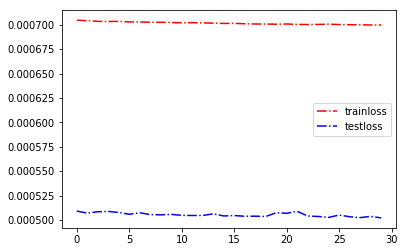

In [17]:
plt.plot(losslist,'r-.',label='trainloss') 
plt.plot(evallosslist,'b-.',label='testloss') 
plt.legend(loc='best')#显示在最好的位置
plt.show()

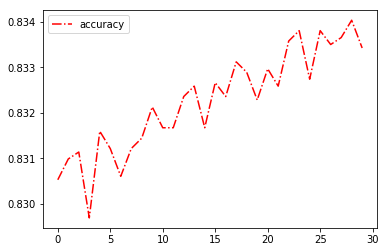

In [18]:
plt.plot(accuracylist,'r-.',label='accuracy') 
plt.legend(loc='best')#显示在最好的位置
plt.show()

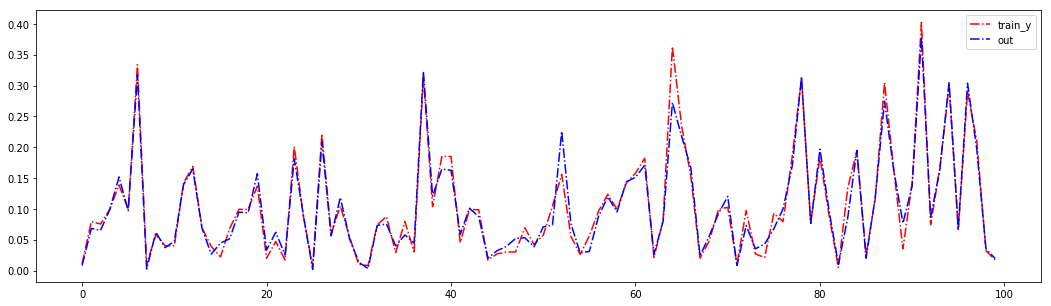

In [19]:
x=range(0,100)
plt.figure(num=1,figsize=(18,5))#定义编号为1 大小为(8,5)
plt.plot(x,train_y.numpy(),'r-.',label='train_y') 
plt.plot(x,out.detach().numpy(),'b-.',label='out') 
plt.legend(loc='best')#显示在最好的位置
plt.show()

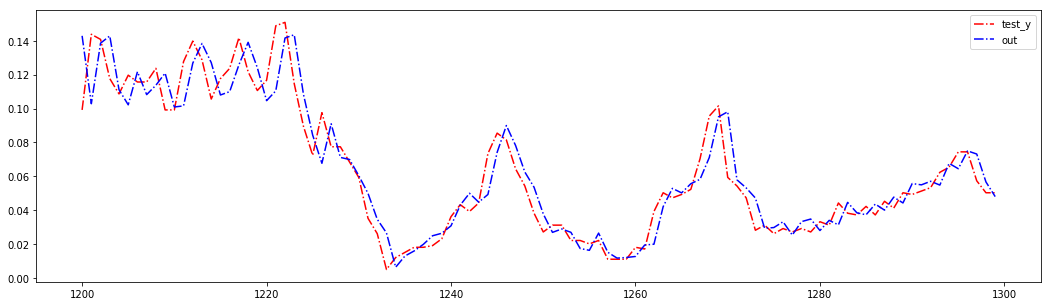

In [20]:
#x=range(0,13123)
x=range(1200,1300)
plt.figure(num=1,figsize=(18,5))#定义编号为1 大小为(8,5)
plt.plot(x,test_y.numpy()[1200:1300],'r-.',label='test_y') 
plt.plot(x,evalout.detach().numpy()[1200:1300],'b-.',label='out') 
plt.legend(loc='best')#显示在最好的位置
plt.show()

In [15]:
# 保存模型
torch.save(model.state_dict(), './weathercnn-0.01-true-7.18.pth')